In [24]:
from single_agent import SingleAgent, gray2pytorch, FloatTensor
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import pickle

%matplotlib inline
#plt.rcParams['figure.figsize'] = (80.0, 64.0) # set default size of plots -> big for high resolution
plt.rcParams['figure.figsize'] = (20.0, 10.0) # set default size of plots -> big for high resolution
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [4]:
agent_breakout = SingleAgent('Breakout', pretrained_model='modelParams/Breakout_final.model')
agent_spaceinvaders = SingleAgent('SpaceInvaders', pretrained_model='modelParams/SpaceInvaders_final.model')

Loading model... modelParams/Breakout_final.model
Loading model... modelParams/Breakout_final.model
Loading model... modelParams/SpaceInvaders_final.model
Loading model... modelParams/SpaceInvaders_final.model


In [ ]:
# Run game and kill kernel when screen should be plot
agent_breakout.play()

In [64]:
# Run game and kill kernel when screen should be plot
agent_spaceinvaders.play()

KeyboardInterrupt: 

# Plot filter breakout

In [45]:
# Get conv filter from screen
conv1_breakout = next(agent_breakout.net.conv1.parameters()).data.cpu().numpy()

# Get current screen from agent
screen = agent_breakout.env.get_observation()

# Get state from member (not builtin => codein for plot generation)
state = agent_breakout.state
state_var = Variable(state, volatile=True)

output = agent_breakout.net.conv1(state_var).data.numpy().squeeze()

Filter: 0


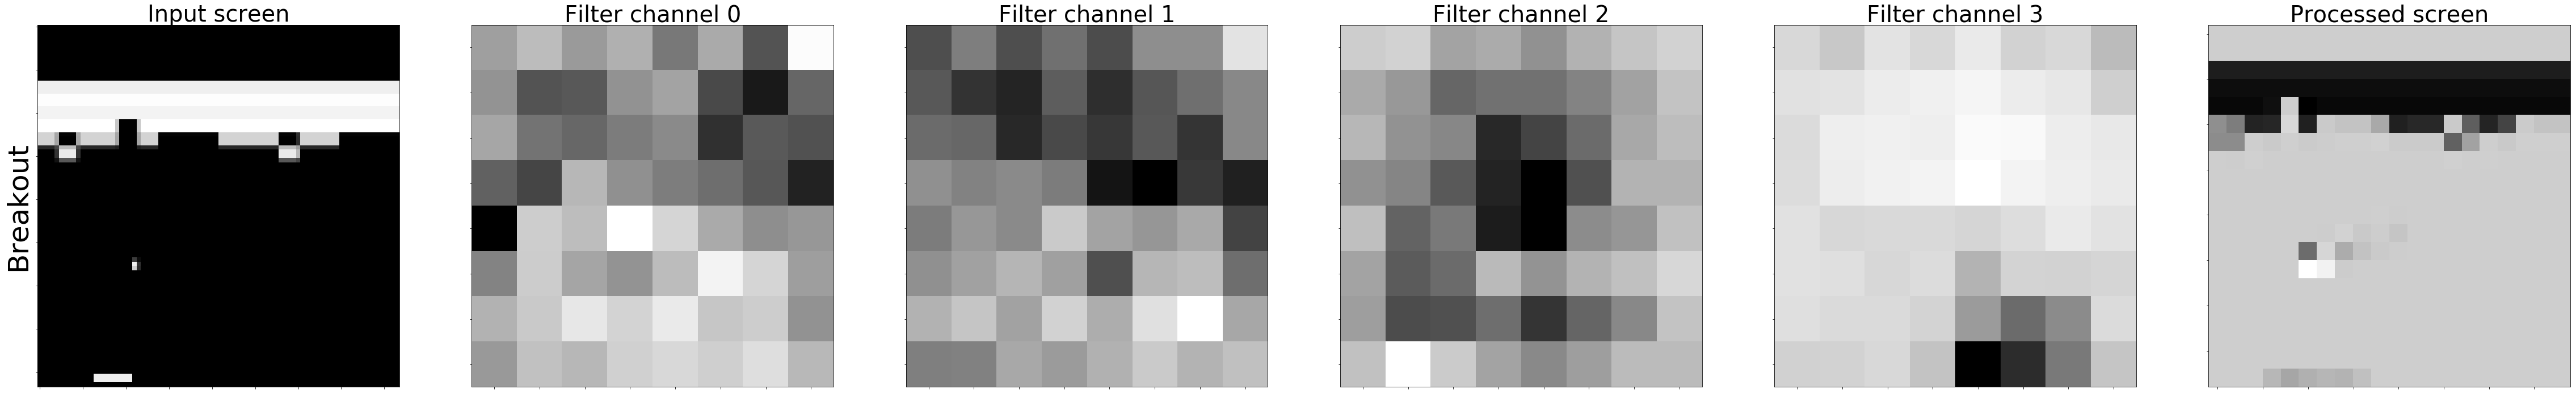

Filter: 1


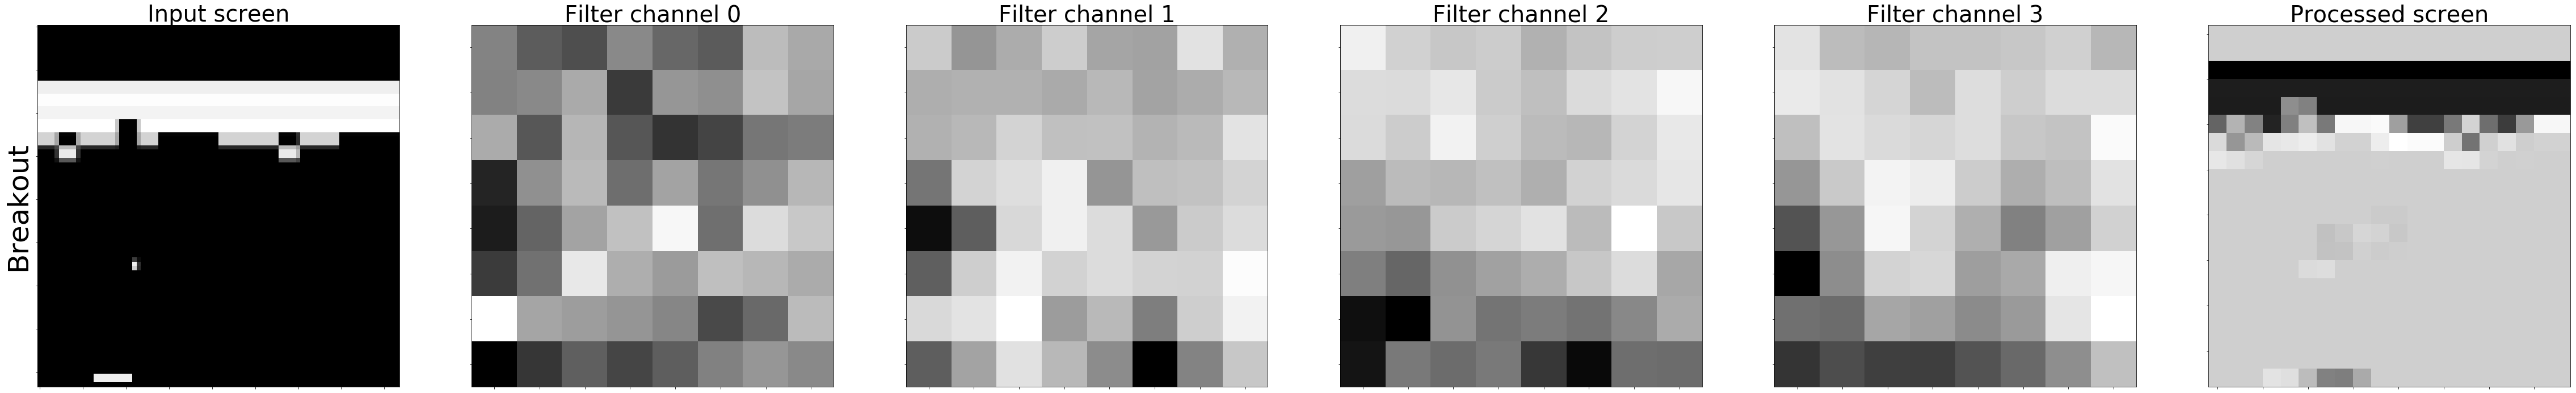

Filter: 2


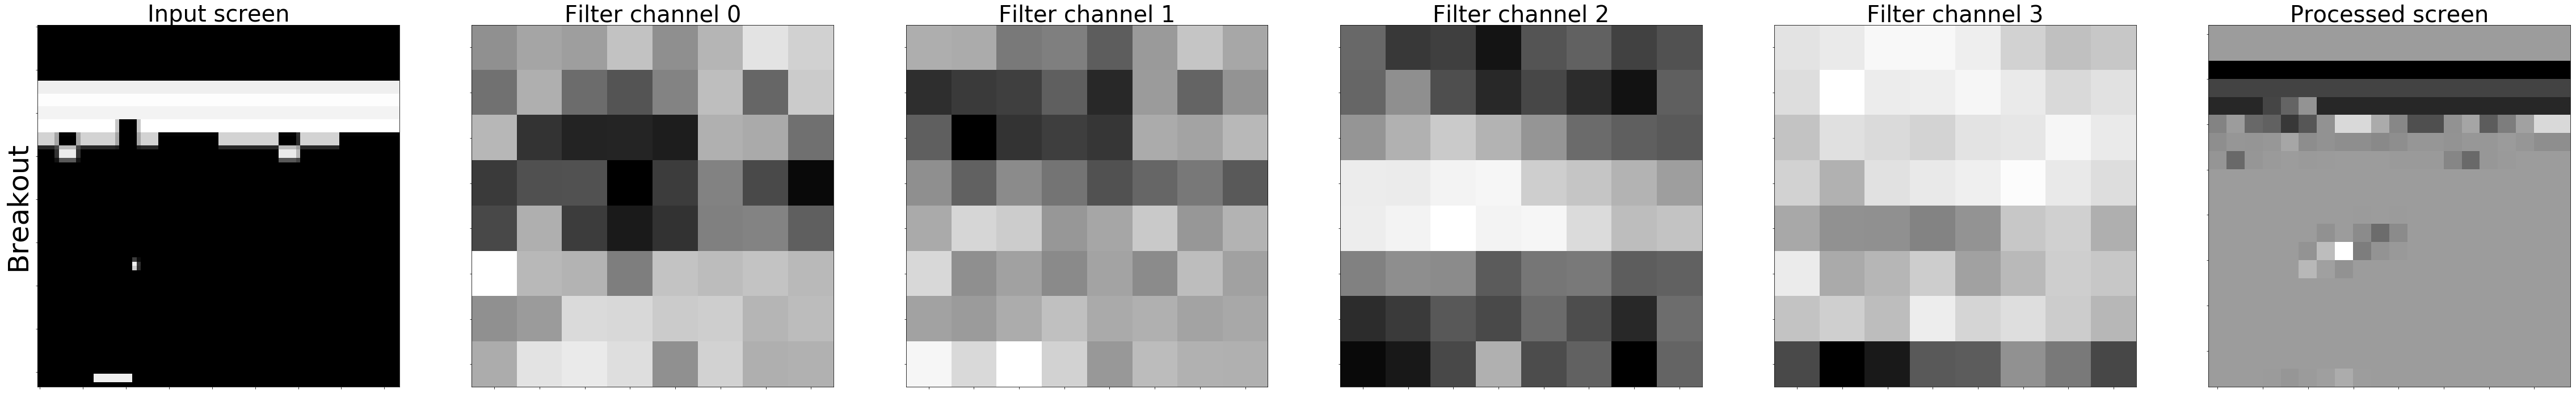

Filter: 3


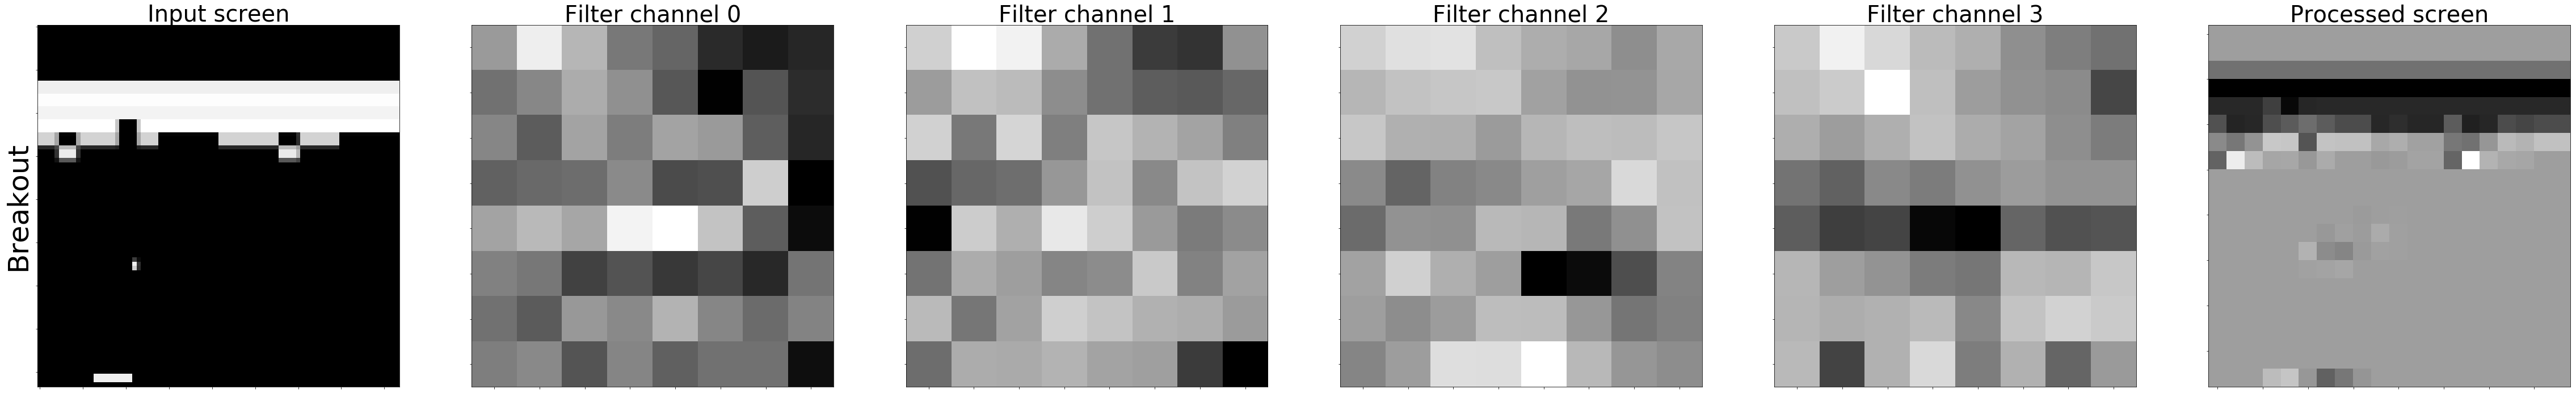

Filter: 4


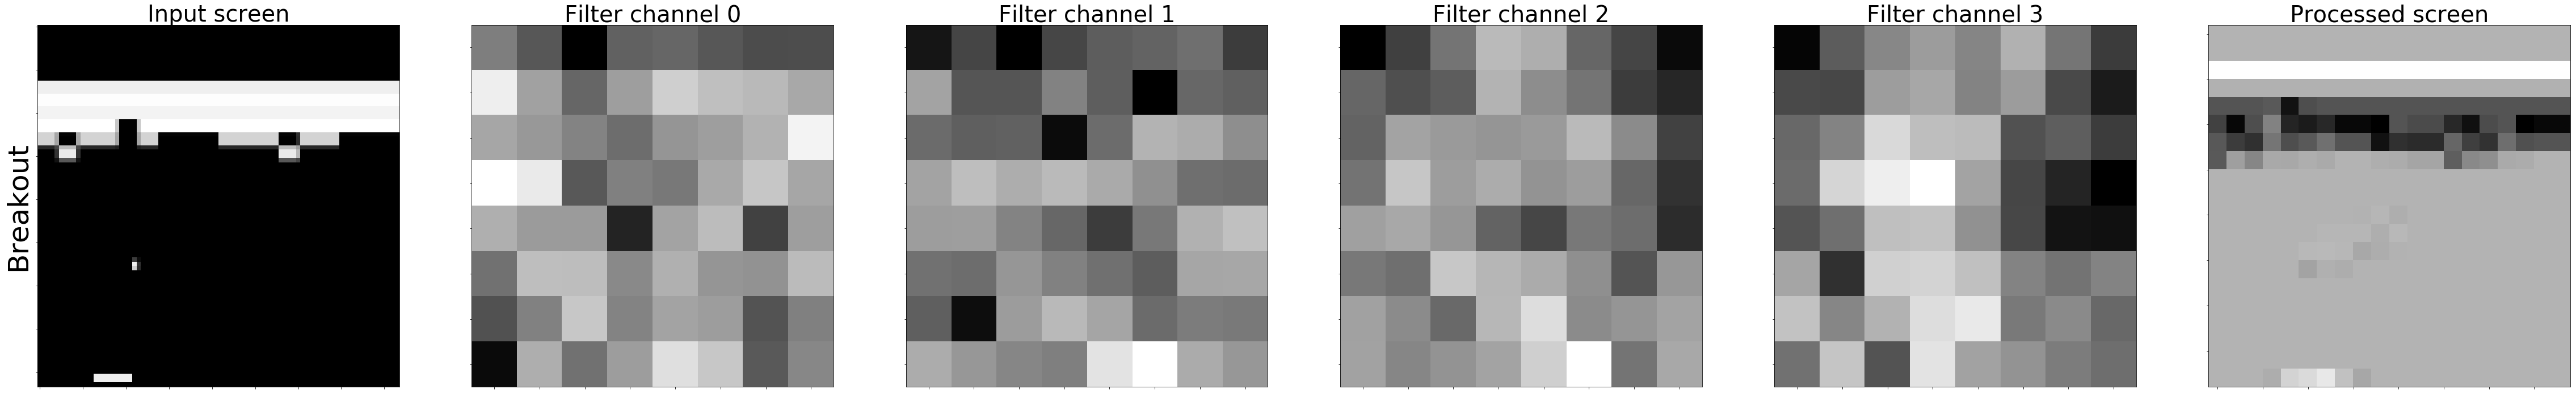

Filter: 5


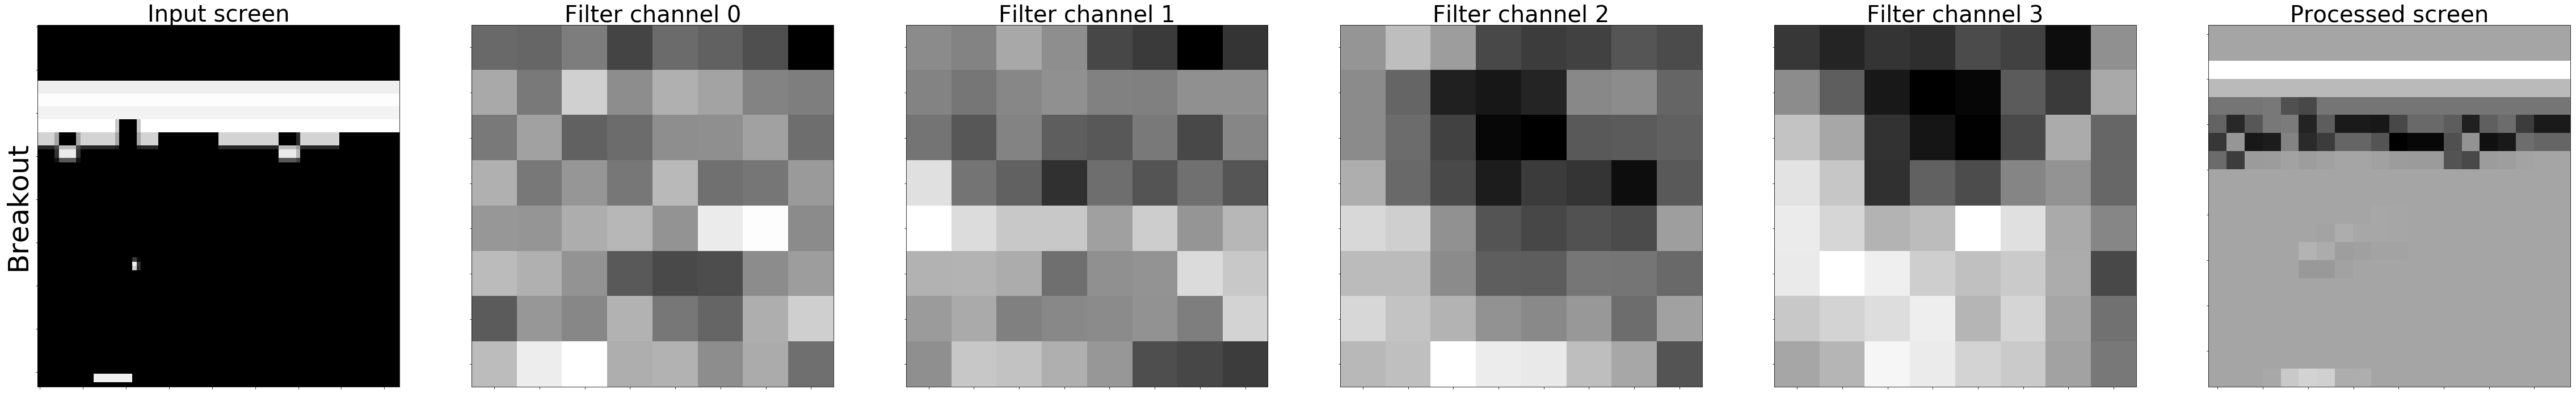

Filter: 6


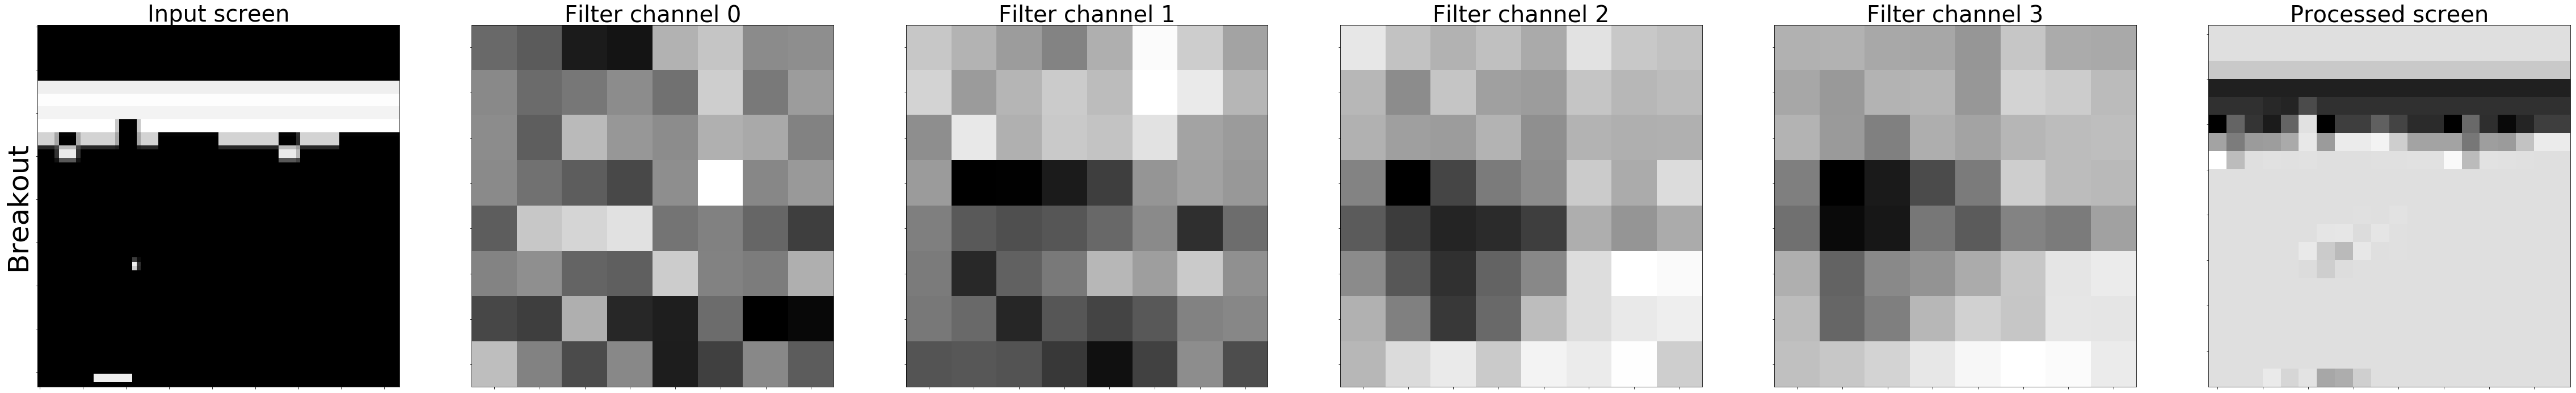

Filter: 7


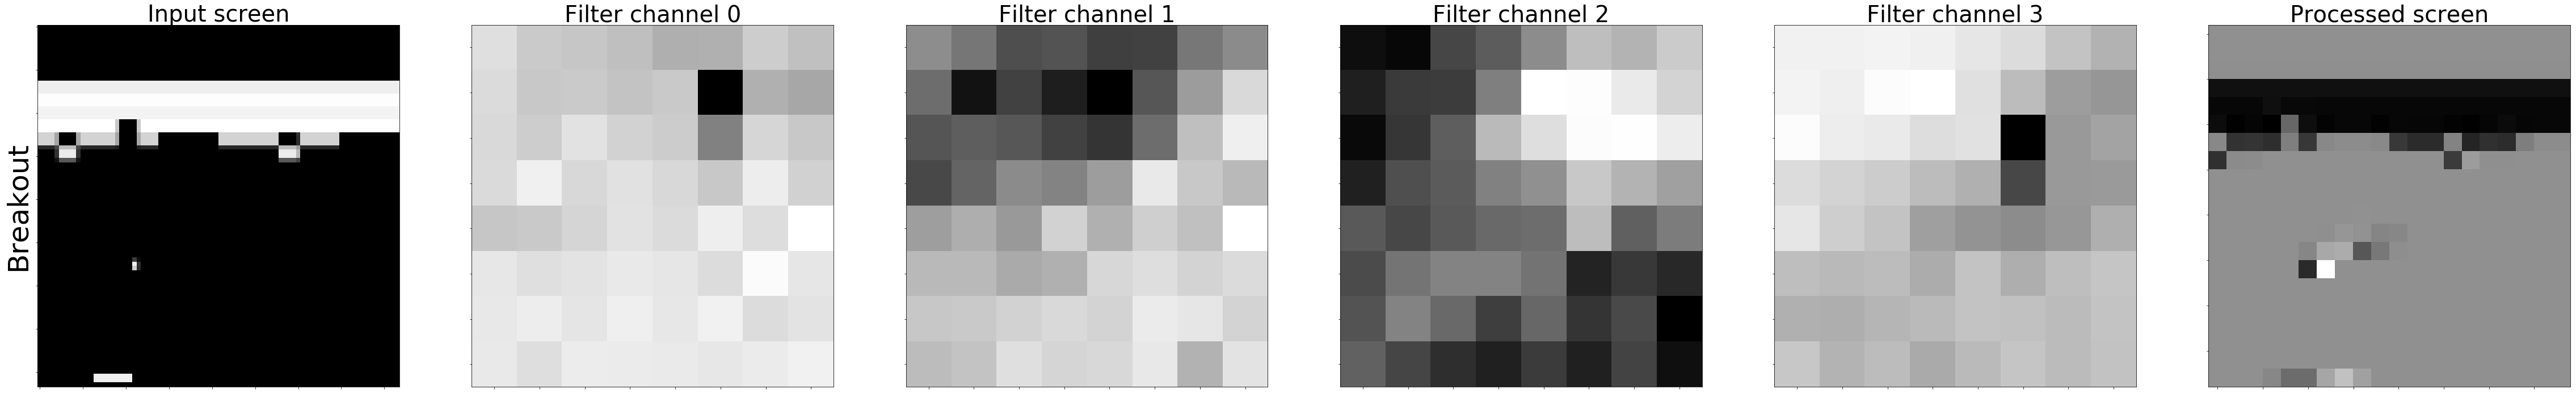

Filter: 8


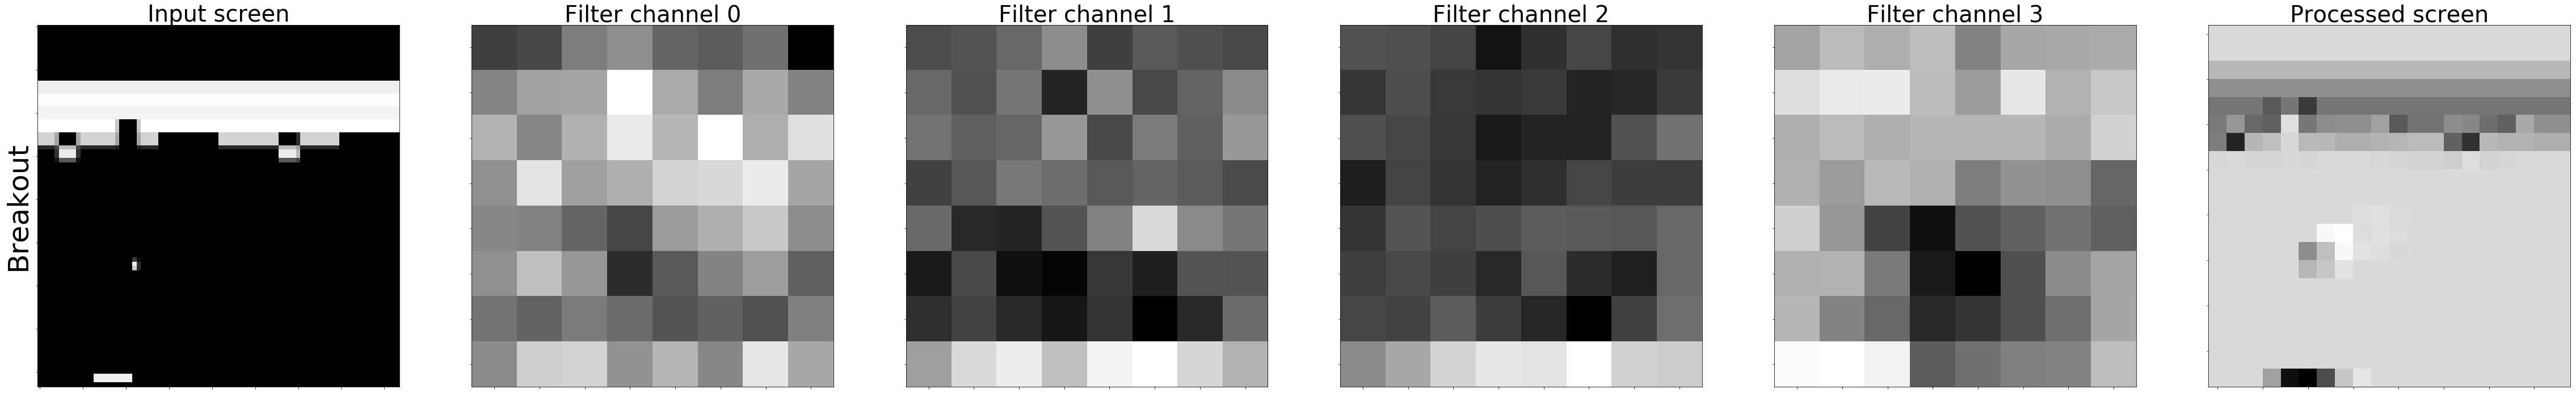

Filter: 9


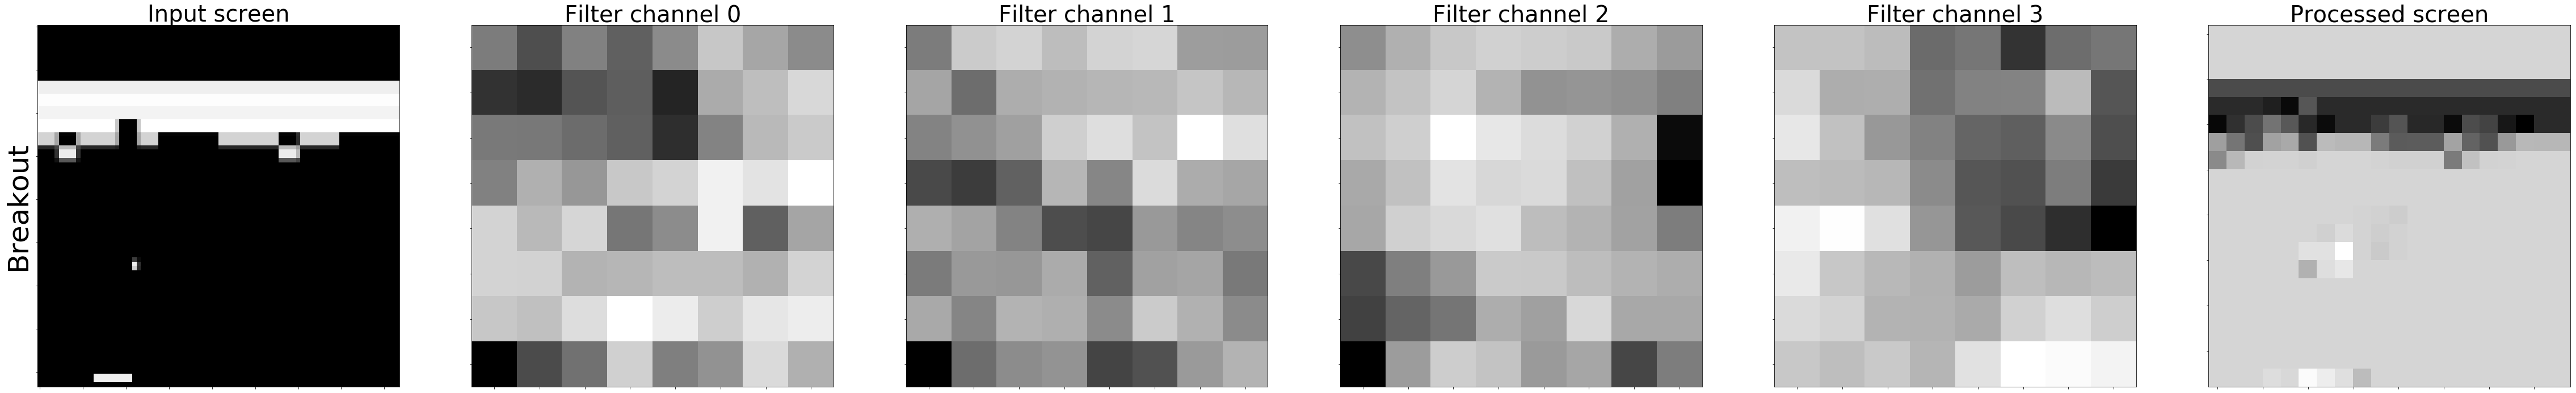

Filter: 10


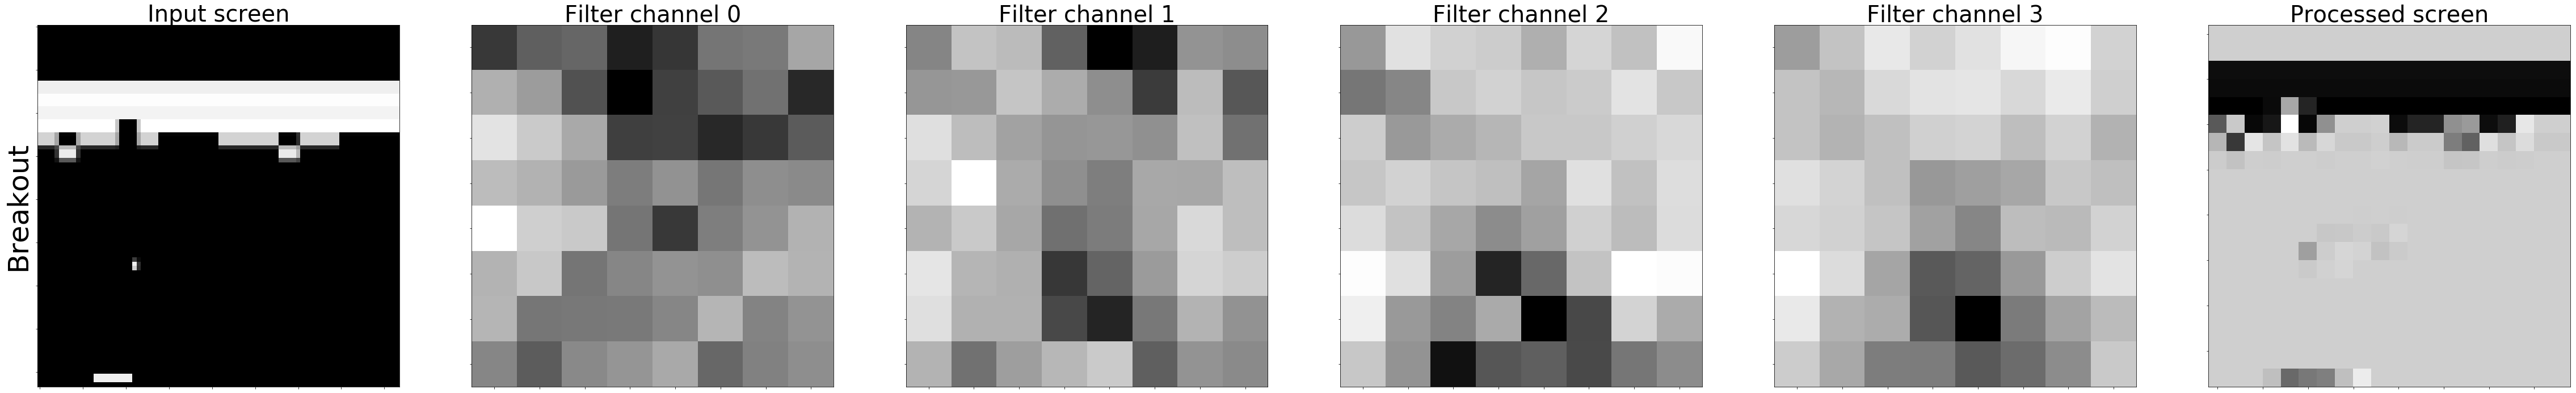

Filter: 11


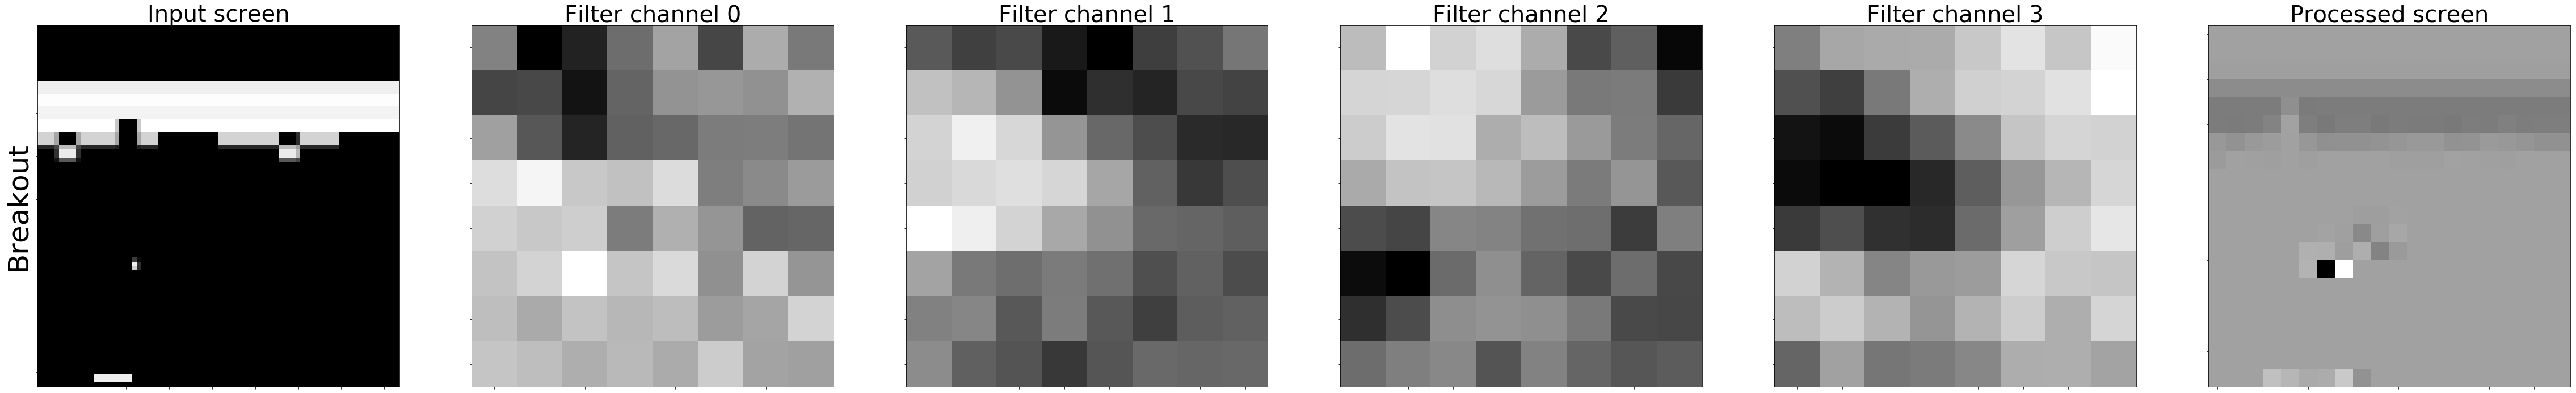

Filter: 12


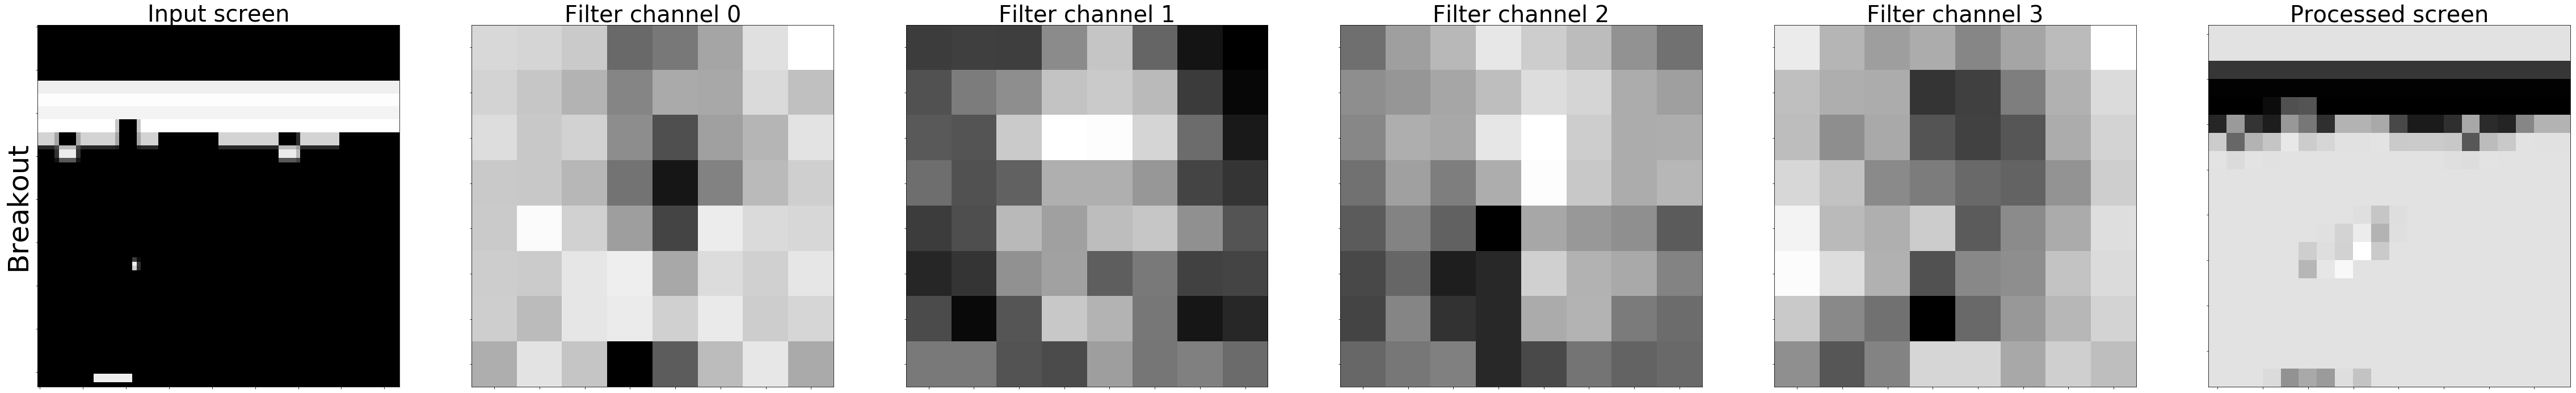

Filter: 13


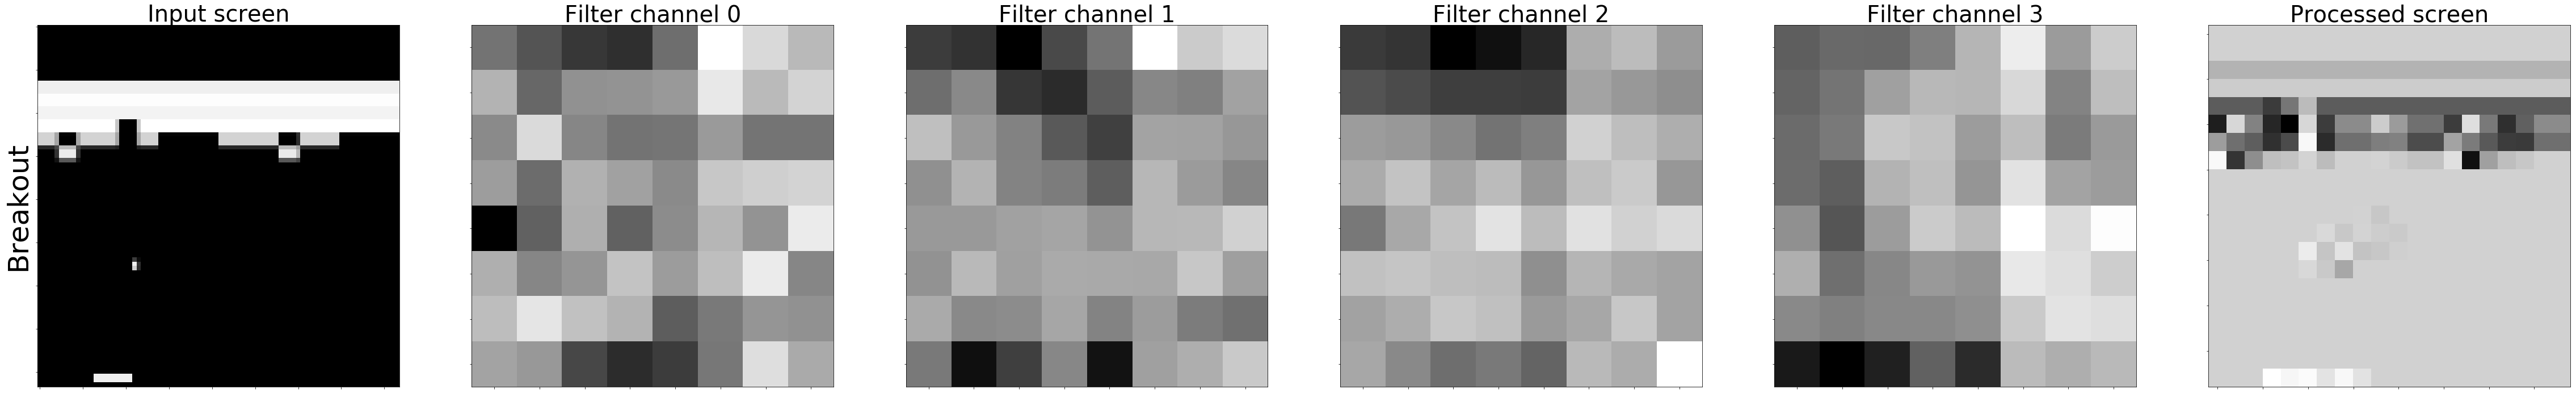

Filter: 14


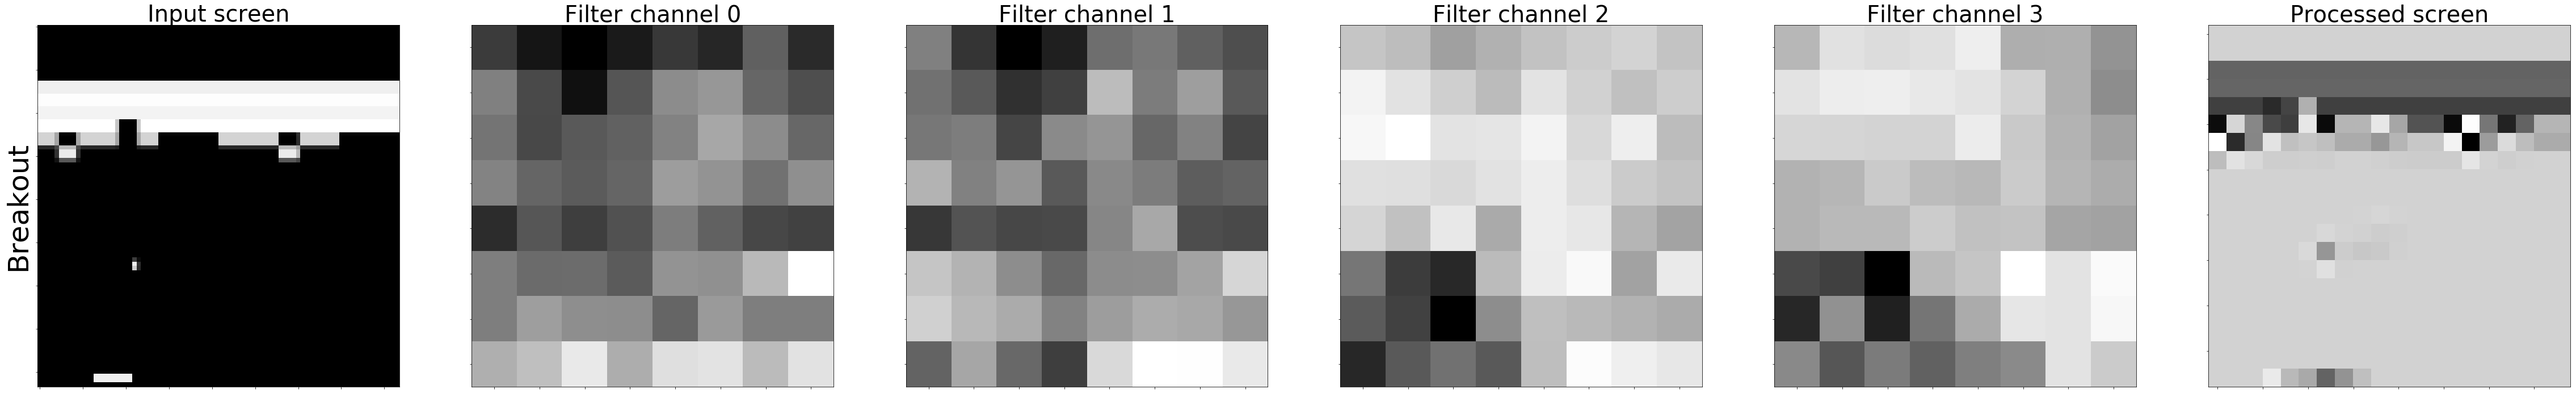

Filter: 15


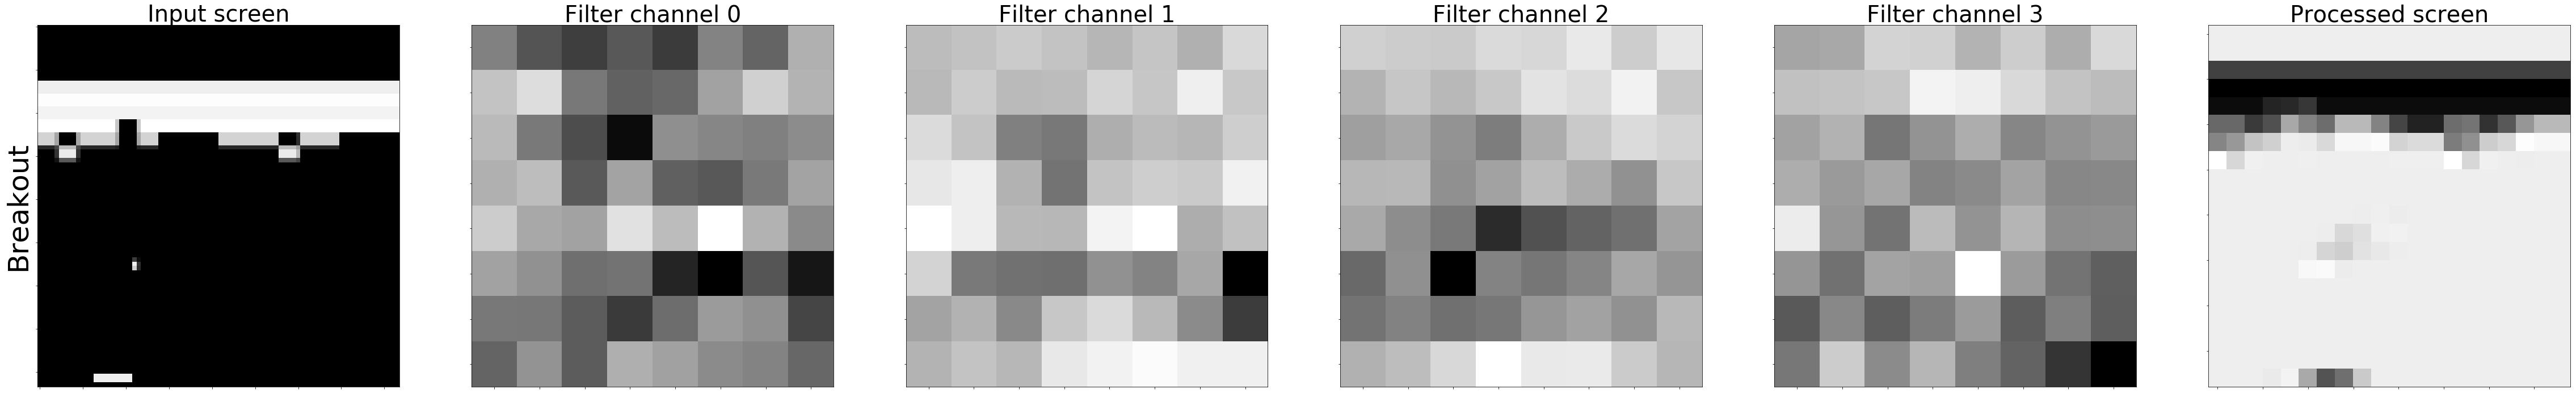

Filter: 16


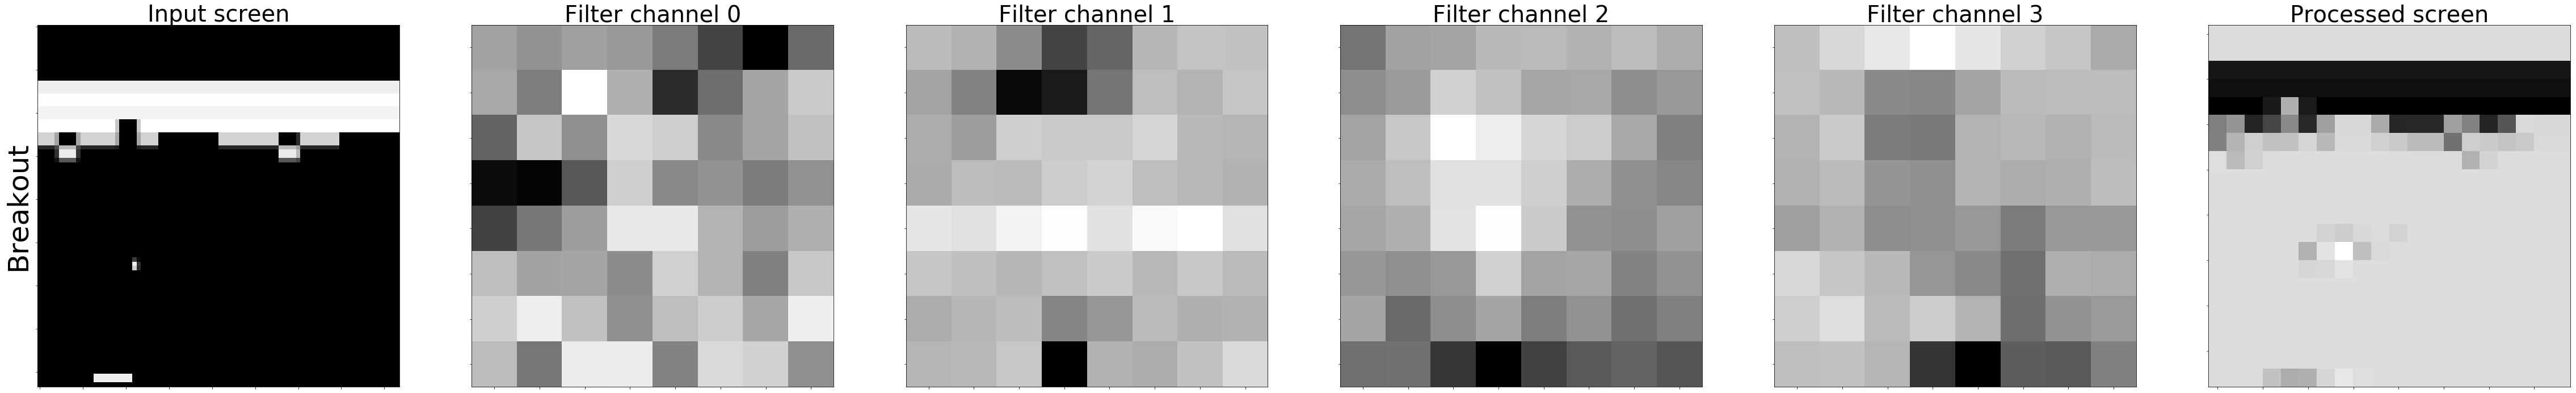

Filter: 17


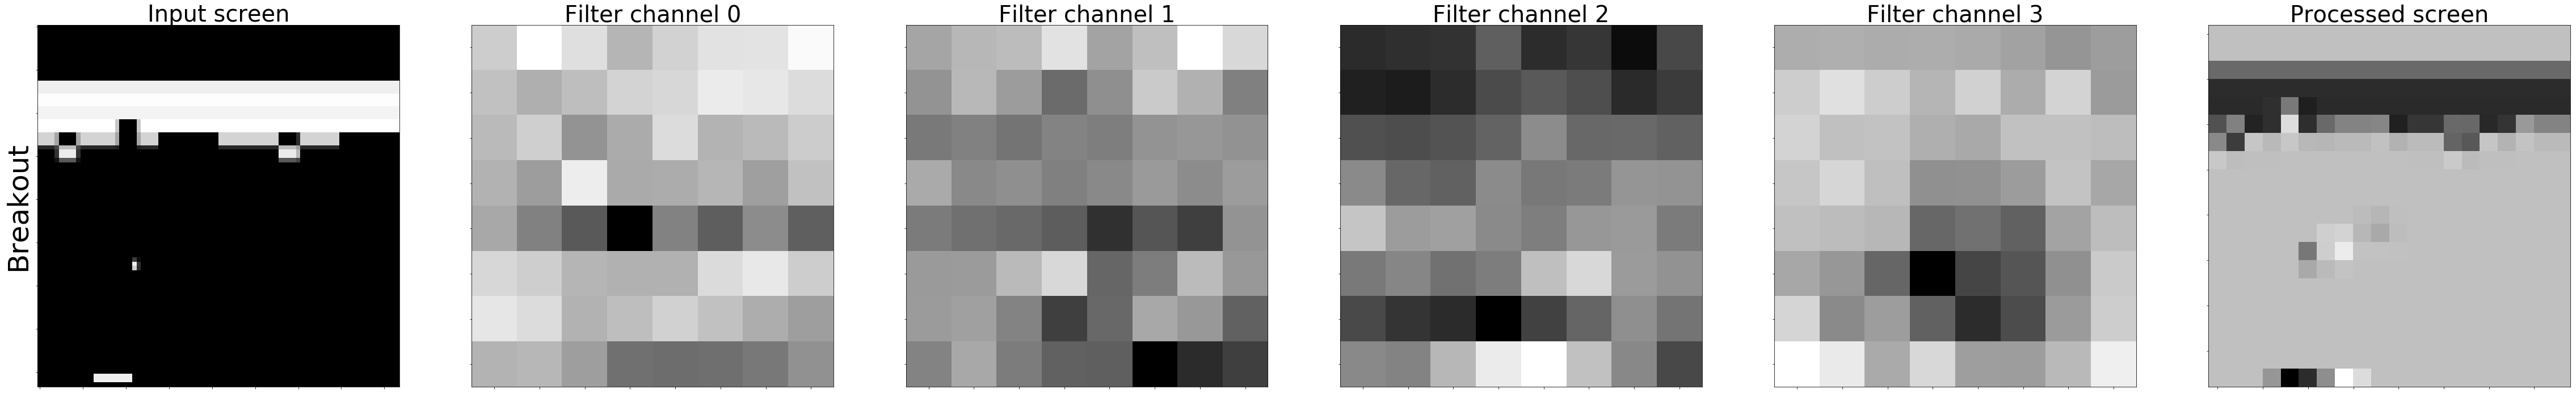

Filter: 18


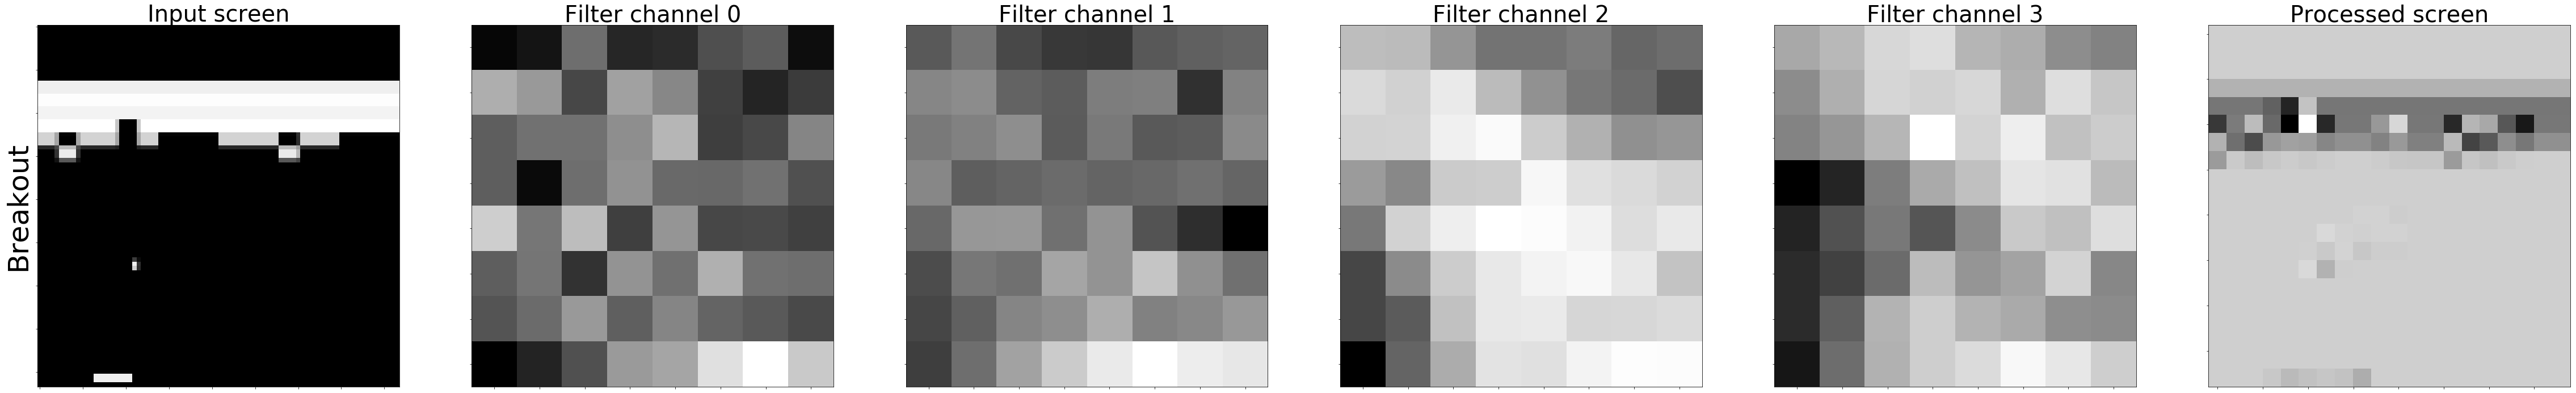

Filter: 19


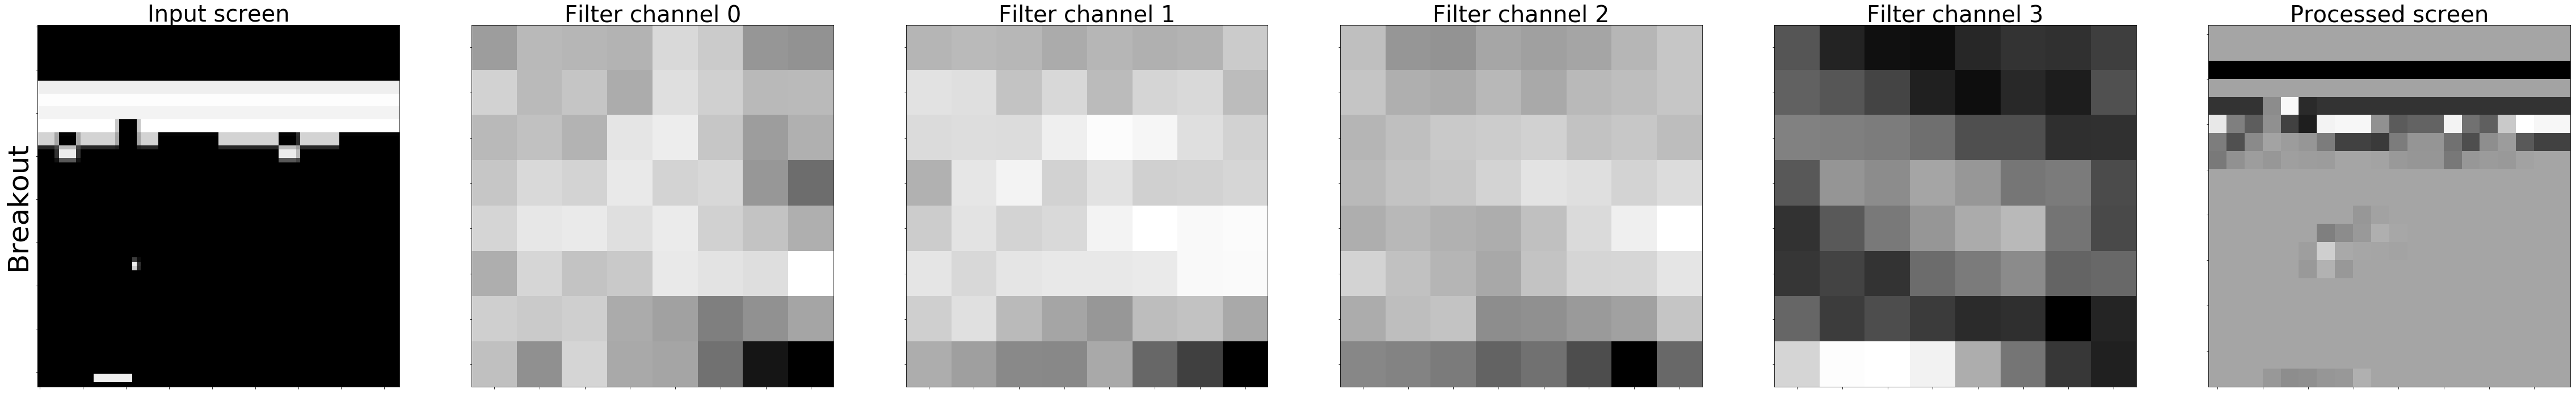

Filter: 20


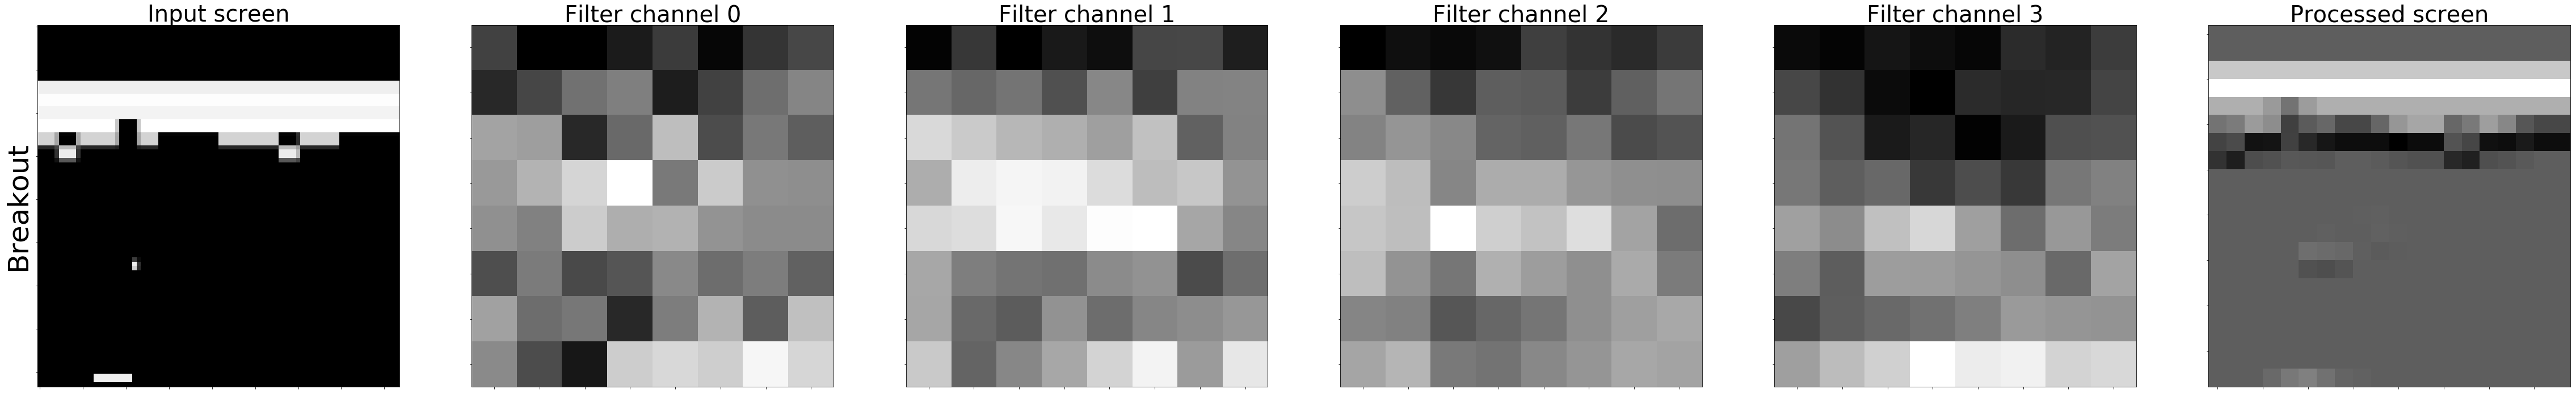

Filter: 21


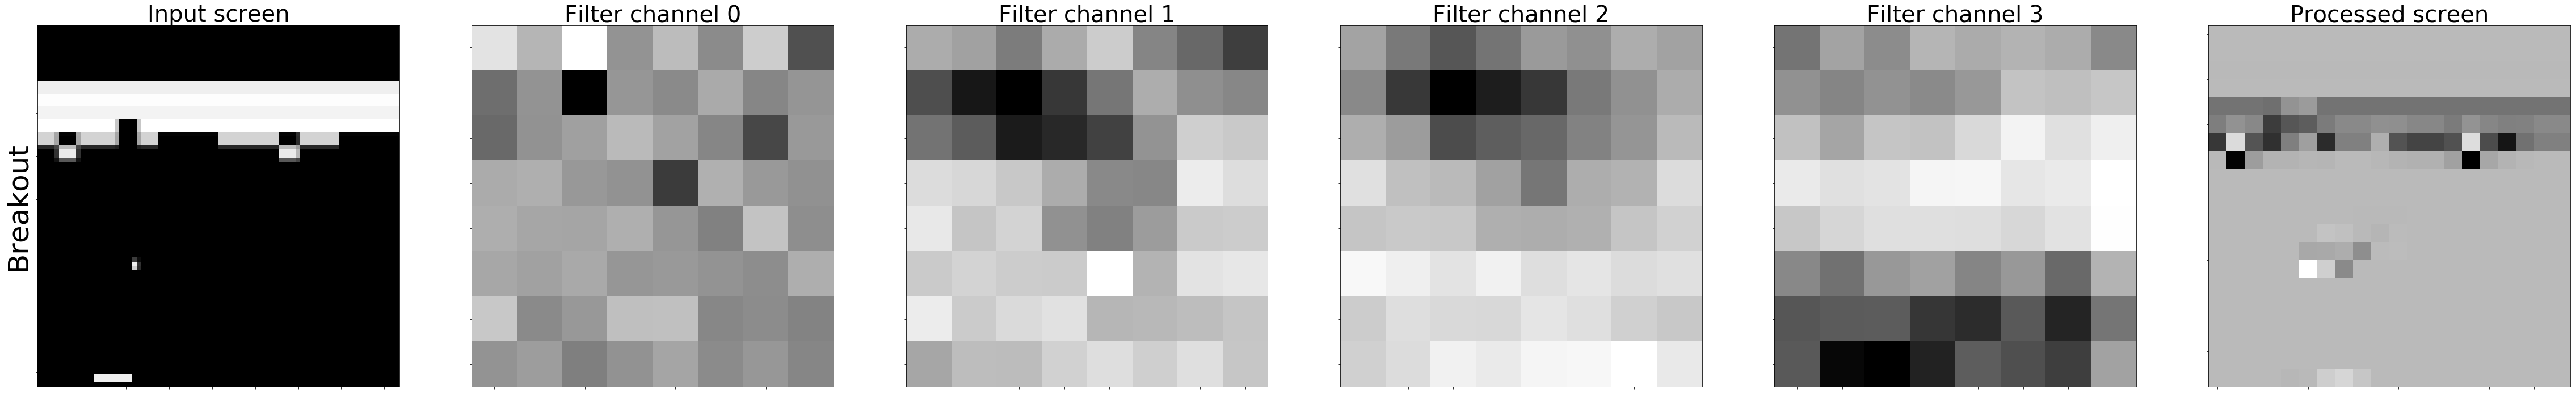

Filter: 22


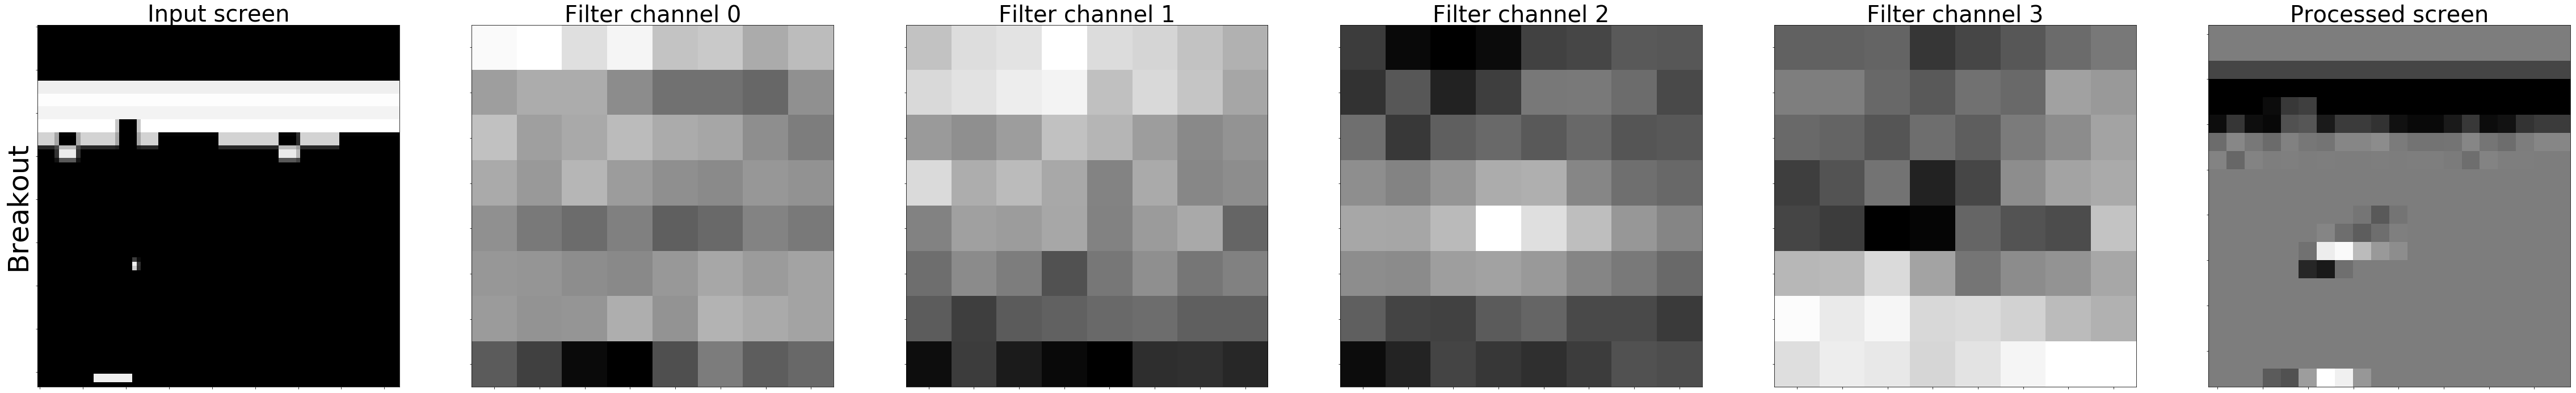

Filter: 23


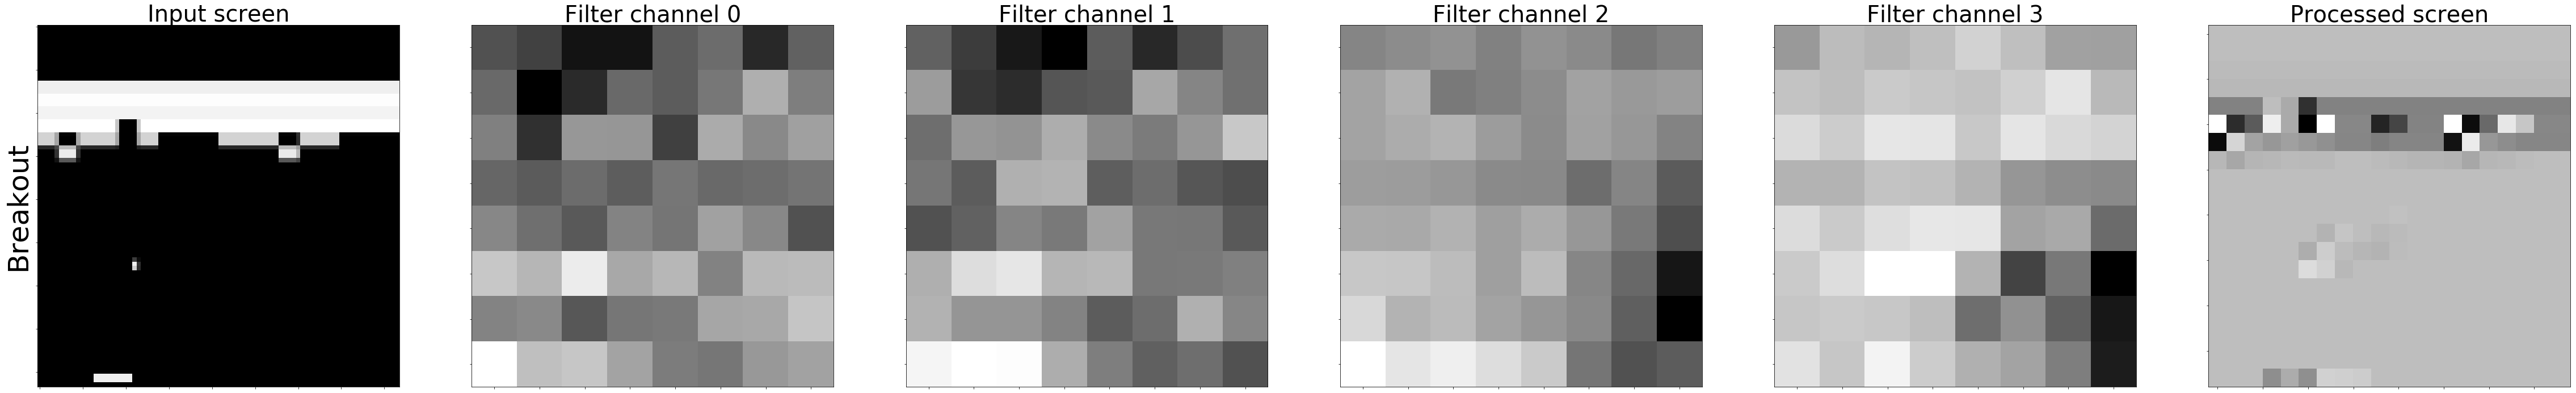

Filter: 24


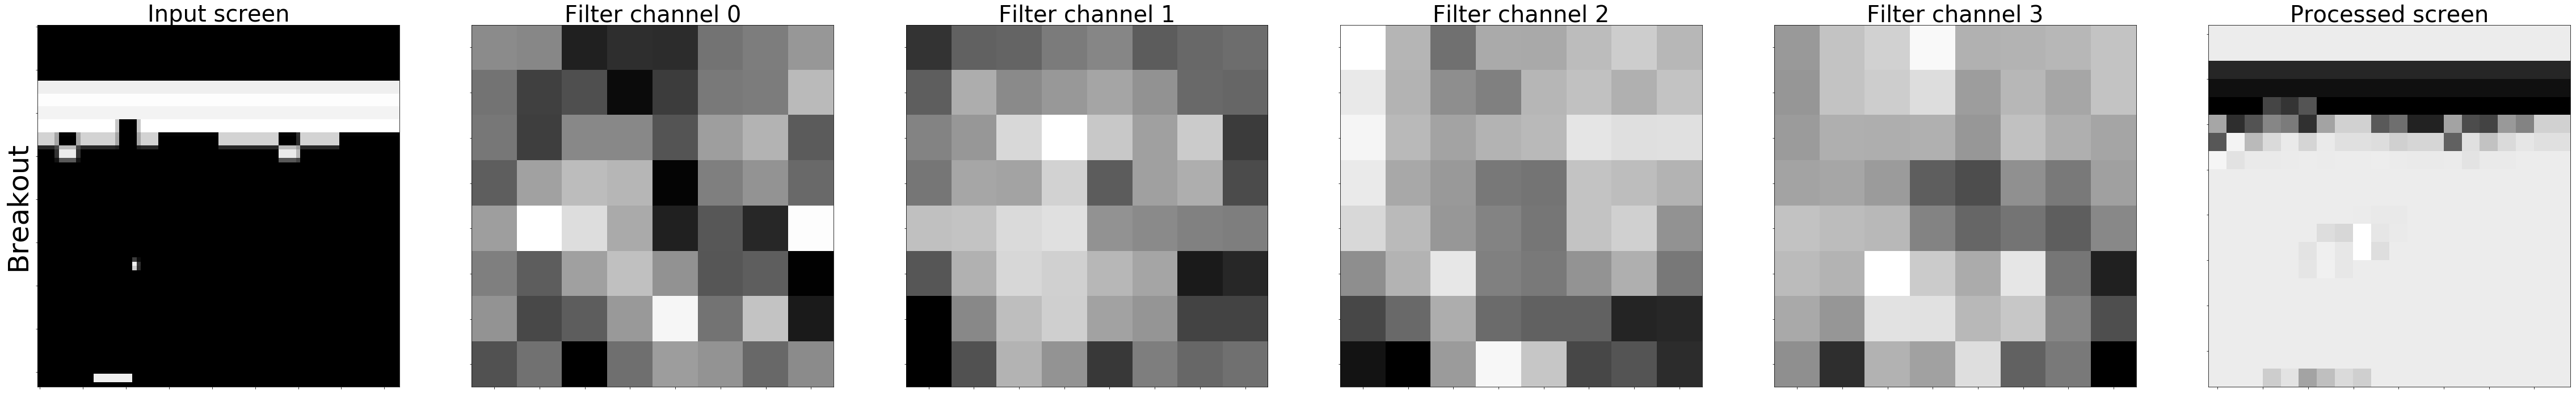

Filter: 25


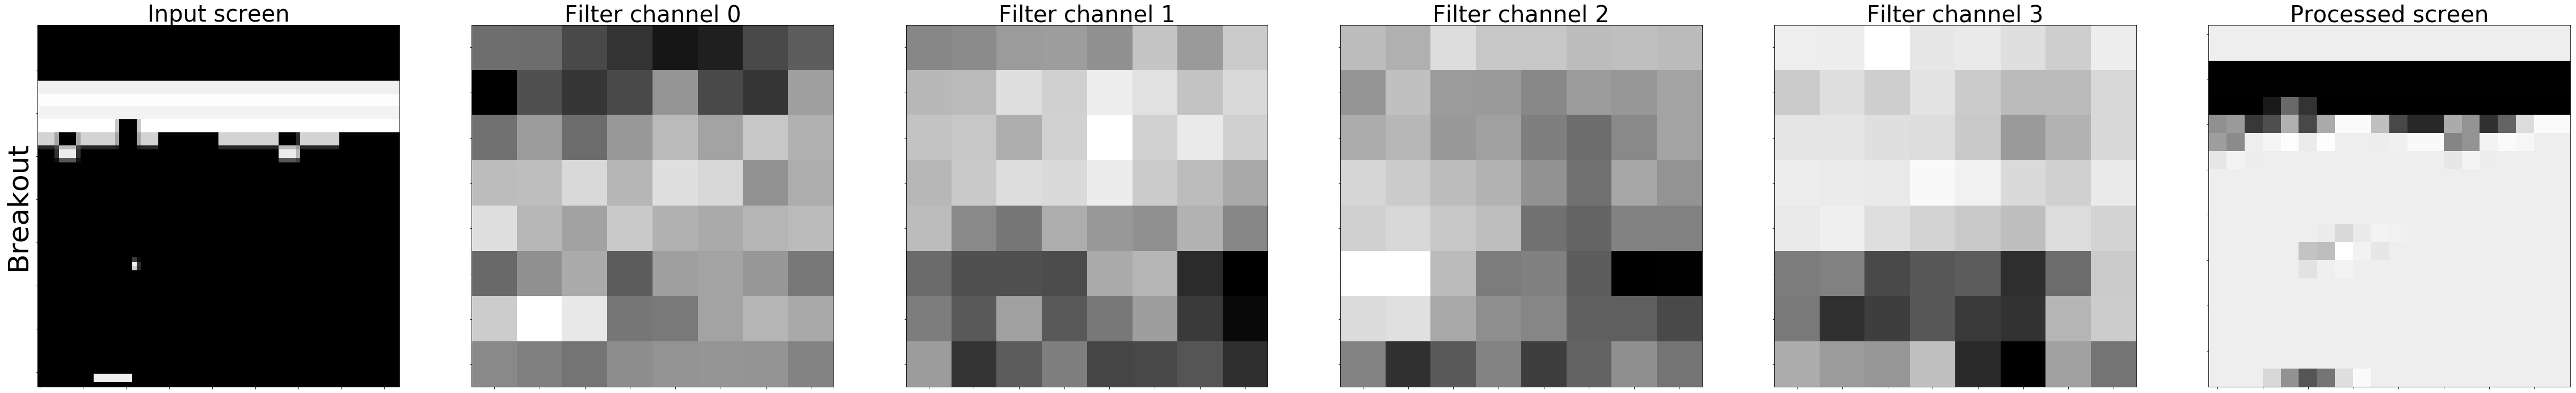

Filter: 26


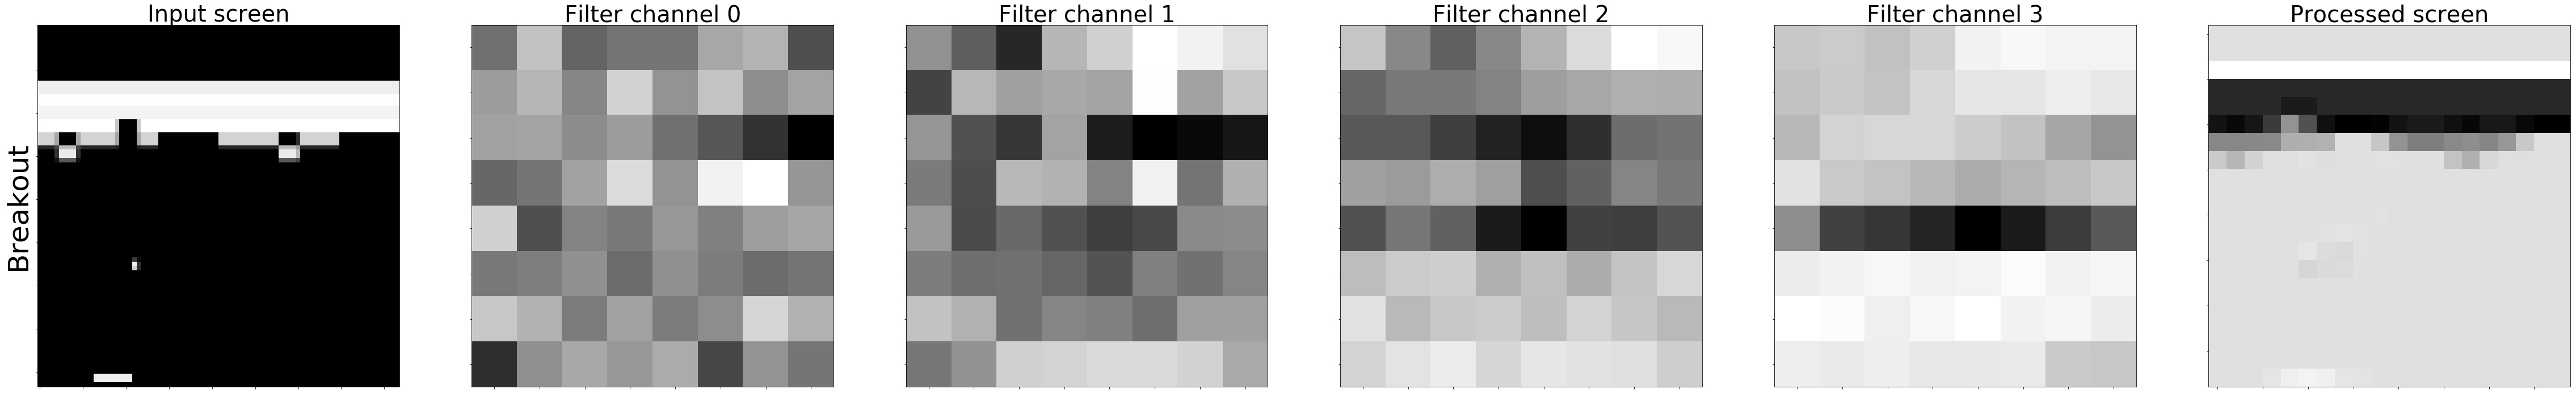

Filter: 27


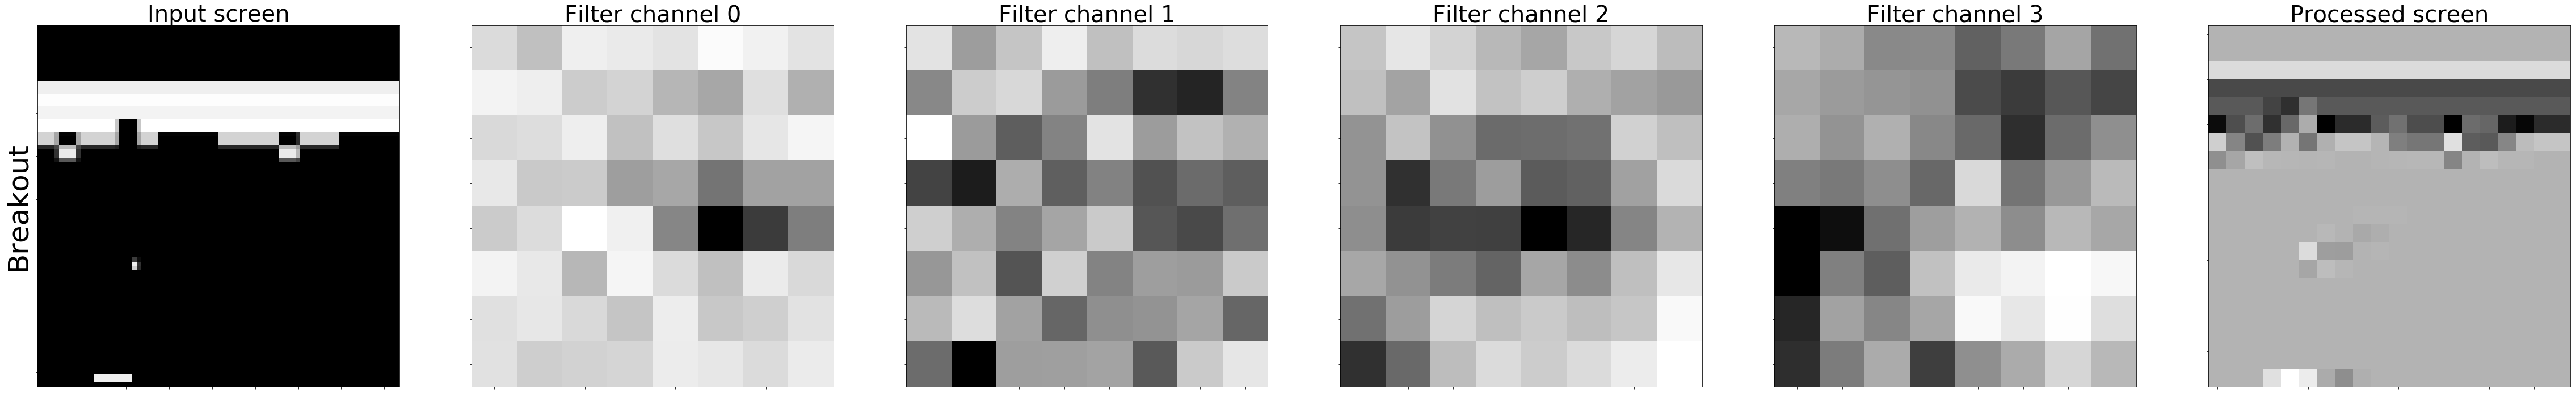

Filter: 28


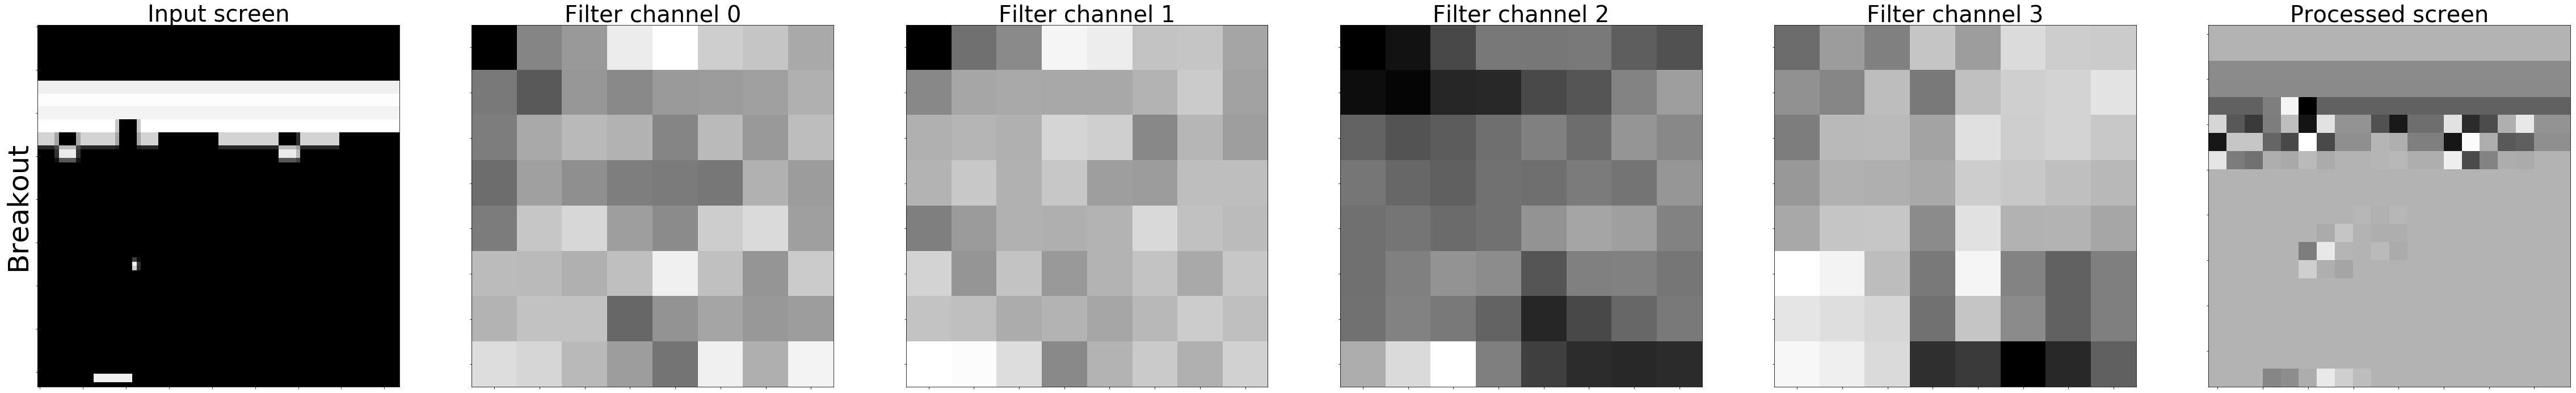

Filter: 29


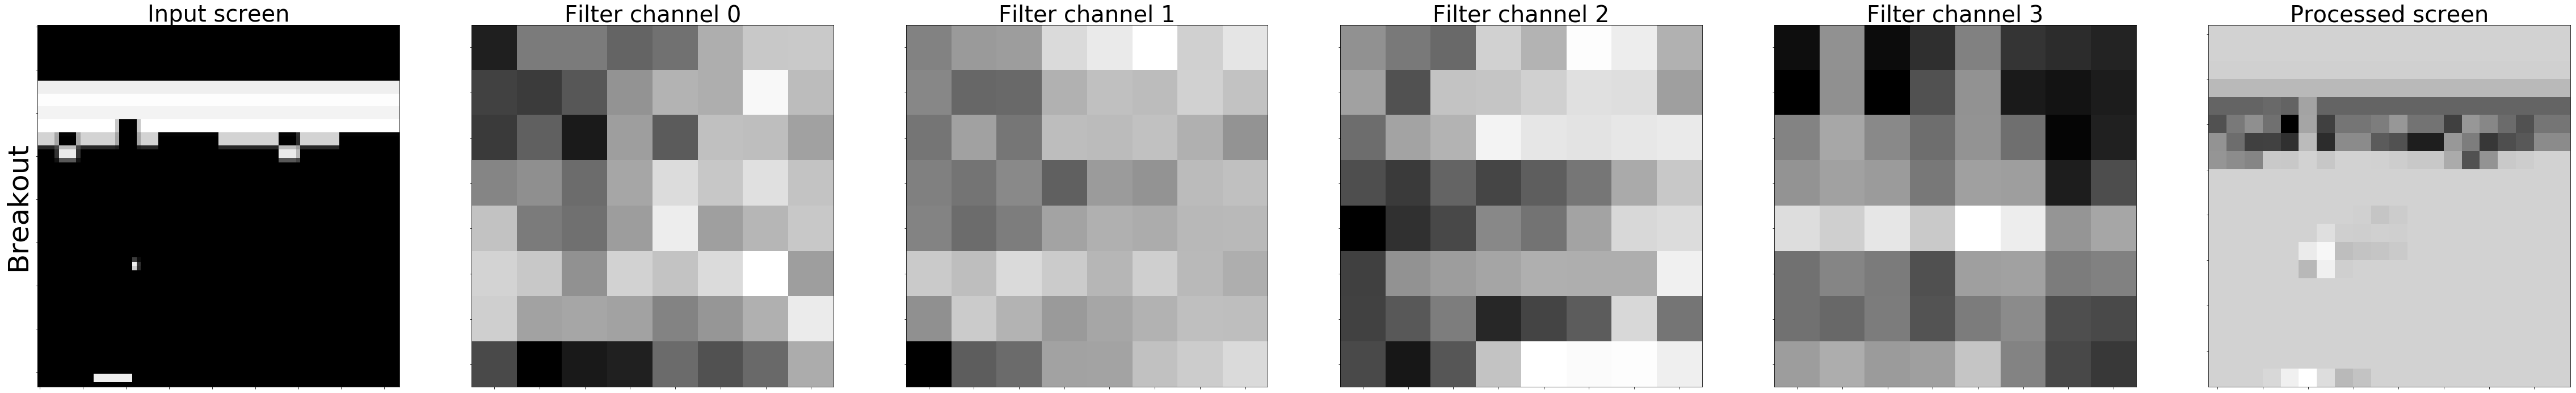

Filter: 30


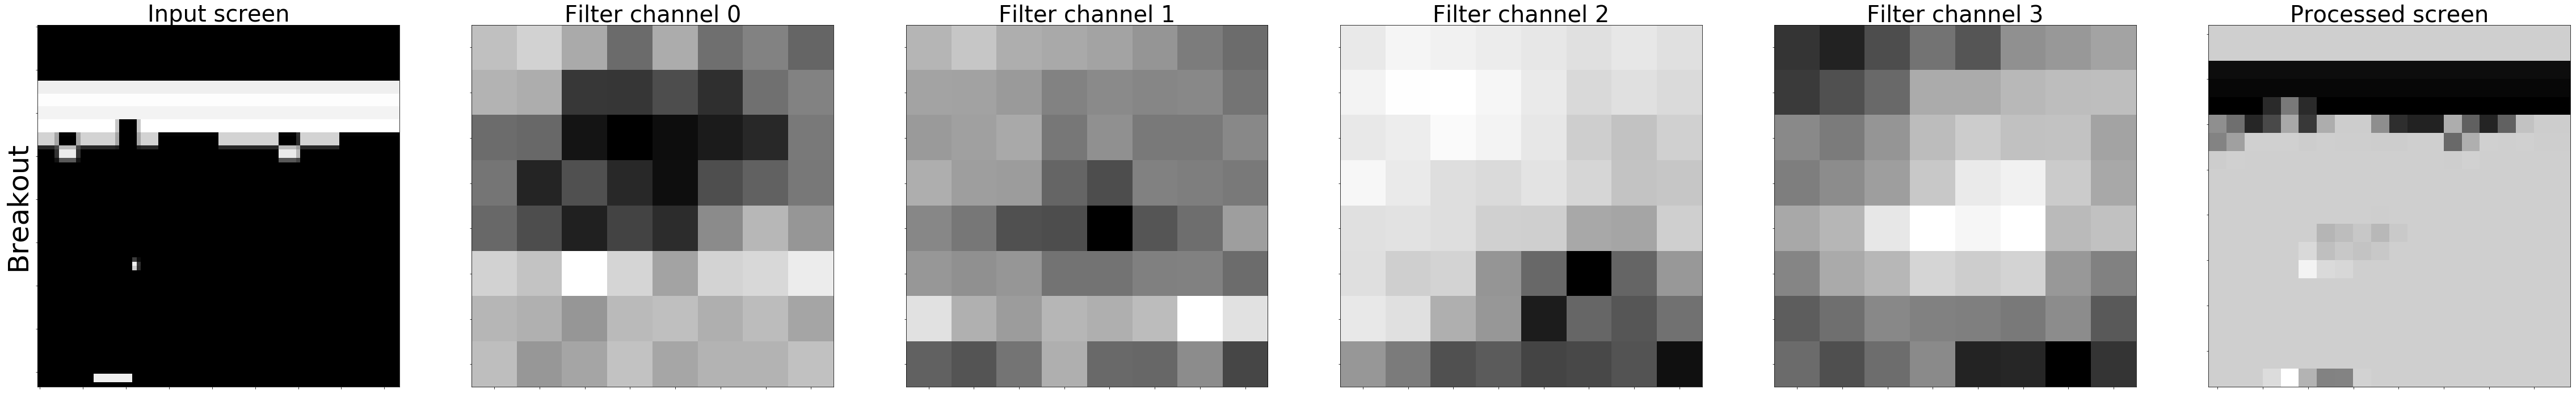

Filter: 31


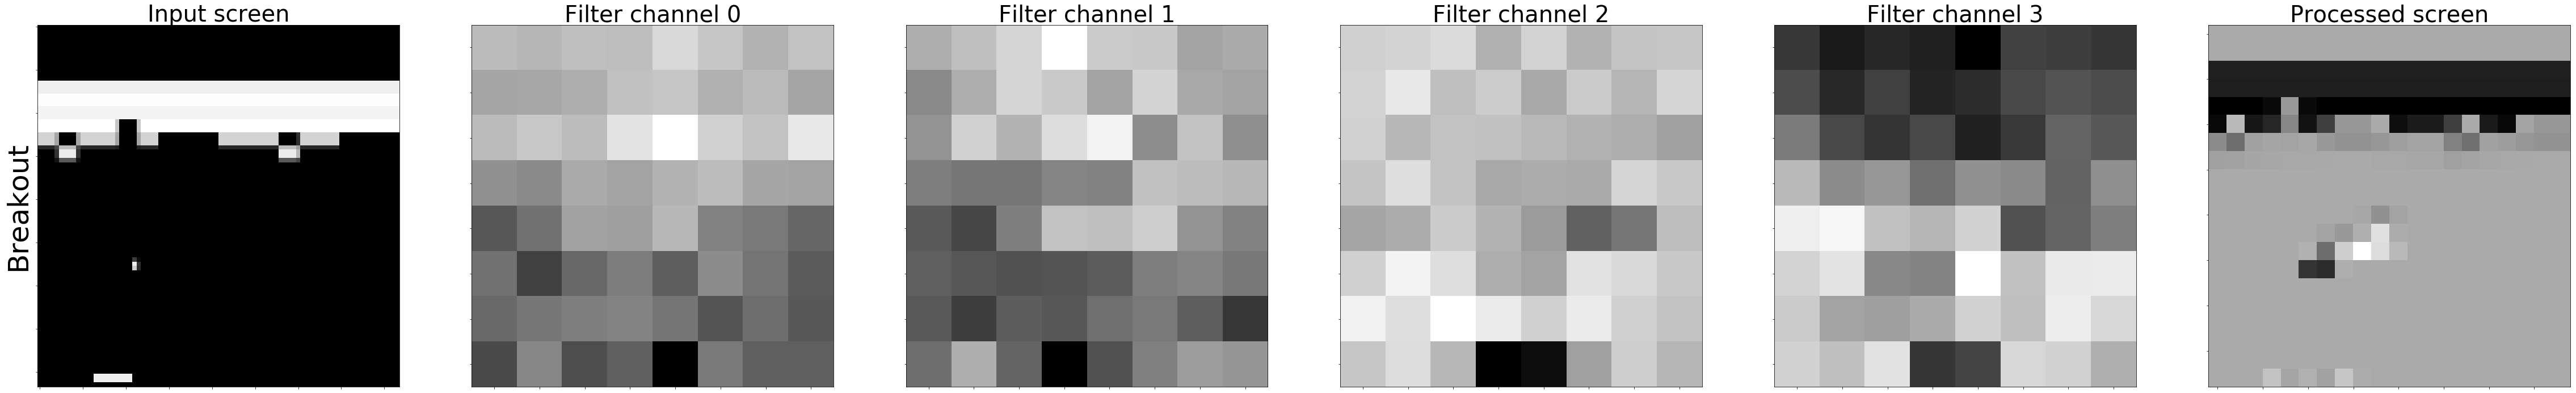

In [46]:
for filter_nr in range(32):
    print('Filter:', filter_nr)
    f, axarr = plt.subplots(1, 6)
    axarr[0].imshow(screen)
    axarr[0].set_title('Input screen', fontsize=40)
    axarr[0].set_ylabel('Breakout', fontsize=50)
    axarr[0].set_yticklabels([])
    axarr[0].set_xticklabels([])

    for i in range(4):
        axarr[i+1].imshow(conv1_breakout[filter_nr,i])
        axarr[i+1].set_title('Filter channel '+ str(i), fontsize=40)
        axarr[i+1].set_yticklabels([])
        axarr[i+1].set_xticklabels([])
    axarr[5].imshow(output[filter_nr])
    axarr[5].set_title('Processed screen', fontsize=40)
    axarr[5].set_yticklabels([])
    axarr[5].set_xticklabels([])
    plt.show()

# Plot SpaceInvaders

In [65]:
# Get conv filter from screen
conv1_spaceinvaders = next(agent_spaceinvaders.net.conv1.parameters()).data.cpu().numpy()

# Get current screen from agent
screen = agent_spaceinvaders.env.get_observation()

# Get state from member (not builtin => codein for plot generation)
state = agent_spaceinvaders.state
state_var = Variable(state, volatile=True)

output = agent_spaceinvaders.net.conv1(state_var).data.numpy().squeeze()

Filter: 0


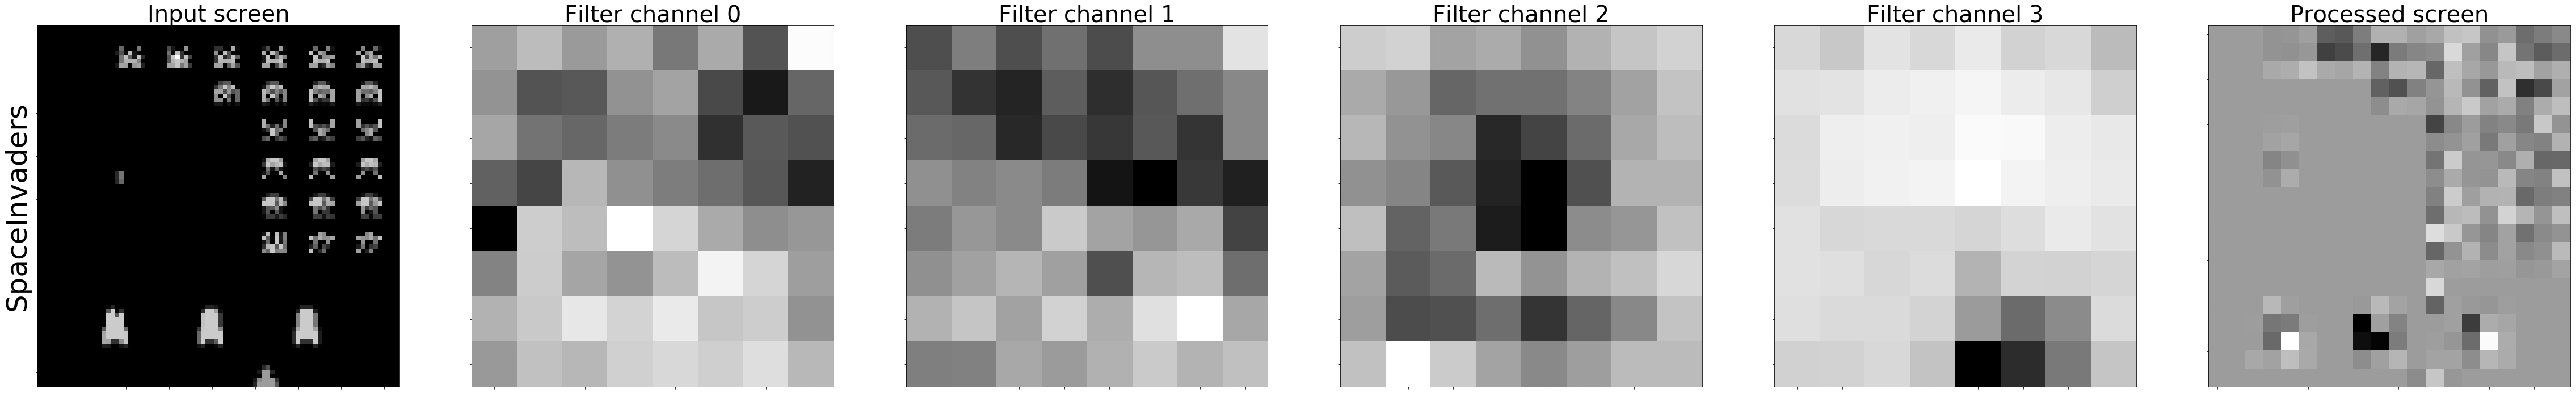

Filter: 1


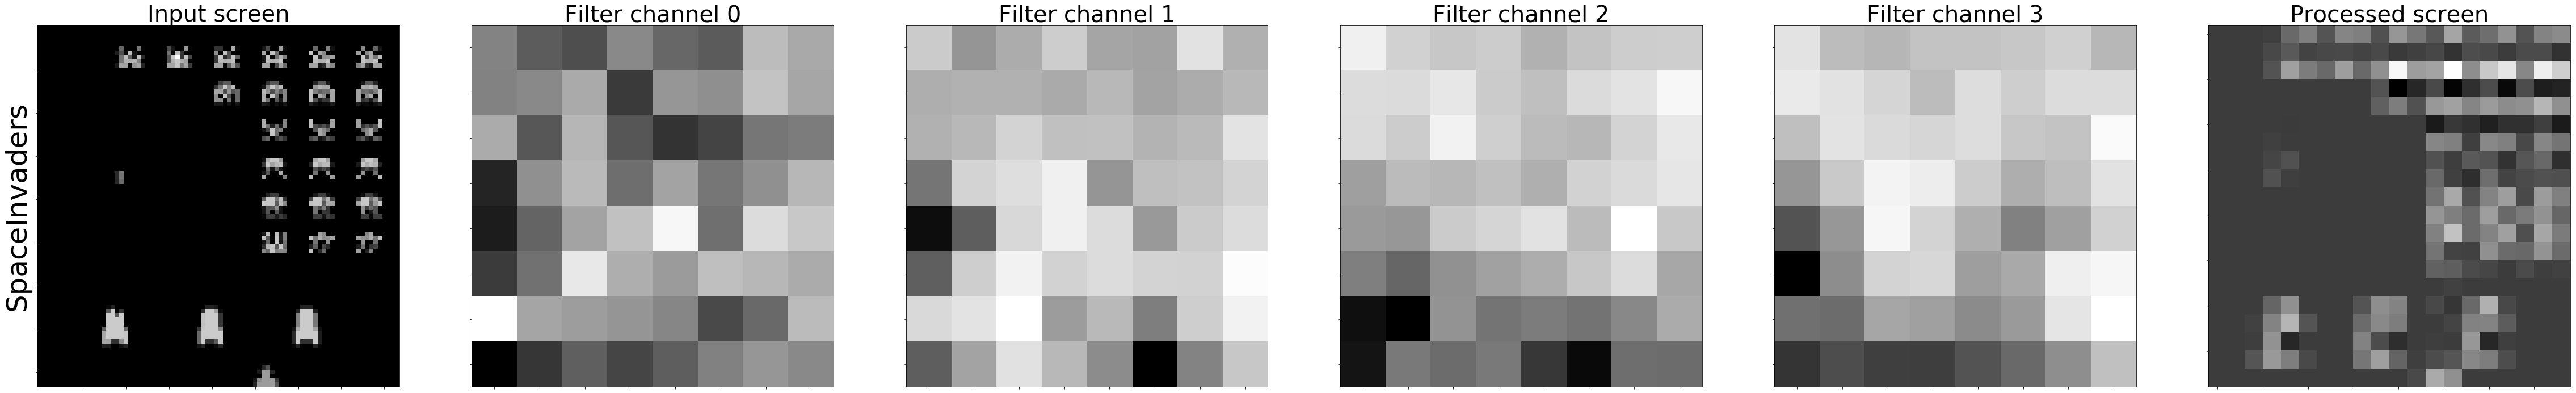

Filter: 2


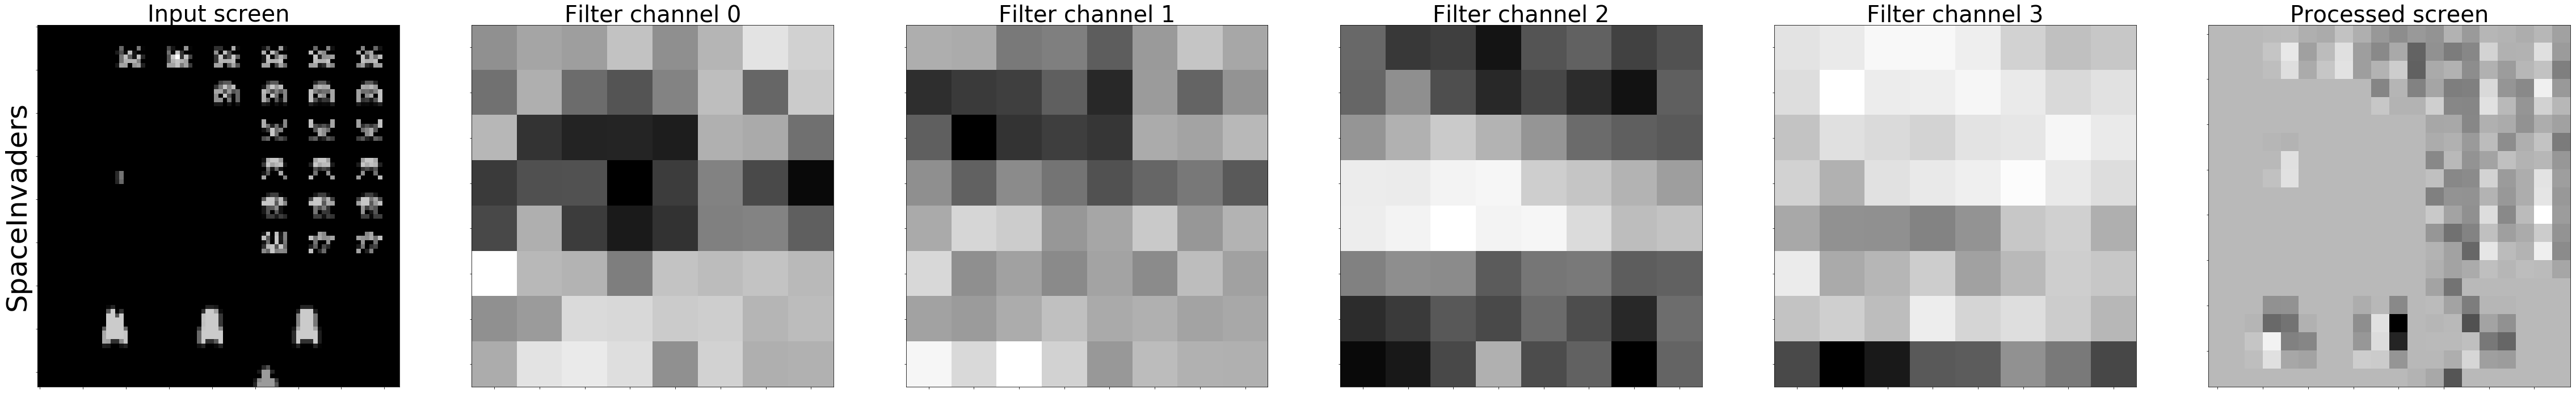

Filter: 3


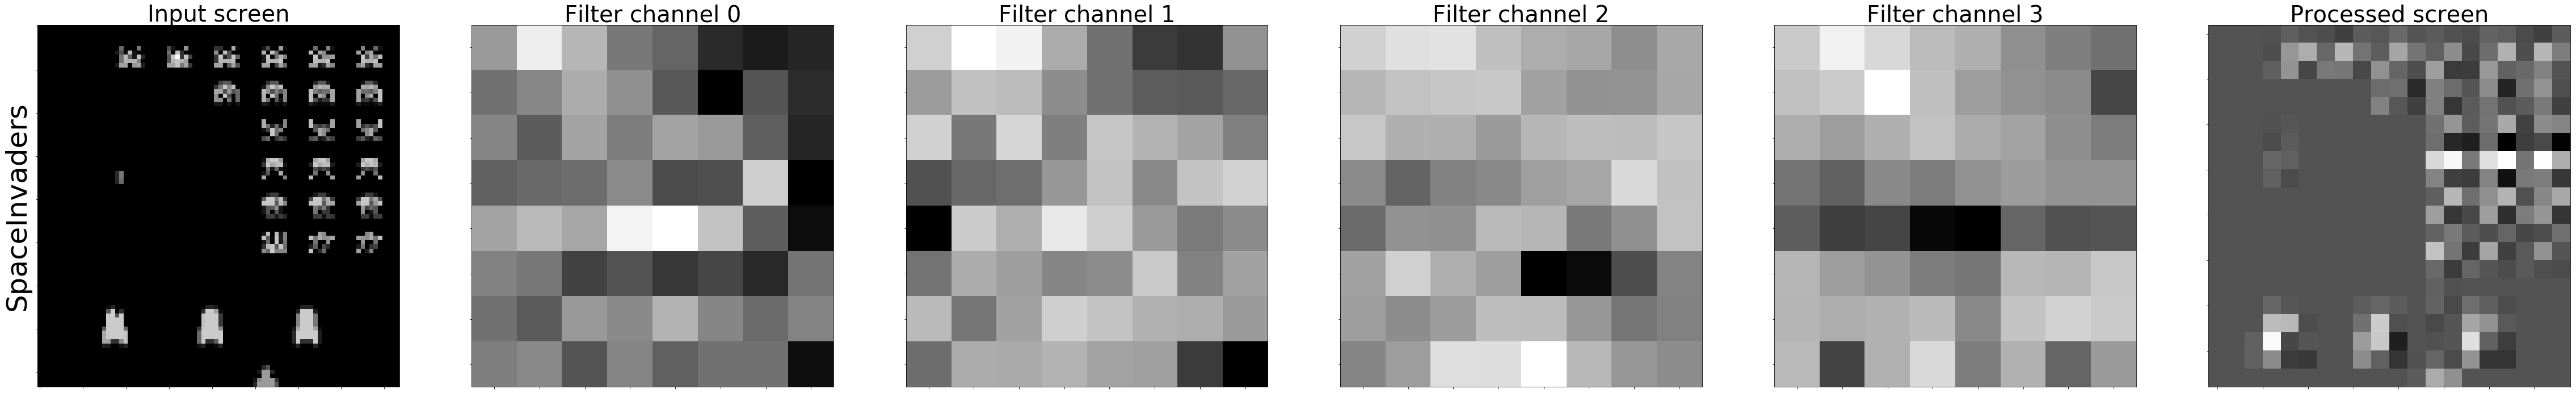

Filter: 4


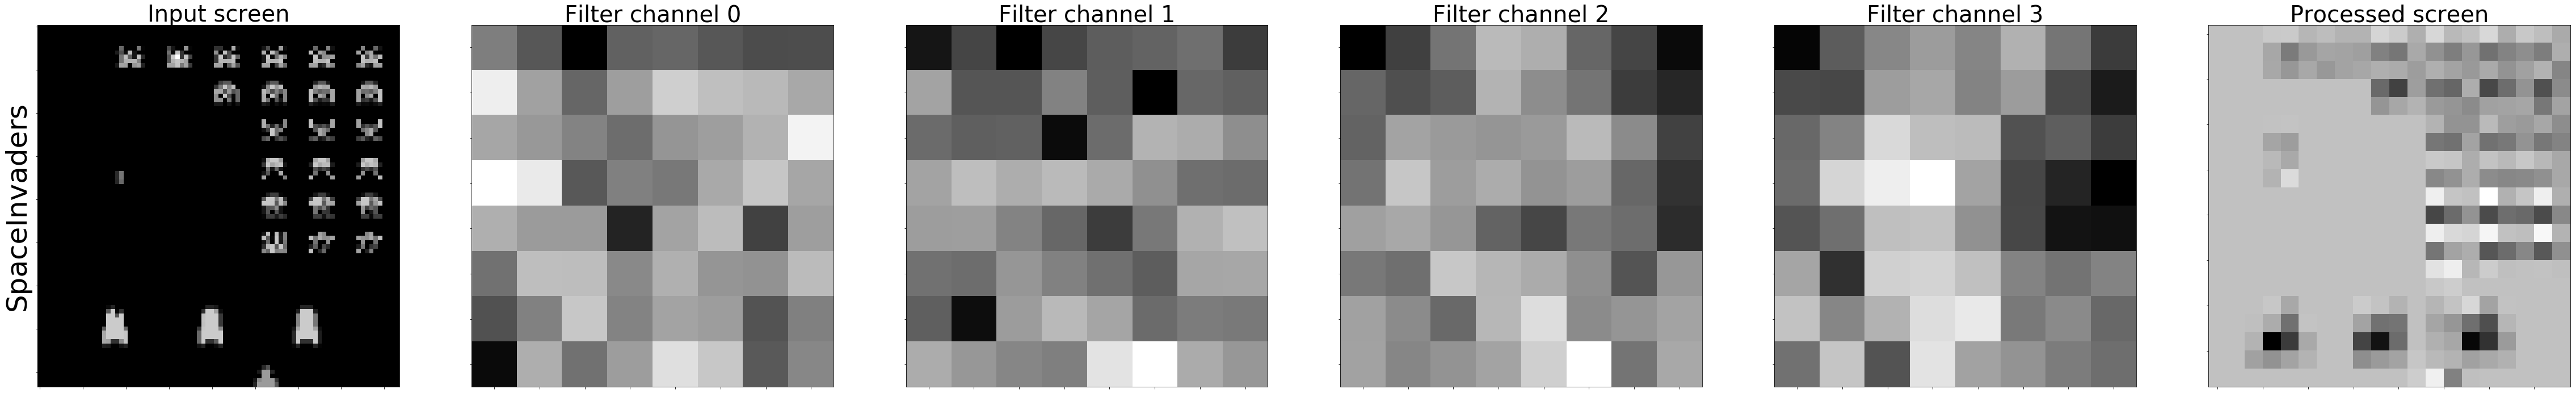

Filter: 5


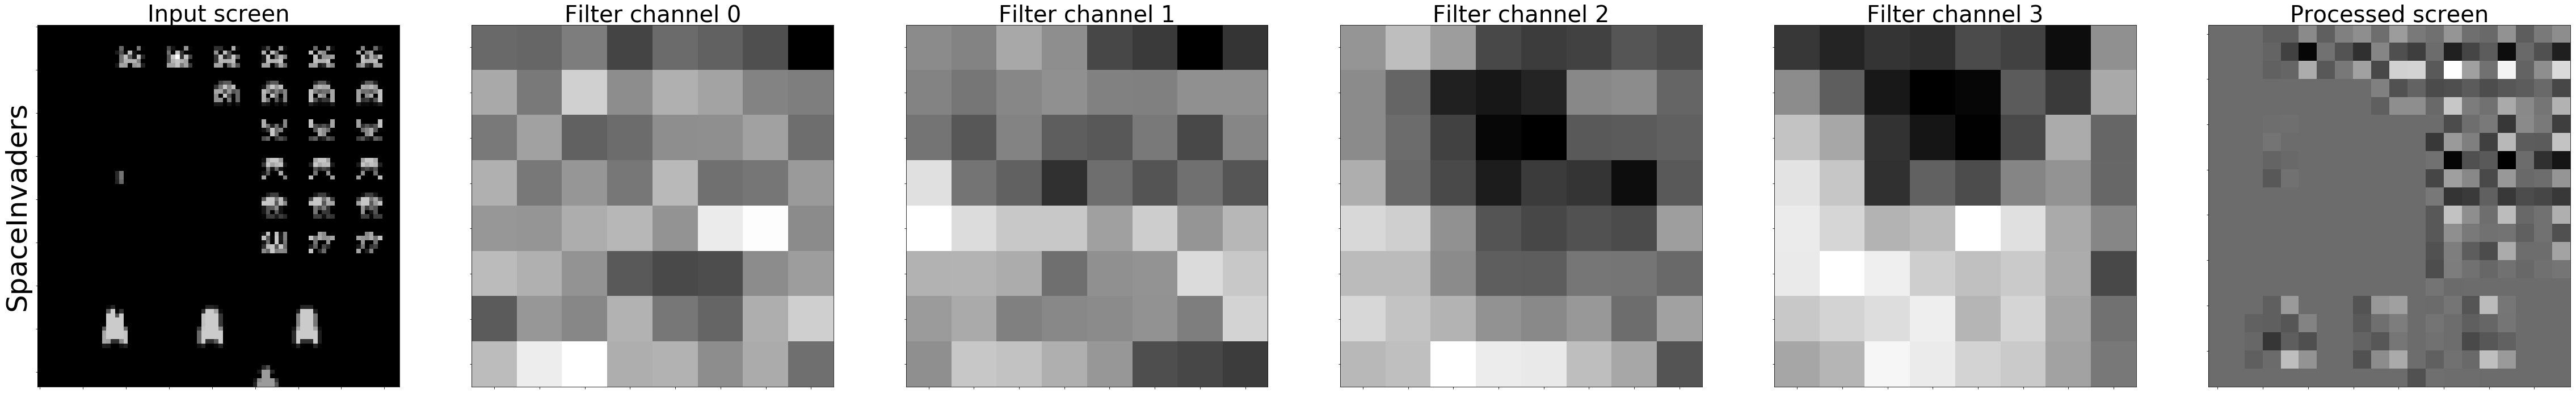

Filter: 6


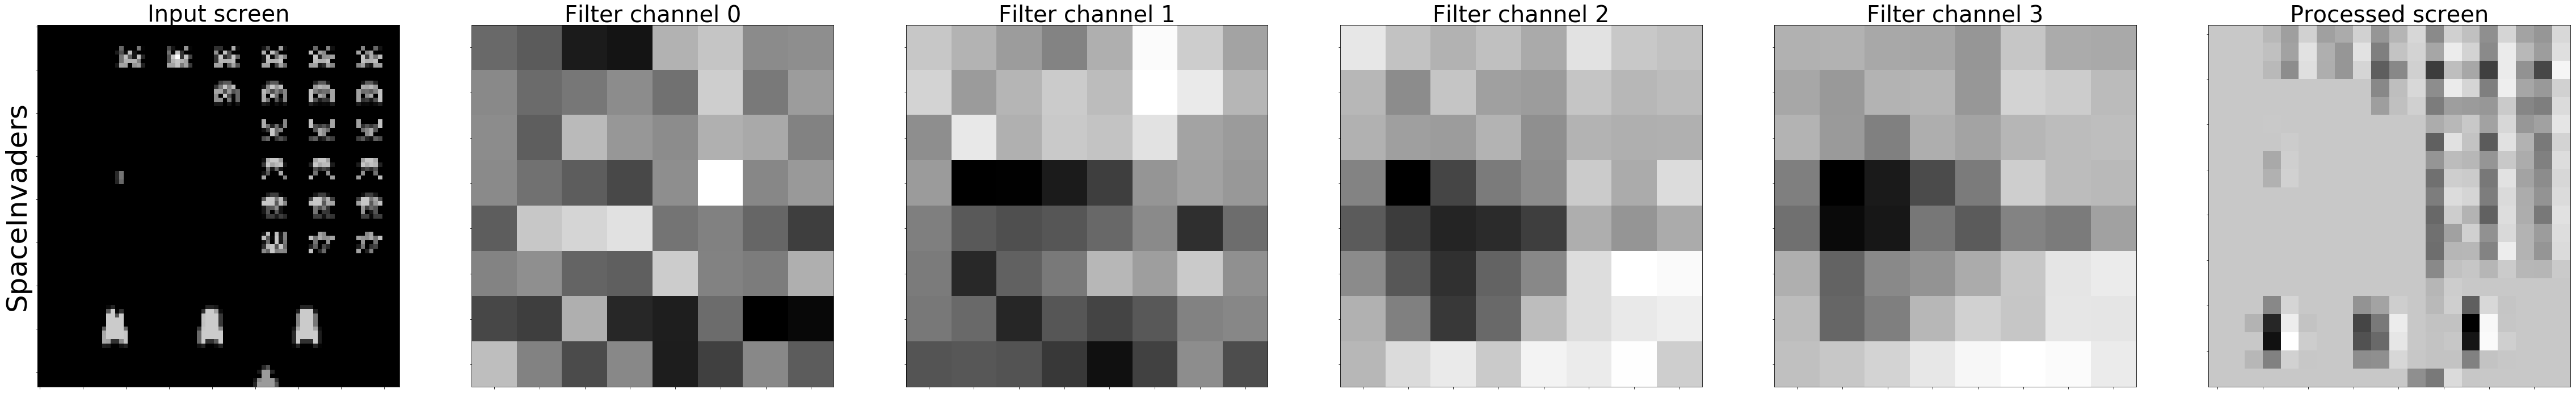

Filter: 7


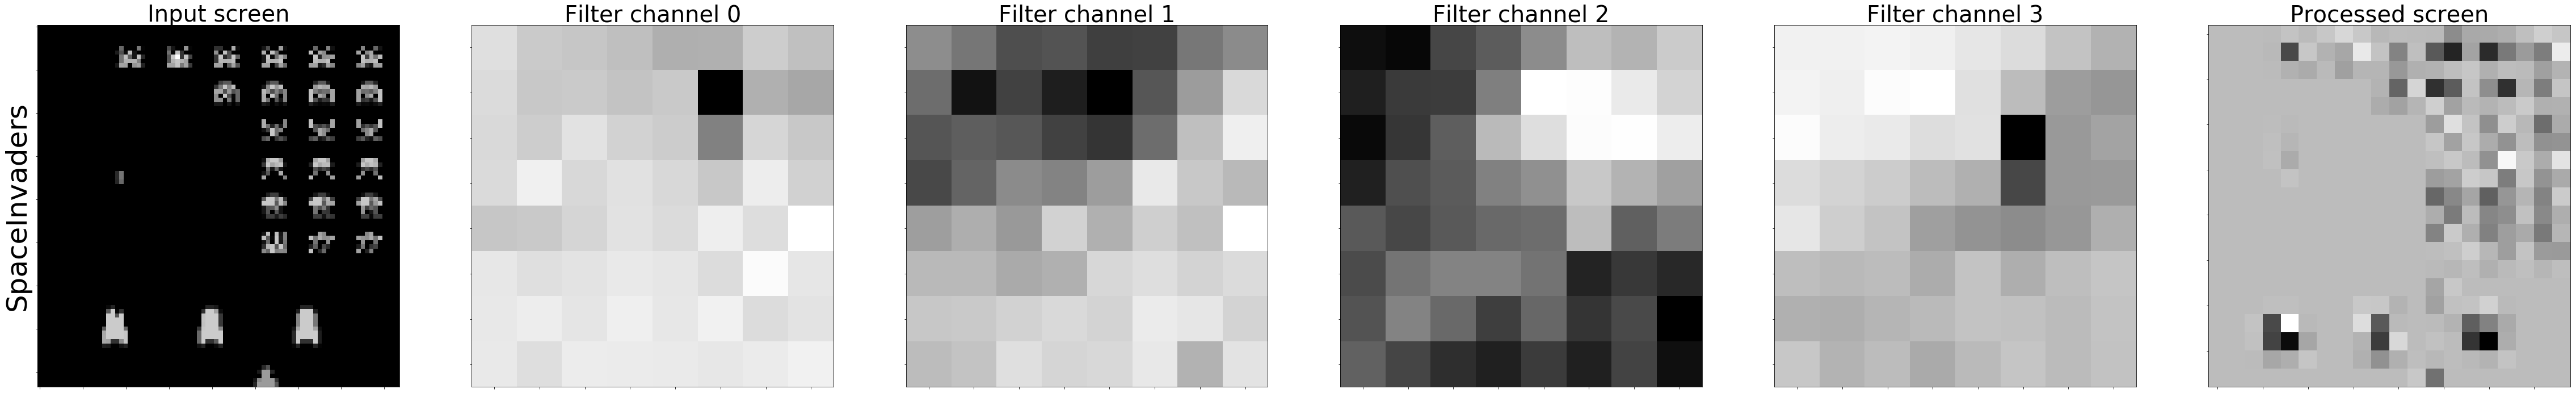

Filter: 8


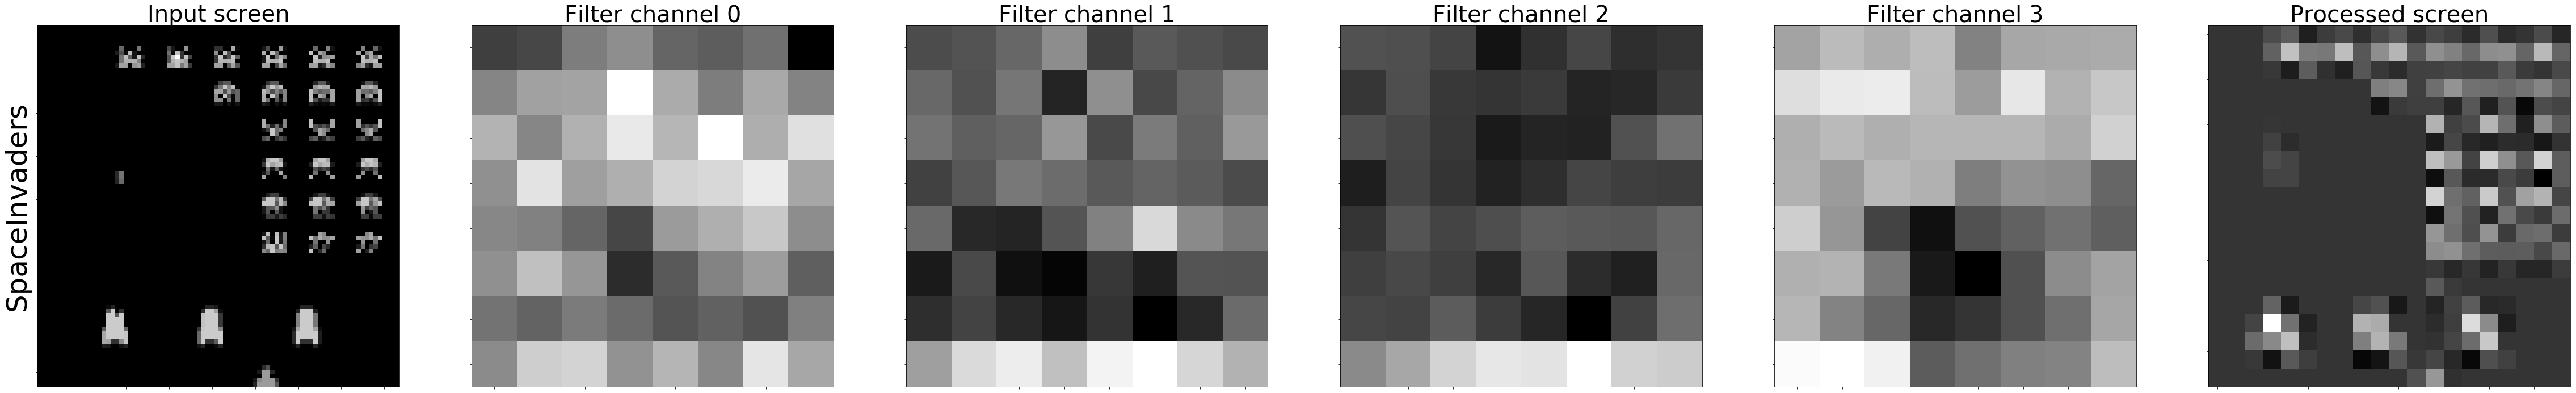

Filter: 9


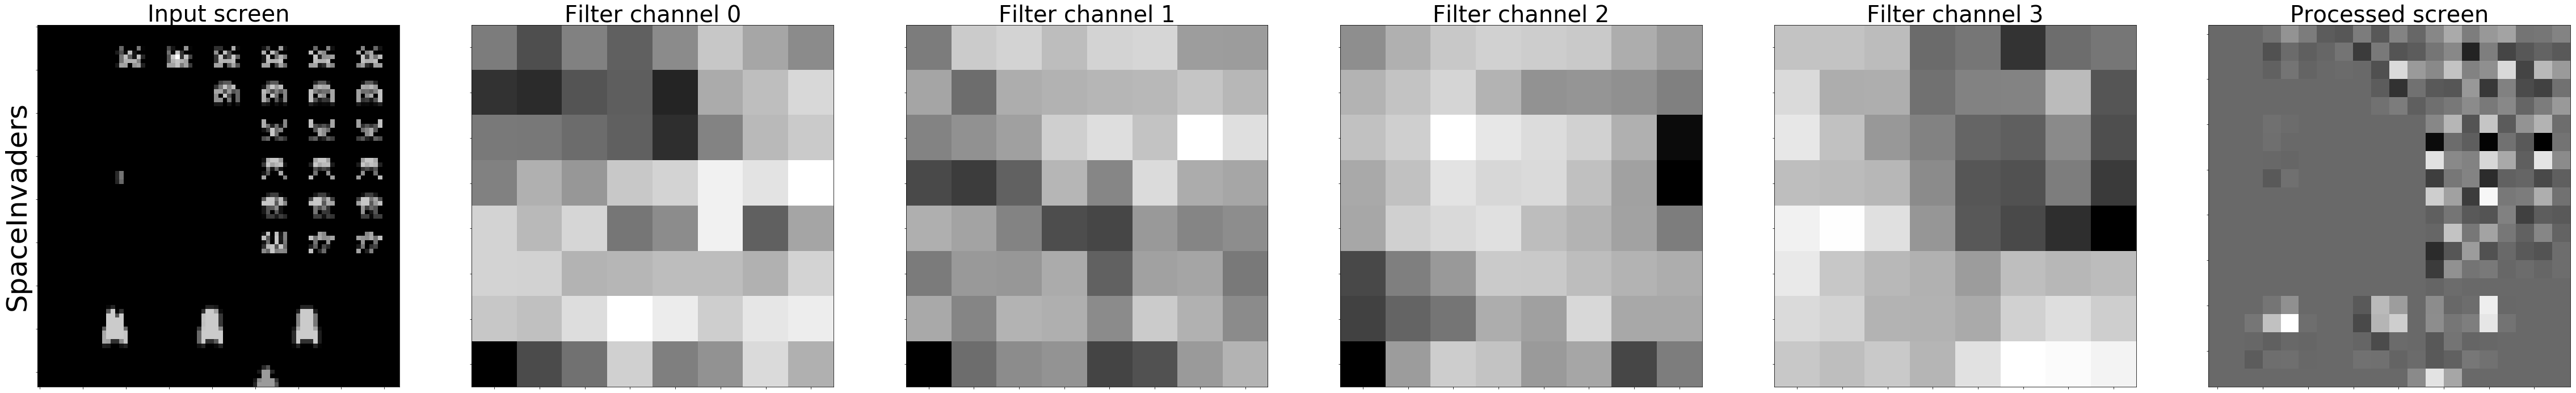

Filter: 10


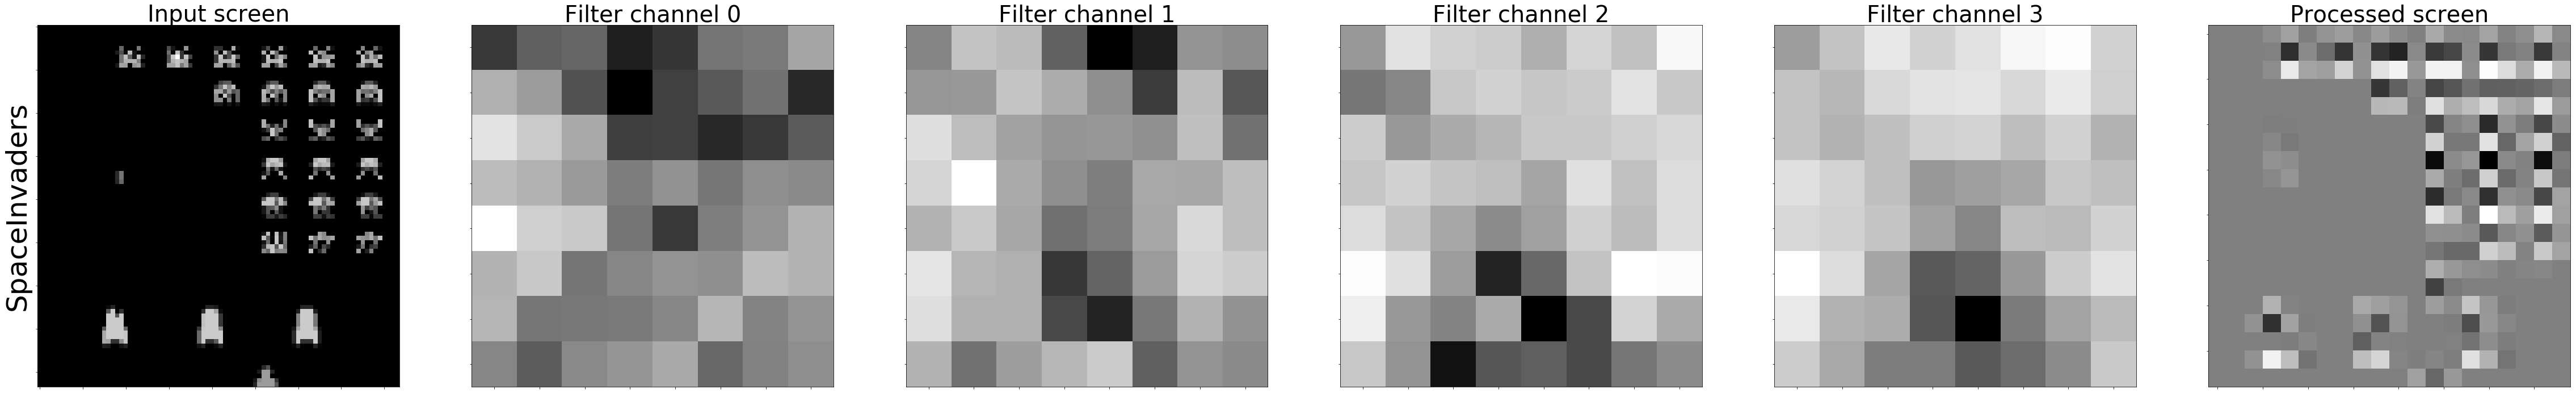

Filter: 11


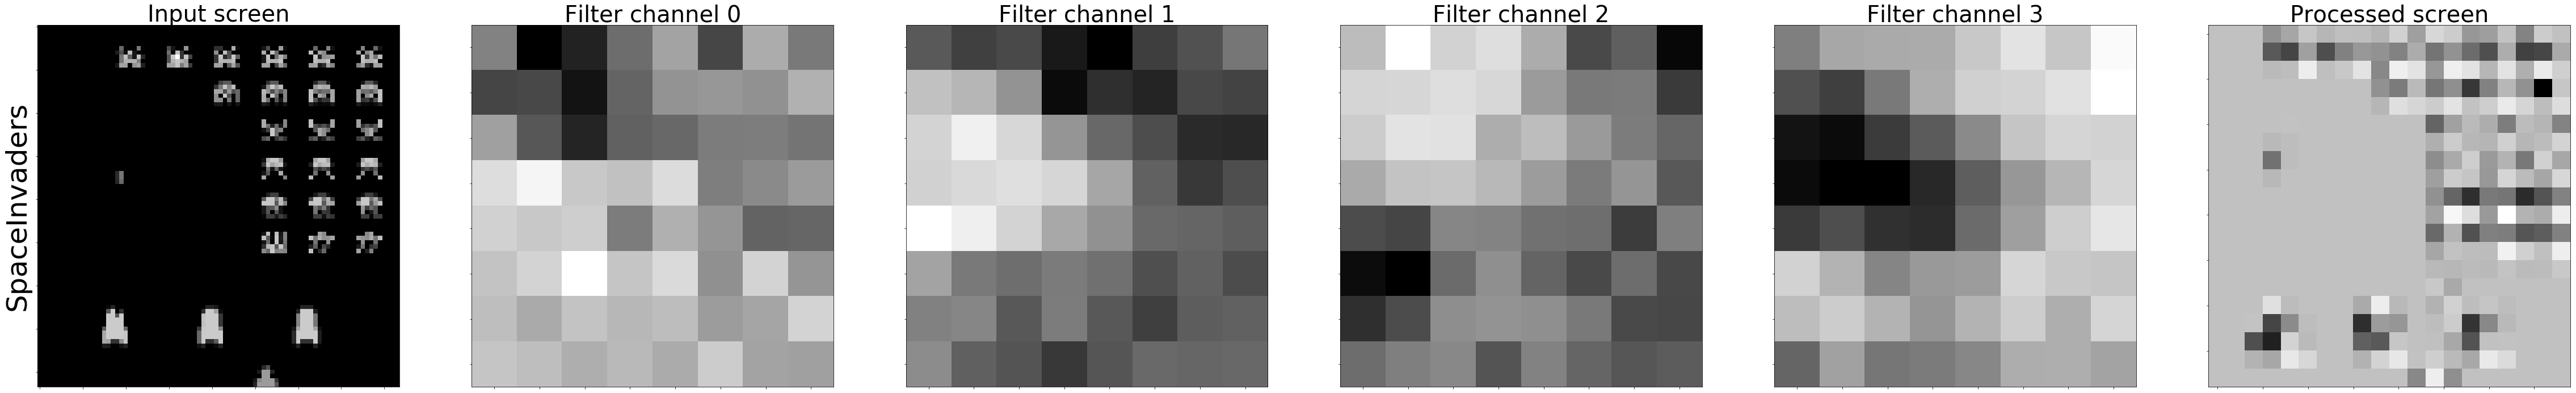

Filter: 12


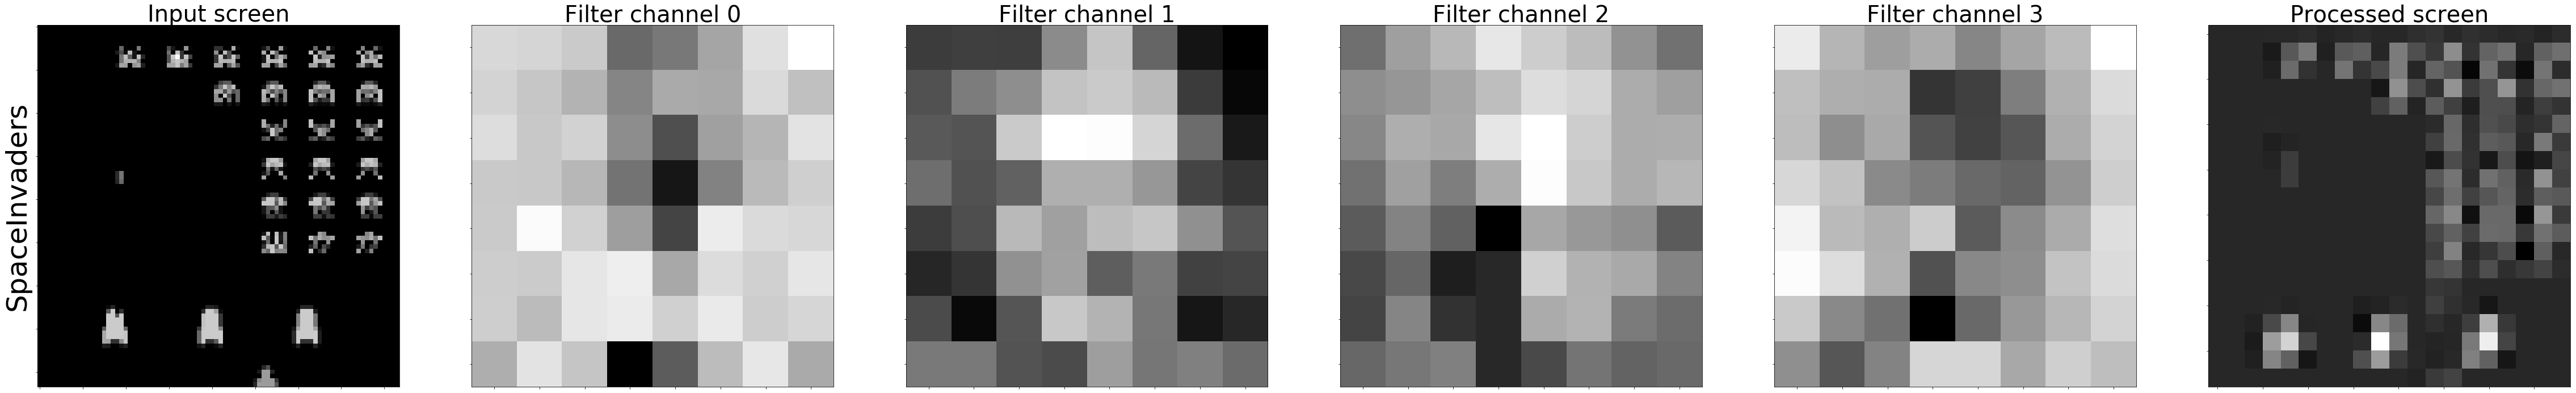

Filter: 13


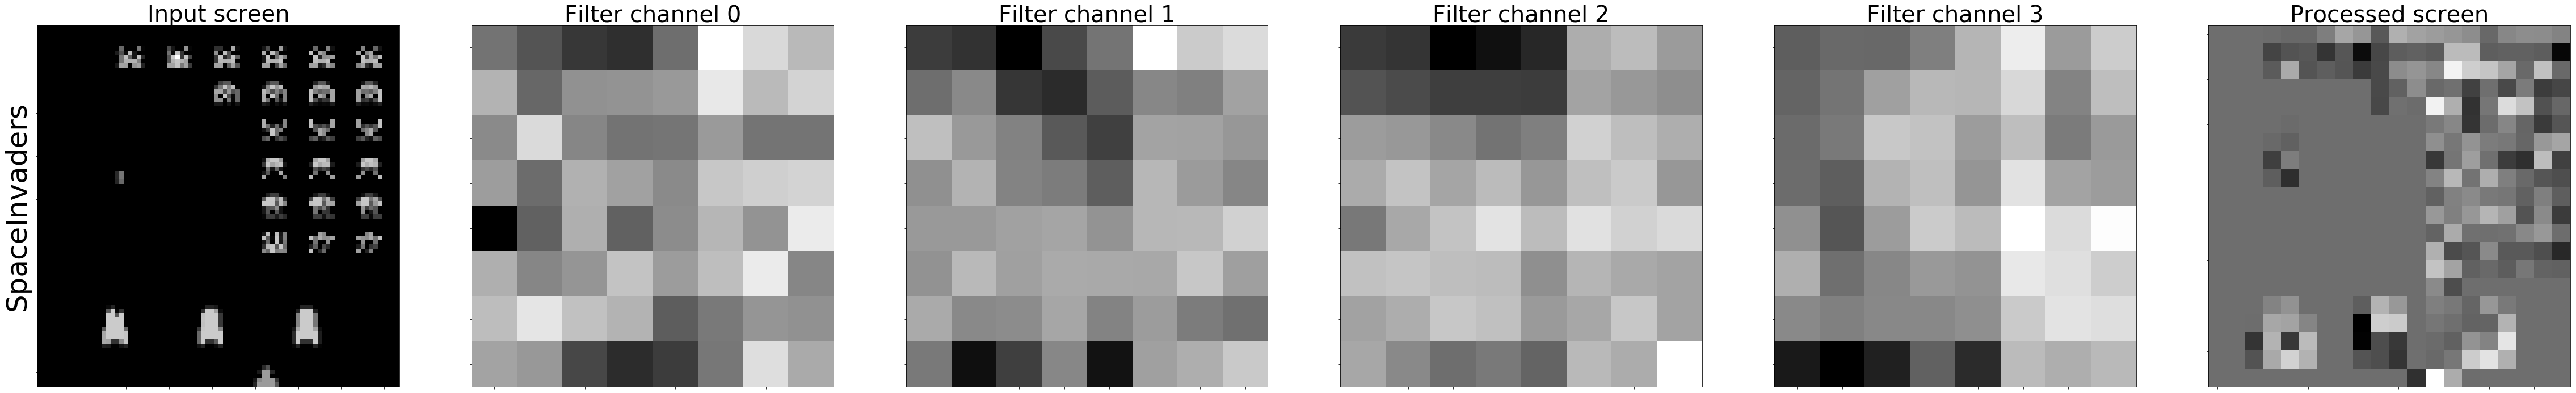

Filter: 14


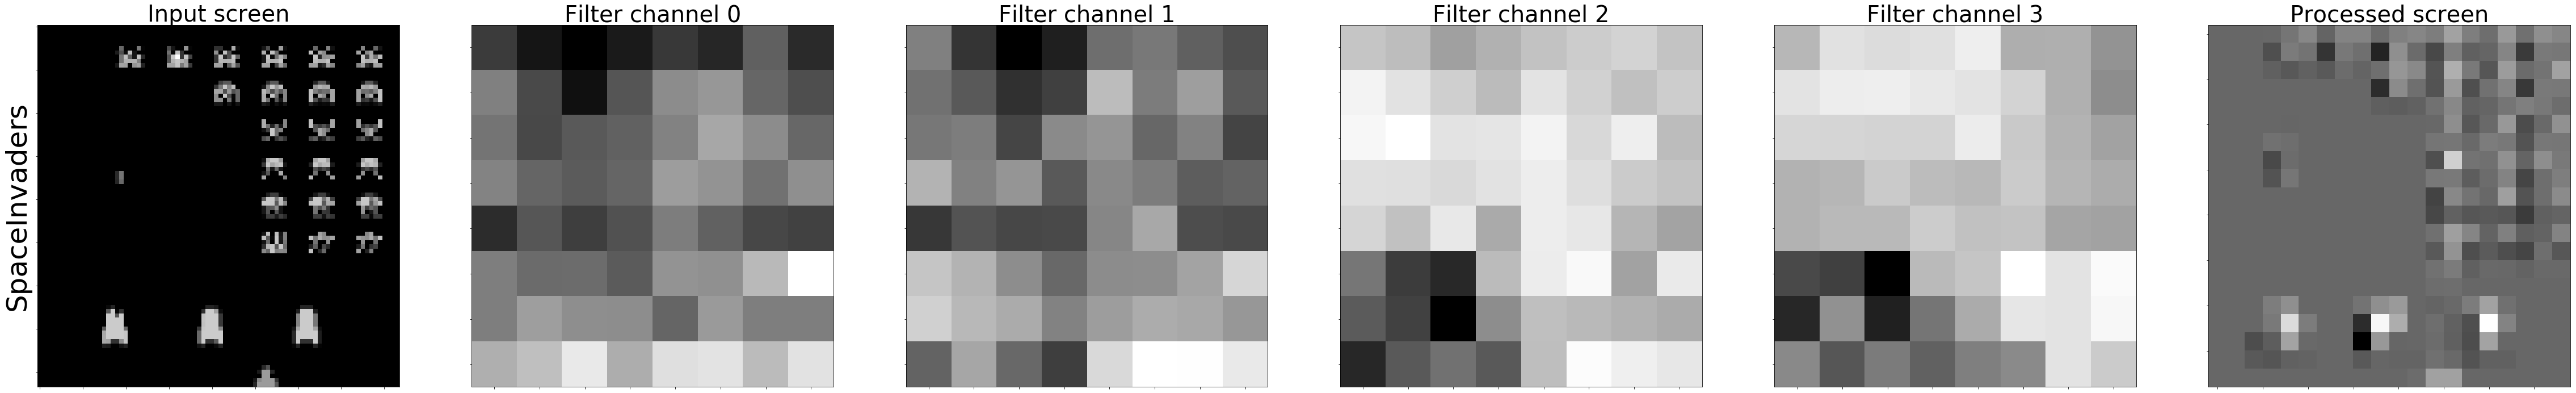

Filter: 15


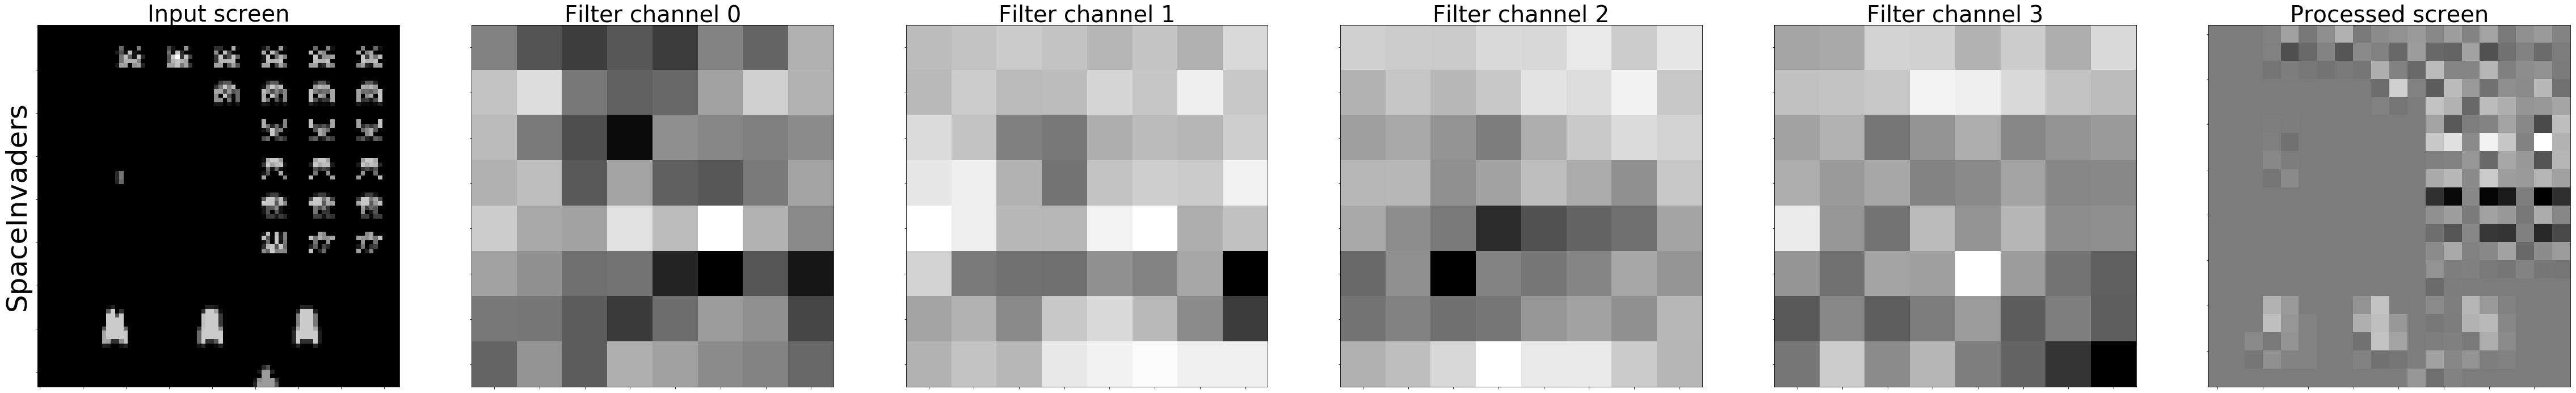

Filter: 16


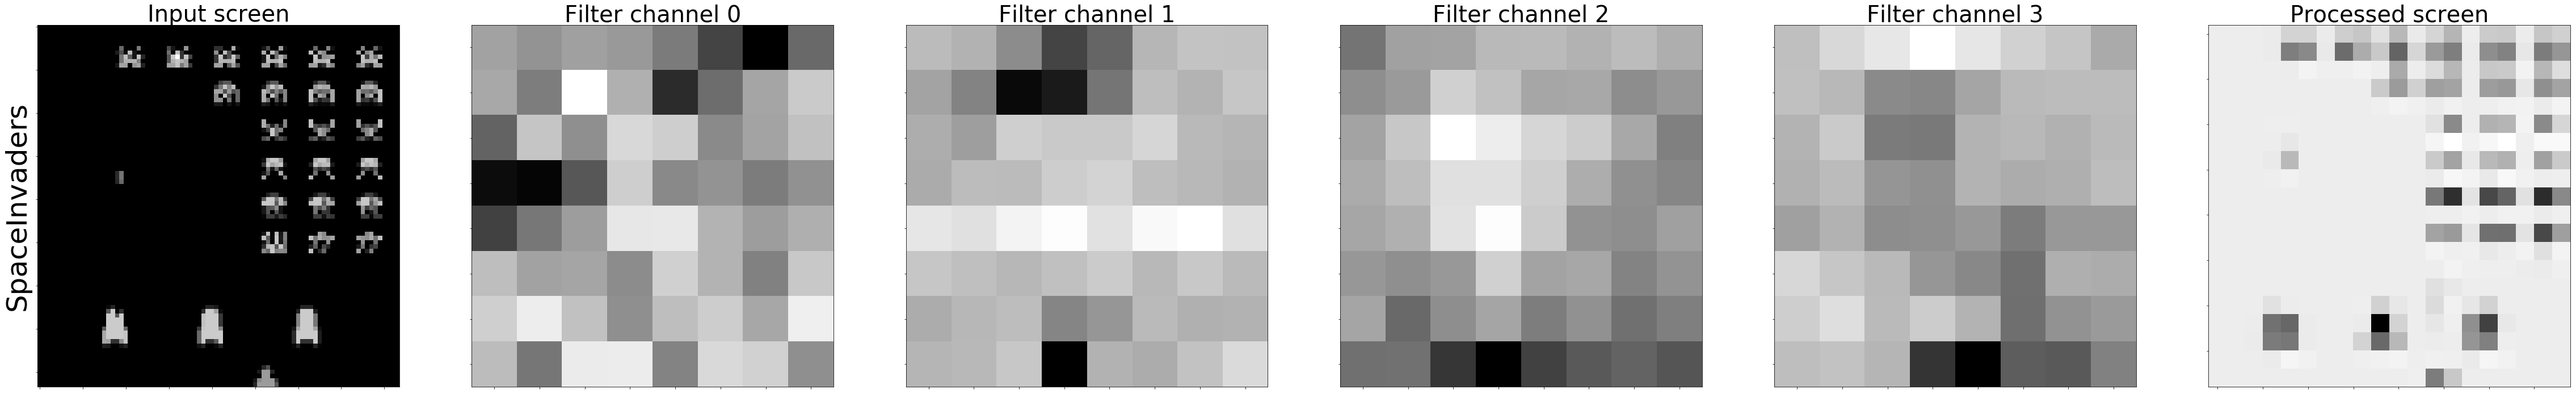

Filter: 17


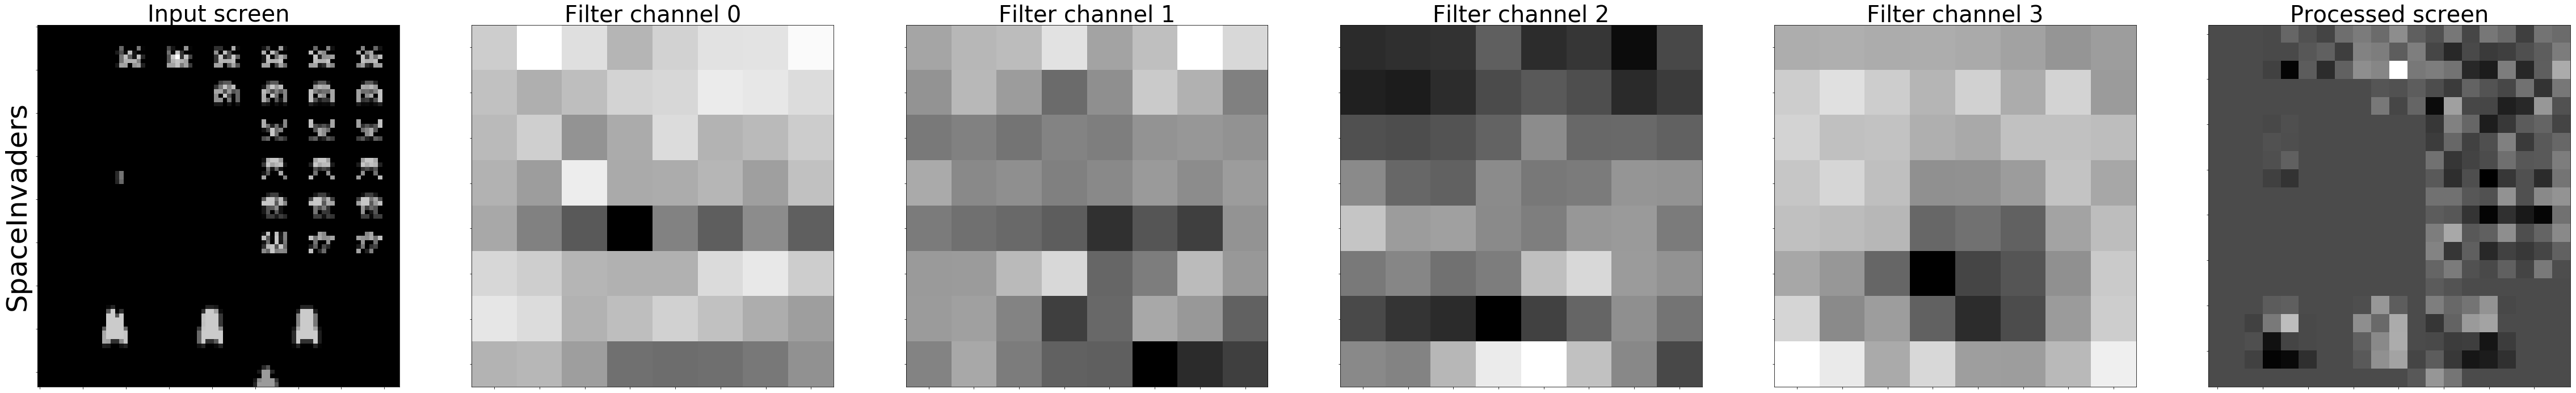

Filter: 18


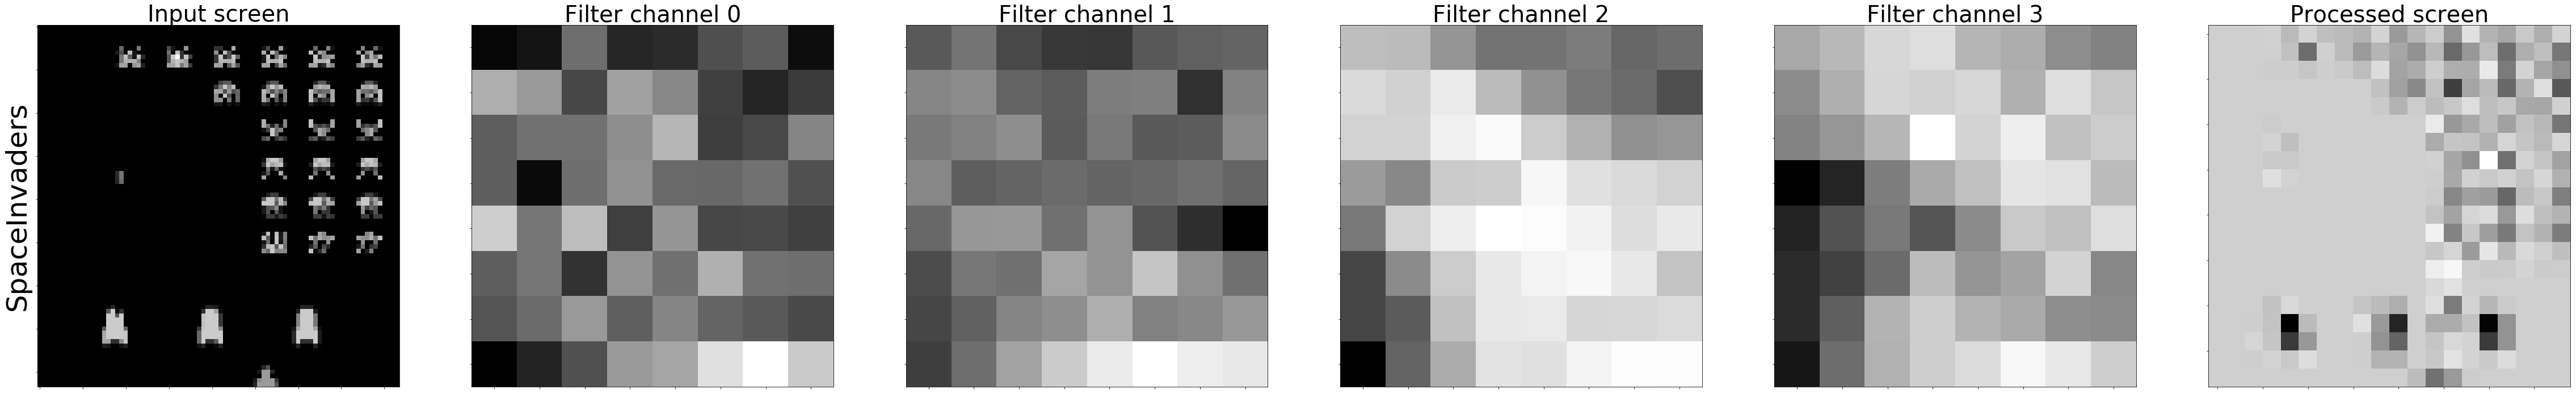

Filter: 19


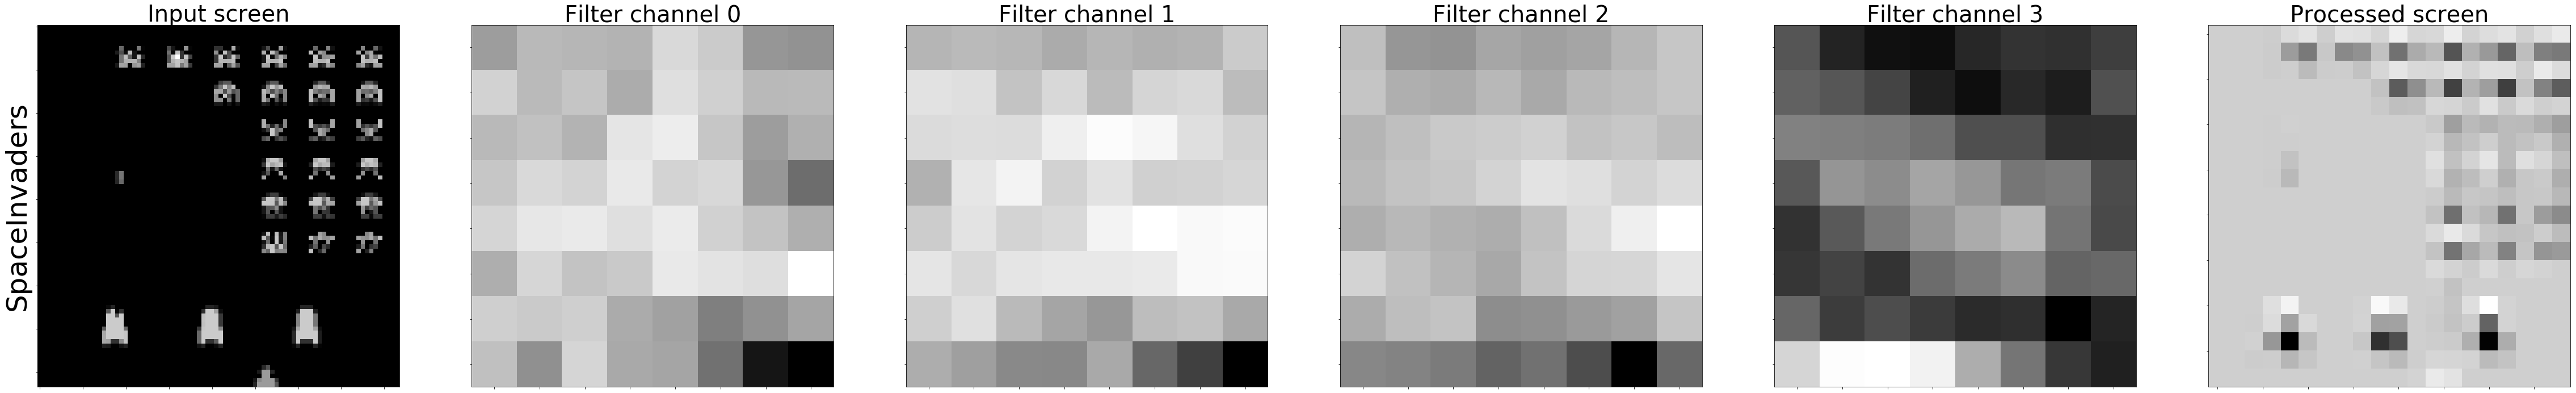

Filter: 20


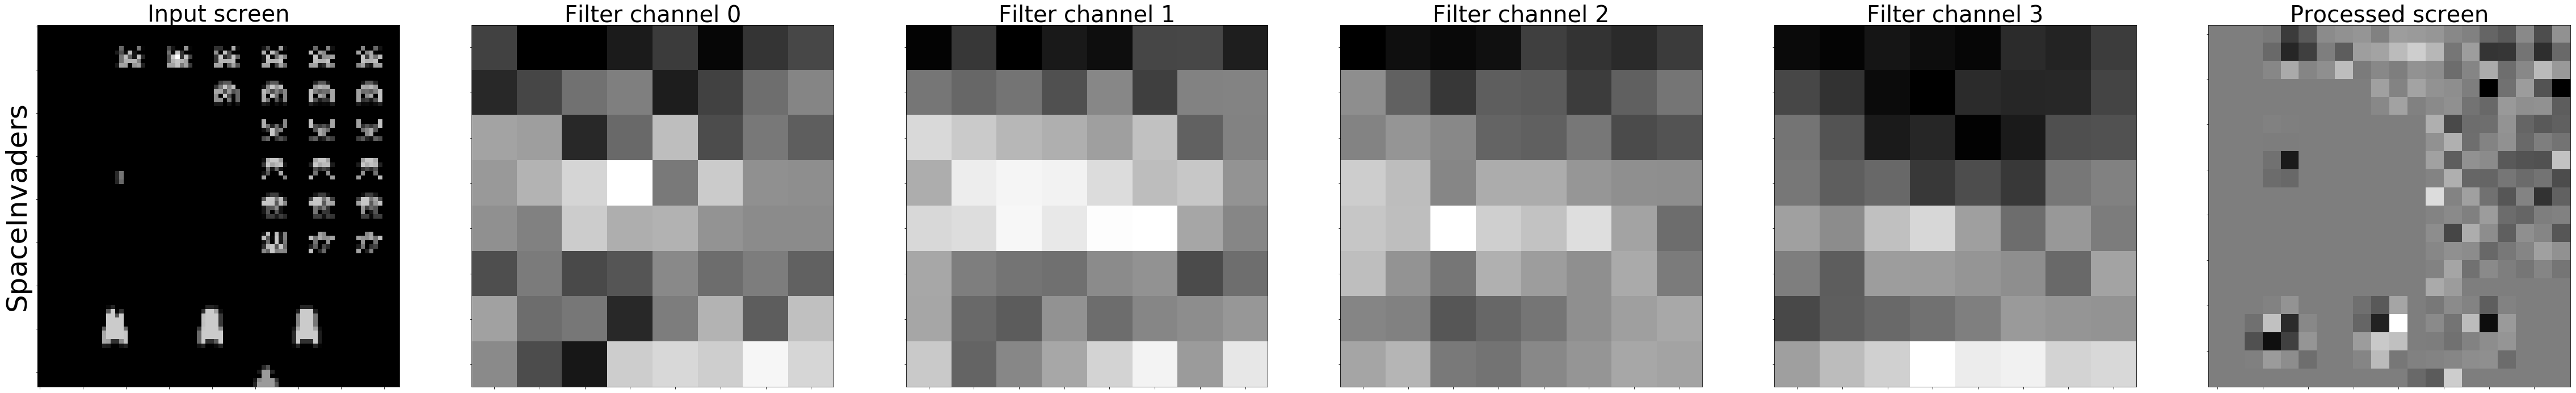

Filter: 21


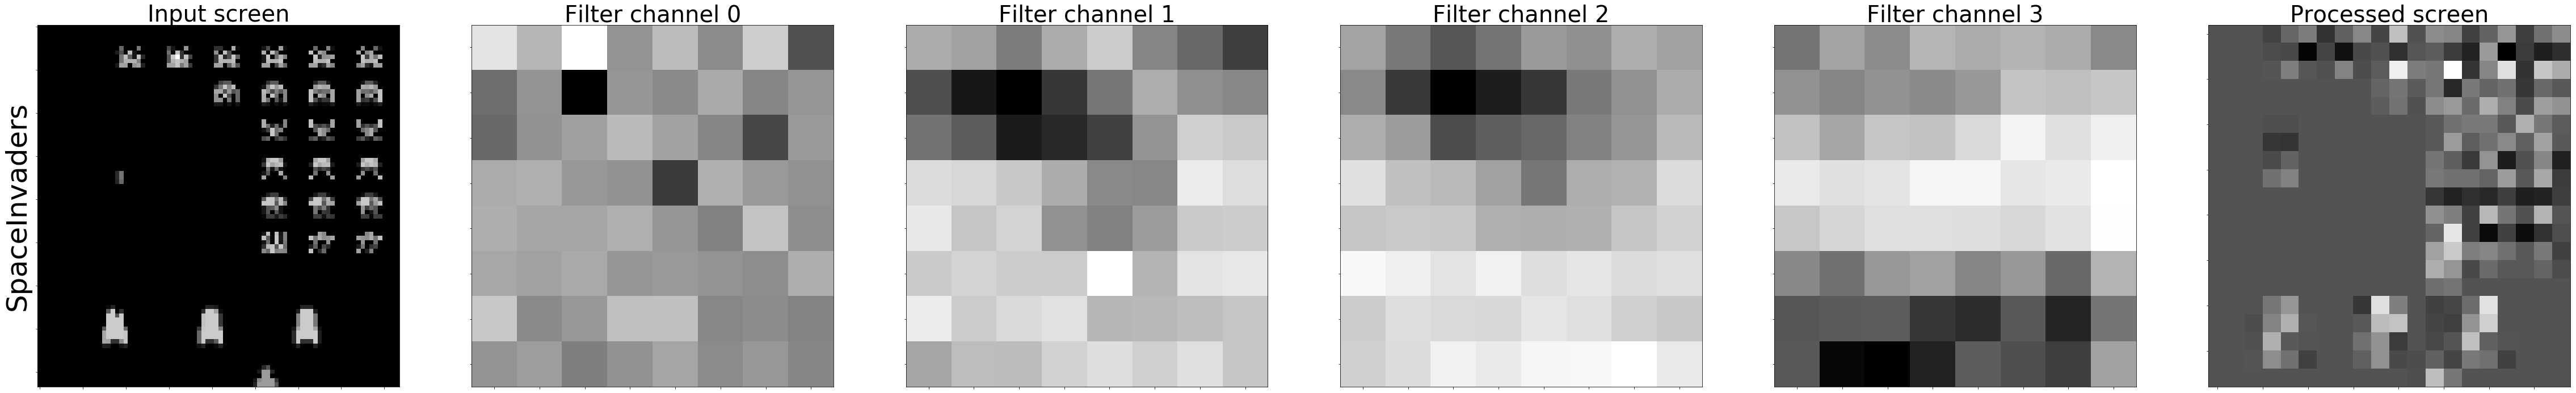

Filter: 22


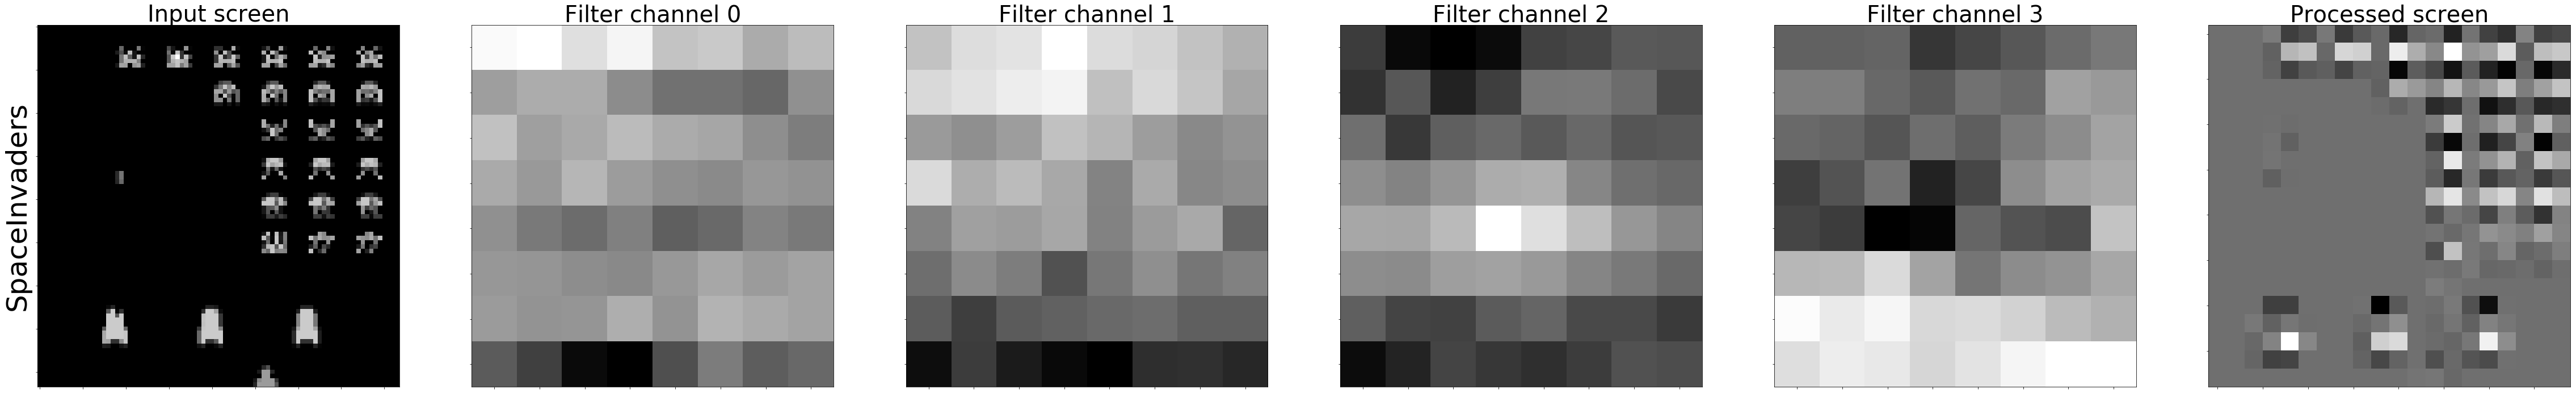

Filter: 23


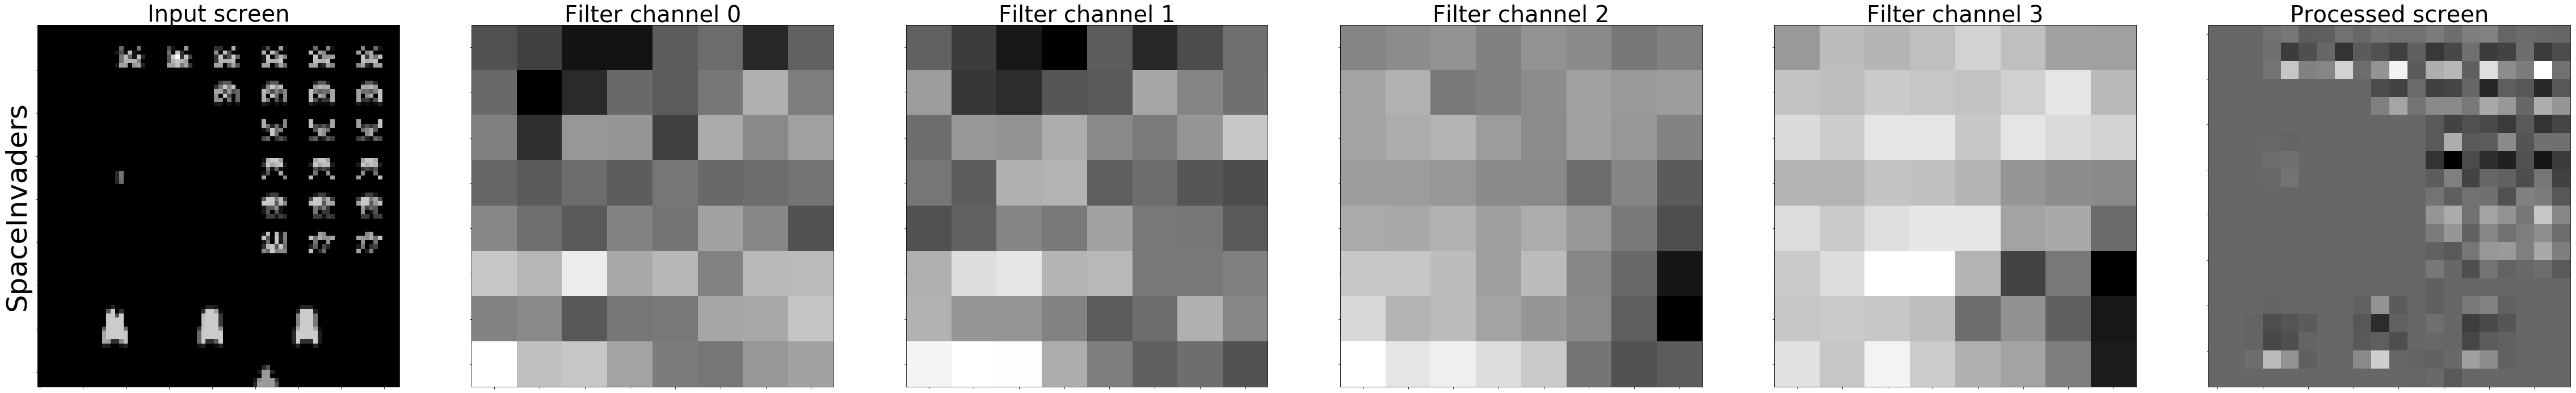

Filter: 24


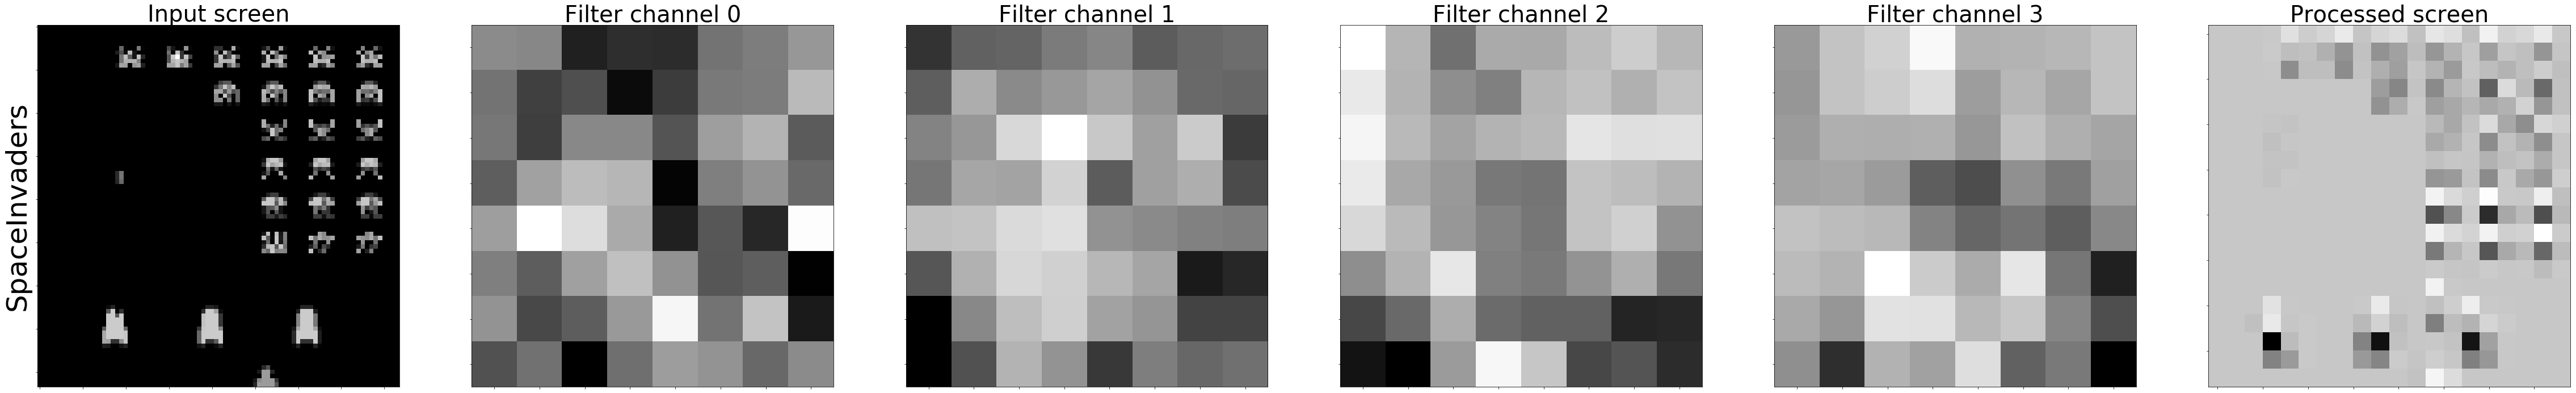

Filter: 25


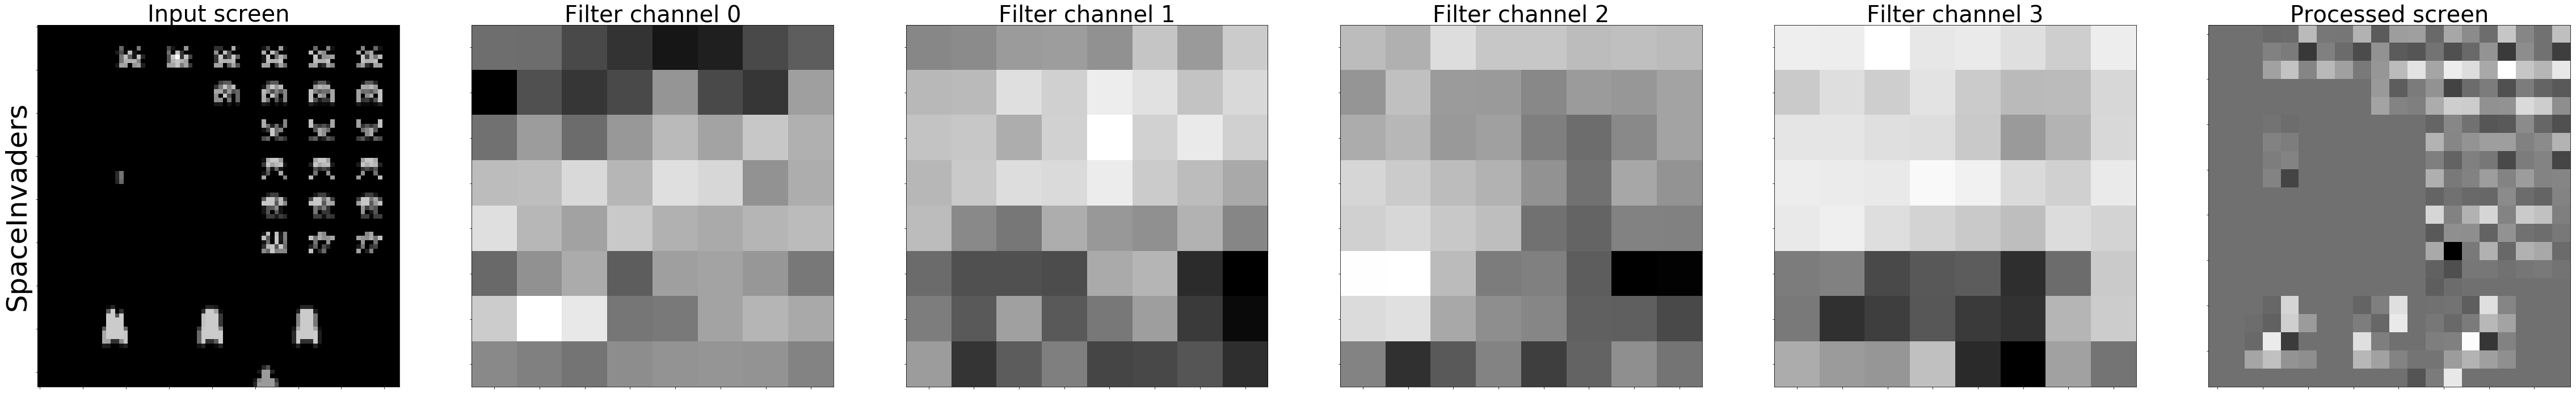

Filter: 26


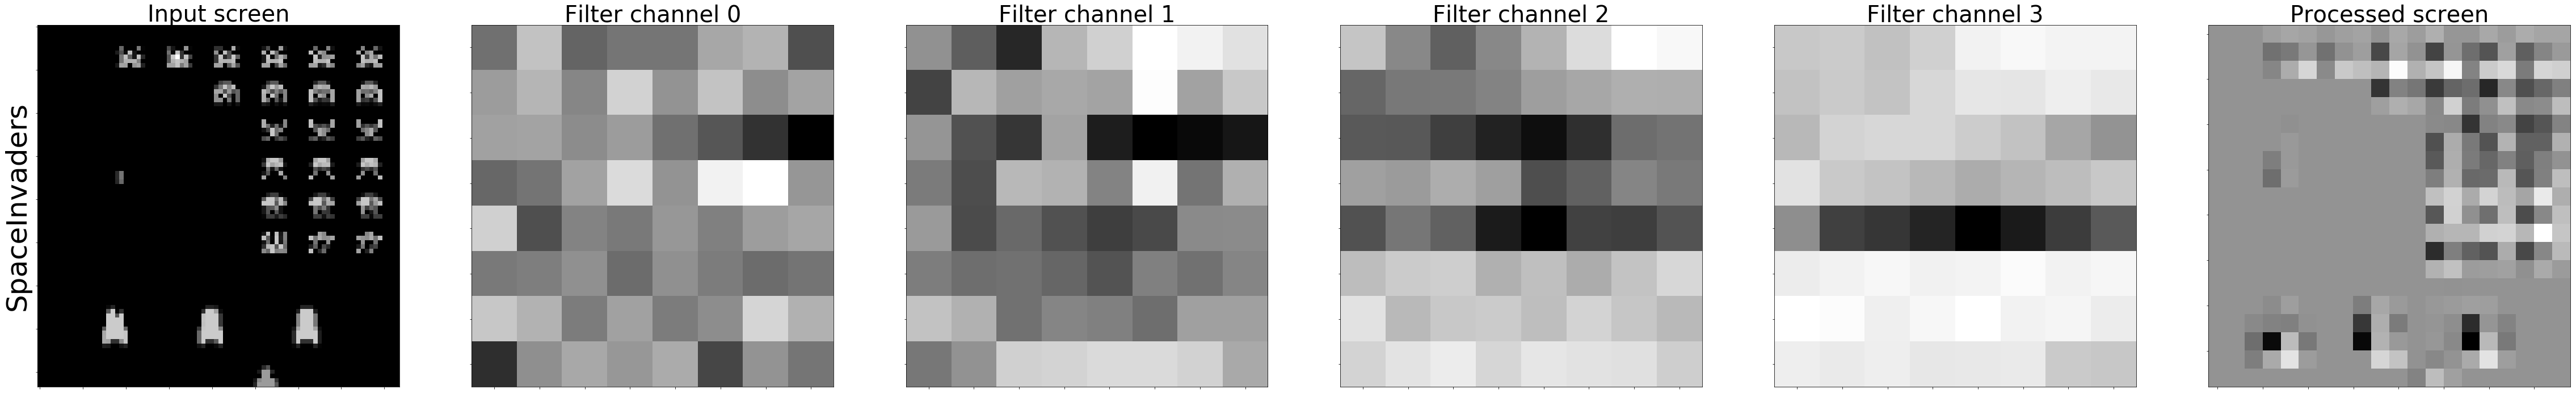

Filter: 27


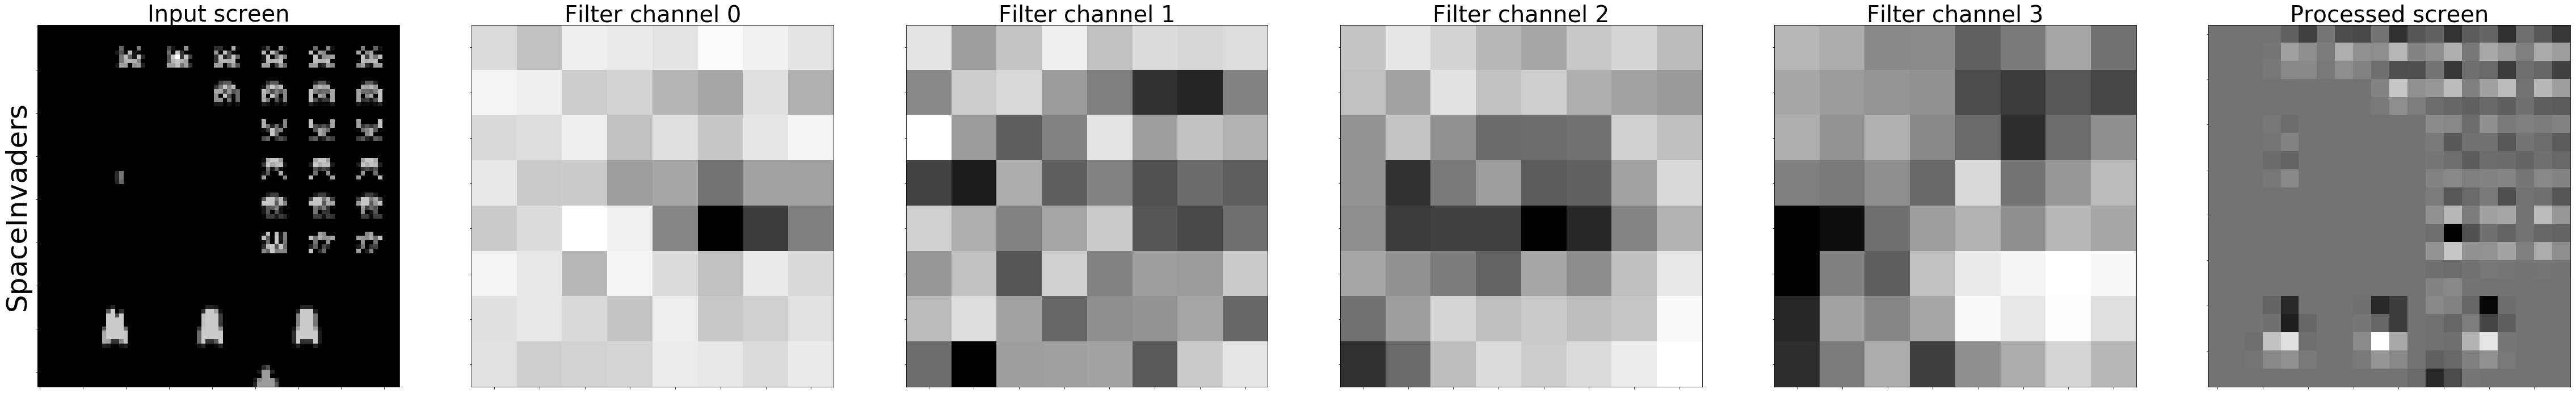

Filter: 28


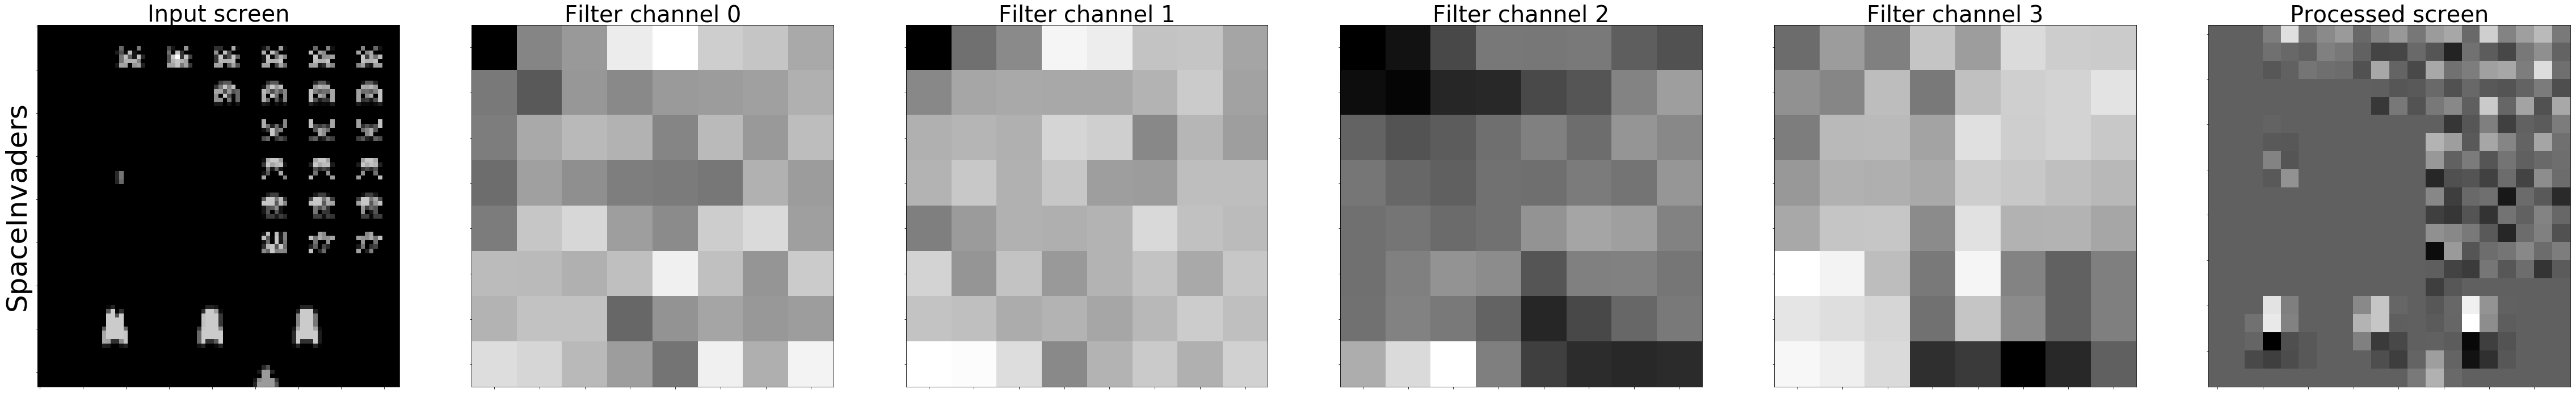

Filter: 29


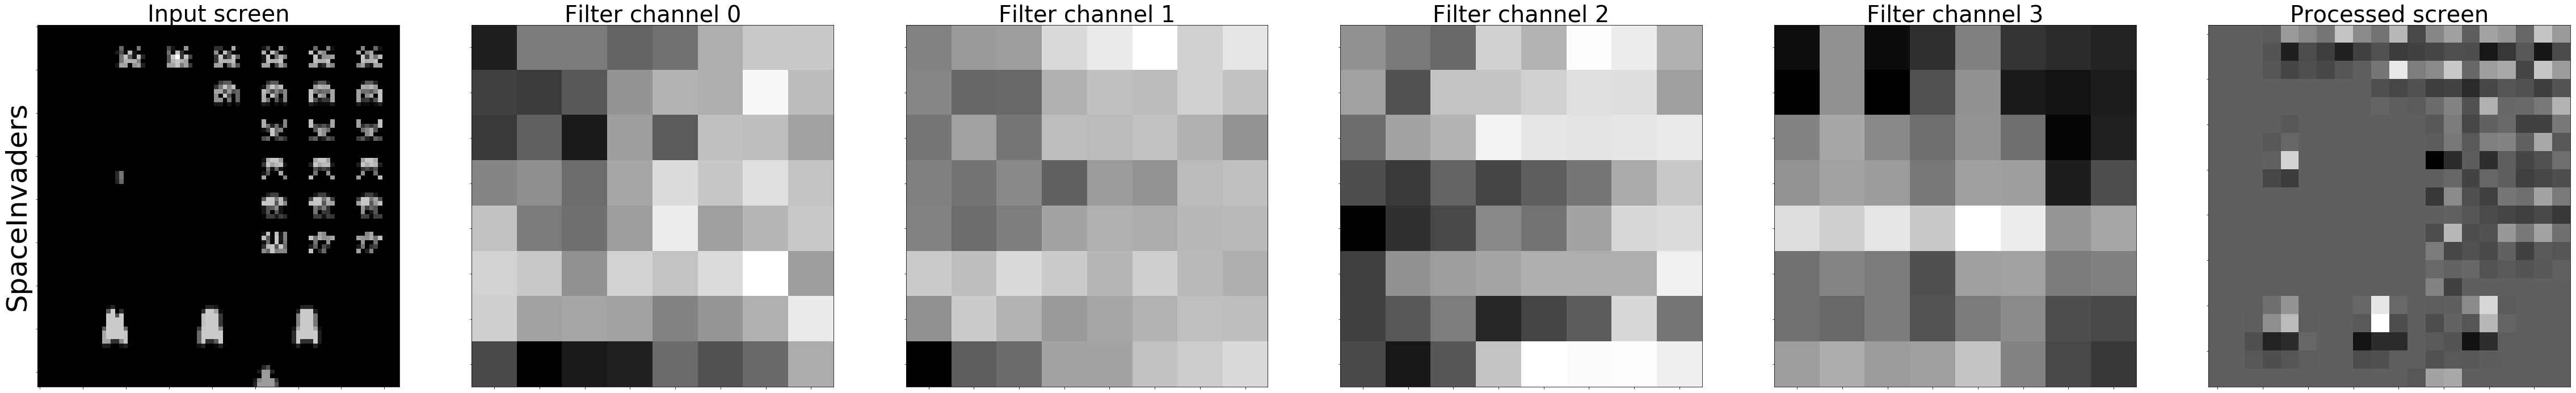

Filter: 30


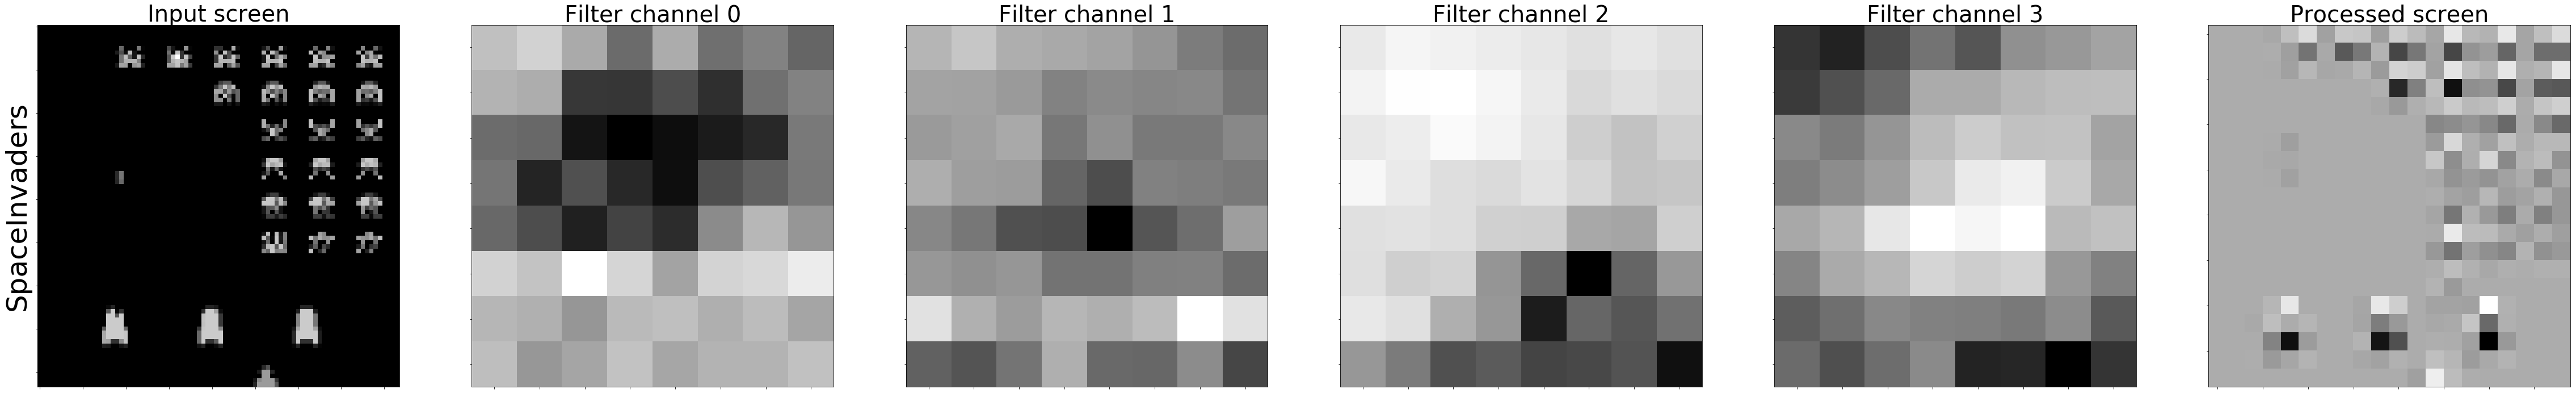

Filter: 31


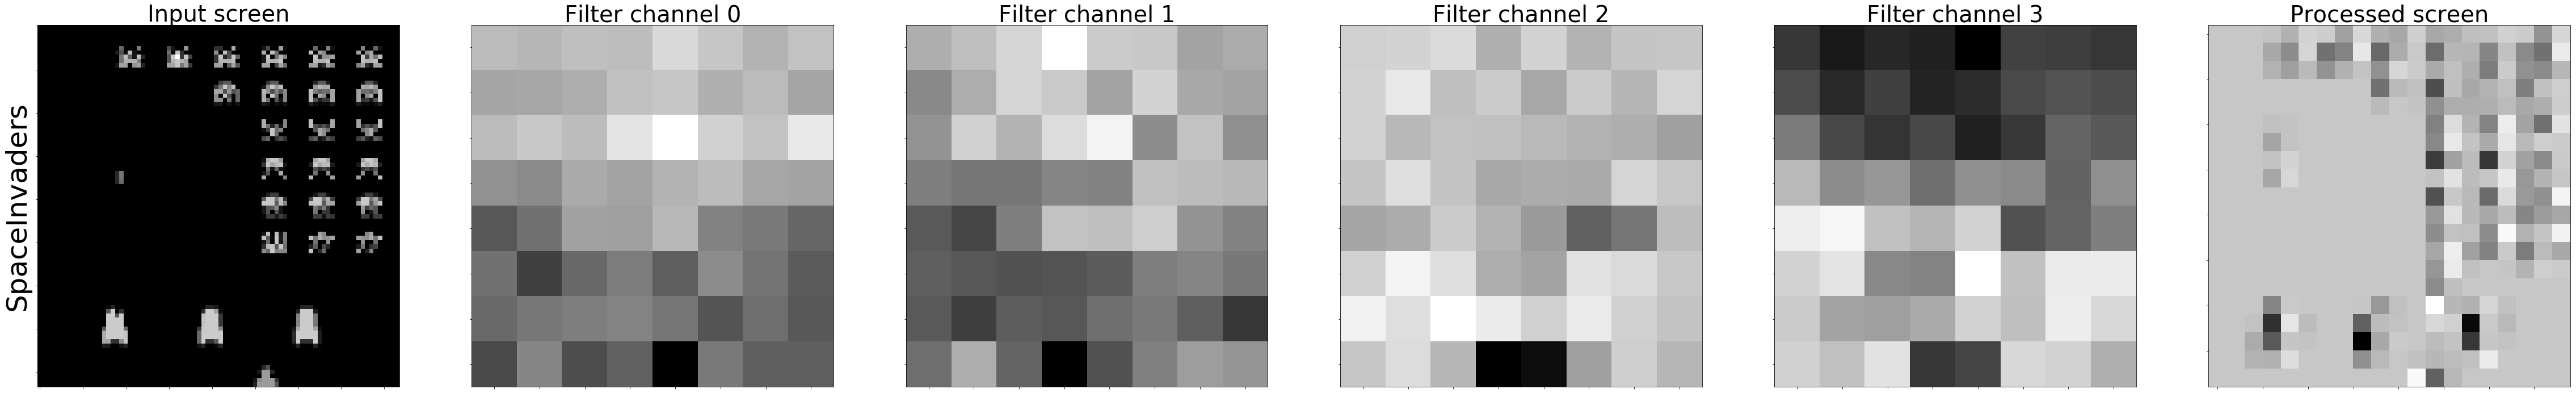

In [66]:
for filter_nr in range(32):
    print('Filter:', filter_nr)
    f, axarr = plt.subplots(1, 6)
    axarr[0].imshow(screen)
    axarr[0].set_title('Input screen', fontsize=40)
    axarr[0].set_ylabel('SpaceInvaders', fontsize=50)
    axarr[0].set_yticklabels([])
    axarr[0].set_xticklabels([])

    for i in range(4):
        axarr[i+1].imshow(conv1_breakout[filter_nr,i])
        axarr[i+1].set_title('Filter channel '+ str(i), fontsize=40)
        axarr[i+1].set_yticklabels([])
        axarr[i+1].set_xticklabels([])
    axarr[5].imshow(output[filter_nr])
    axarr[5].set_title('Processed screen', fontsize=40)
    axarr[5].set_yticklabels([])
    axarr[5].set_xticklabels([])
    plt.show()

# Plot preprocessing pipeline

[]

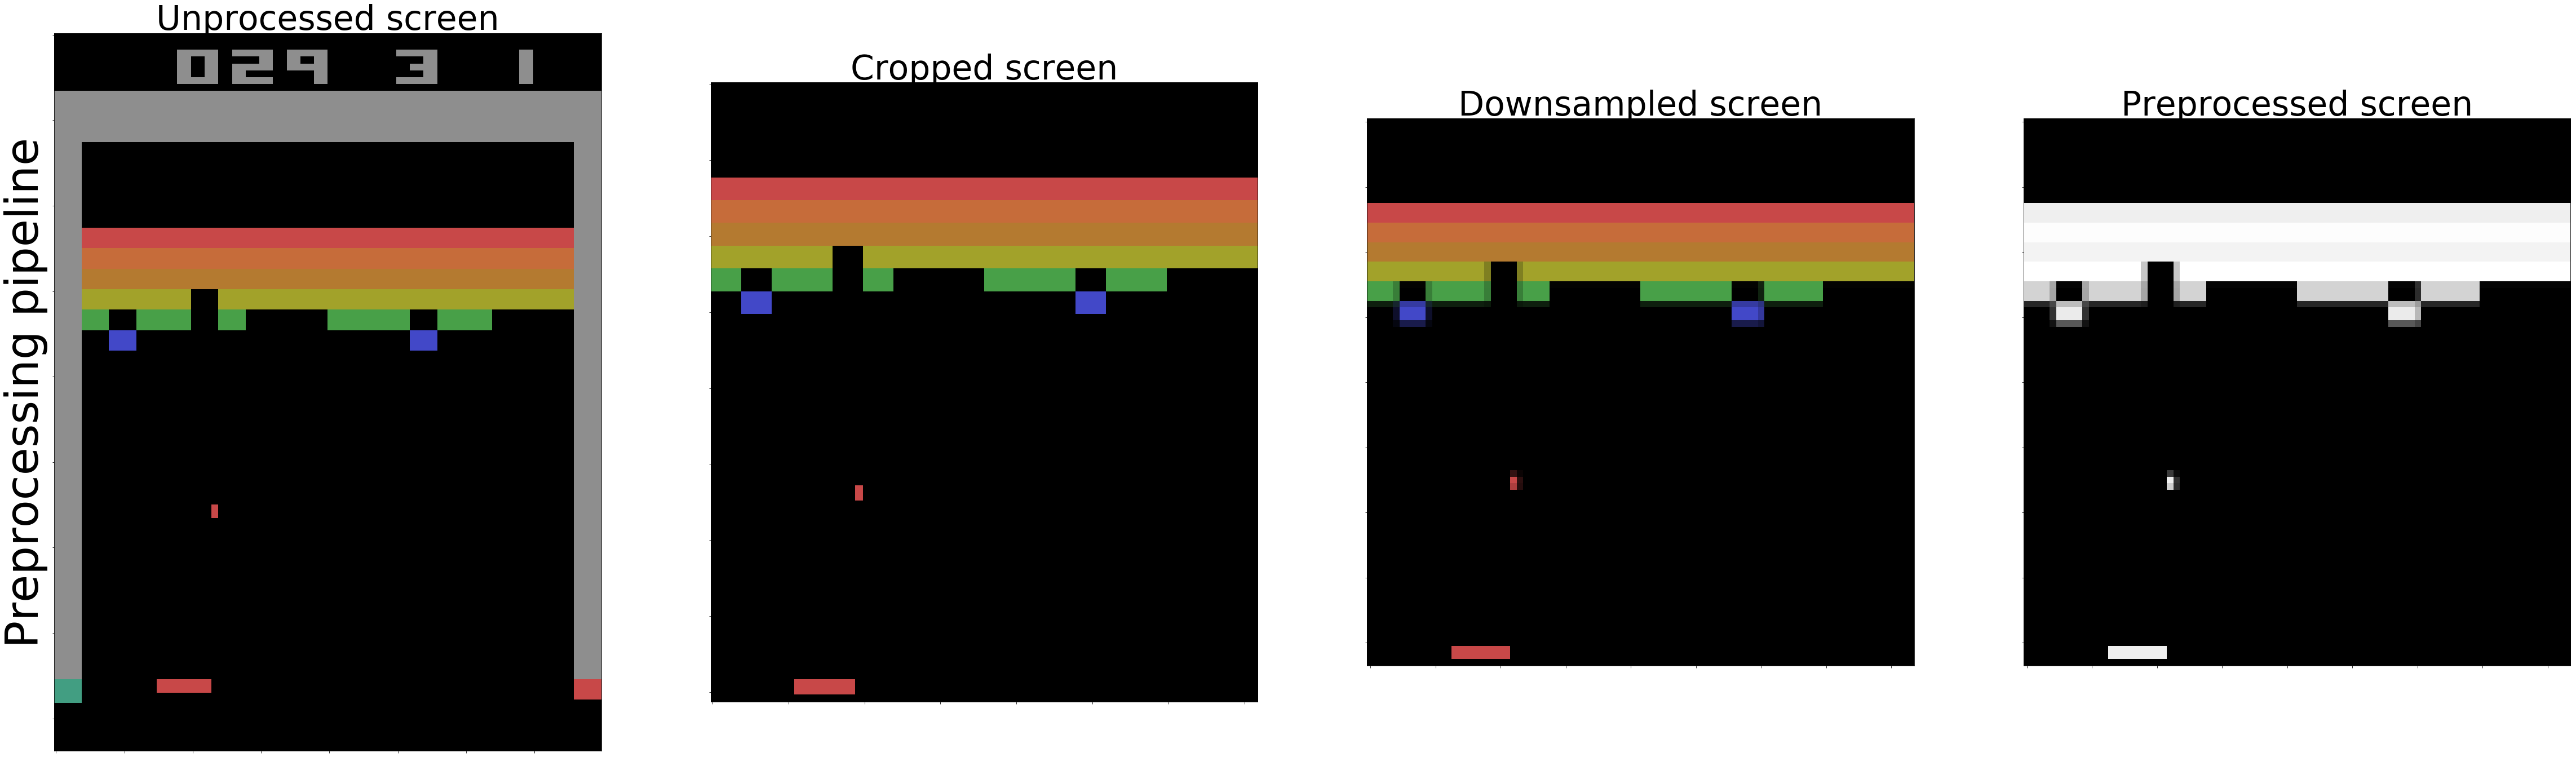

In [44]:
# Change here game
agent = agent_breakout

screen_unprocessed = agent.env.game.render(mode='rgb_array')
screen_crop = agent.env.crop(screen_unprocessed)
screen_downsampled = agent.env.downsample(screen_crop)
screen_preprocessed = agent.env.rgb2gray(screen_downsampled)

f, axarr = plt.subplots(1, 4)

# Unprocessed screen
axarr[0].imshow(screen_unprocessed)
axarr[0].set_title('Unprocessed screen', fontsize=60)
axarr[0].set_ylabel('Preprocessing pipeline', fontsize=80)
axarr[0].set_yticklabels([])
axarr[0].set_xticklabels([])

# Cropped screen
axarr[1].imshow(screen_crop)
axarr[1].set_title('Cropped screen', fontsize=60)
axarr[1].set_yticklabels([])
axarr[1].set_xticklabels([])

# Downsampled screen
axarr[2].imshow(screen_downsampled)
axarr[2].set_title('Downsampled screen', fontsize=60)
axarr[2].set_yticklabels([])
axarr[2].set_xticklabels([])

# Preprocessed screen
axarr[3].imshow(screen_preprocessed)
axarr[3].set_title('Preprocessed screen', fontsize=60)
axarr[3].set_yticklabels([])
axarr[3].set_xticklabels([])


# Plot training graphs

In [8]:
def calculate_avg(history, avg_length):
    # Calculate start of every period
    start_period = [i for i in range(0,len(history)-1,avg_length)]
    # Calculate mean of the periods
    avg_period = [np.mean(history[start:start+avg_length]) for start in start_period]
    # Calculate mean episode of the periods
    episode = [i for i in range(avg_length//2, len(history), avg_length)]
    return episode, avg_period

In [9]:
sub_dir0 = 'Breakout+SpaceInvaders_Training0'
sub_dir1 = 'Breakout+SpaceInvaders_Training1'

# Build file names for training 0
# game 1
reward_file0_game1 = sub_dir0 + '/reward_game1.pickle'
reward_clamped_file0_game1 = sub_dir0 + '/reward_clamped_game1.pickle'
# game 2
reward_file0_game2 = sub_dir0 + '/reward_game2.pickle'
reward_clamped_file0_game2 = sub_dir0 + '/reward_clamped_game2.pickle'
# total scores
reward_file0 = sub_dir0 + '/reward.pickle'
reward_clamped_file0 = sub_dir0 + '/reward_clamped.pickle'

# Load files training 0
# game 1
with open(reward_file0_game1, 'rb') as fp:
    t0_reward_history_game1 = pickle.load(fp)
with open(reward_clamped_file0_game1, 'rb') as fp:
    t0_reward_clamped_history_game1 = pickle.load(fp)
# game 2
with open(reward_file0_game2, 'rb') as fp:
    t0_reward_history_game2 = pickle.load(fp)
with open(reward_clamped_file0_game2, 'rb') as fp:
    t0_reward_clamped_history_game2 = pickle.load(fp)
# total scores
with open(reward_file0, 'rb') as fp:
    t0_reward_history = pickle.load(fp)
with open(reward_clamped_file0, 'rb') as fp:
    t0_reward_clamped_history = pickle.load(fp)


# Build file names for training 1
# game 1
reward_file1_game1 = sub_dir1 + '/reward_game1.pickle'
reward_clamped_file1_game1 = sub_dir1 + '/reward_clamped_game1.pickle'
# game 2
reward_file1_game2 = sub_dir1 + '/reward_game2.pickle'
reward_clamped_file1_game2 = sub_dir1 + '/reward_clamped_game2.pickle'
# total scores
reward_file1 = sub_dir1 + '/reward.pickle'
reward_clamped_file1 = sub_dir1 + '/reward_clamped.pickle'

# Load files training 1
# game 1
with open(reward_file1_game1, 'rb') as fp:
    t1_reward_history_game1 = pickle.load(fp)
with open(reward_clamped_file1_game1, 'rb') as fp:
    t1_reward_clamped_history_game1 = pickle.load(fp)
# game 2
with open(reward_file1_game2, 'rb') as fp:
    t1_reward_history_game2 = pickle.load(fp)
with open(reward_clamped_file1_game2, 'rb') as fp:
    t1_reward_clamped_history_game2 = pickle.load(fp)
# total scores
with open(reward_file1, 'rb') as fp:
    t1_reward_history = pickle.load(fp)
with open(reward_clamped_file1, 'rb') as fp:
    t1_reward_clamped_history = pickle.load(fp)

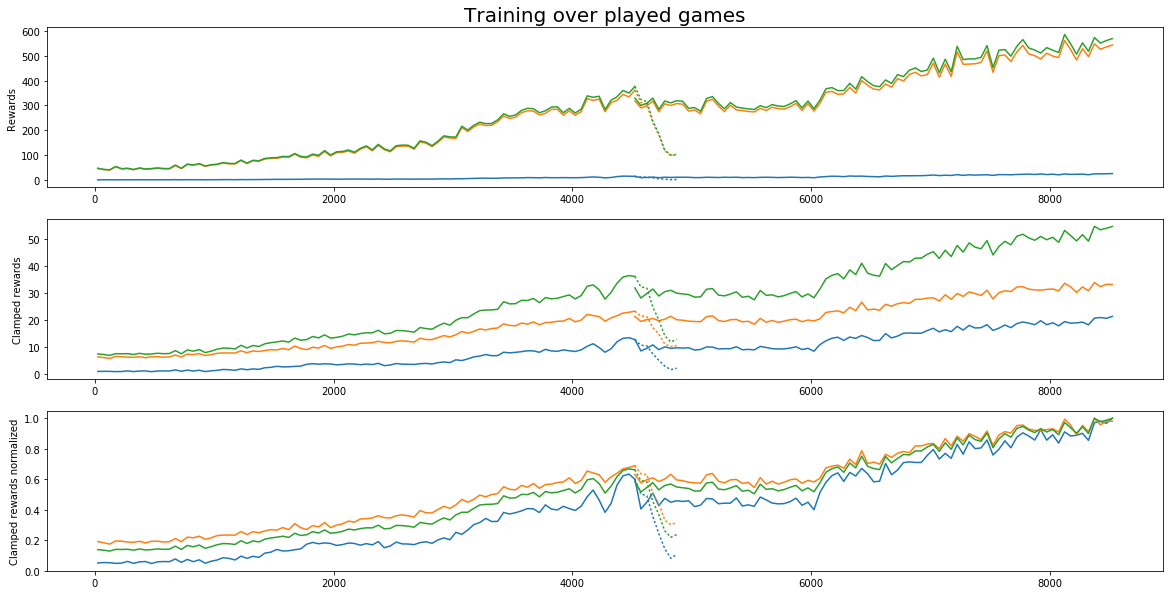

In [55]:
avg_period = 50
offset_training1 = 4500
offset_training1_idx = int(offset_training1/avg_period)
f, axarr = plt.subplots(3, 1)

#################
# Rewards unclamped
t0_episode, t0_avg_game1 = calculate_avg(t0_reward_history_game1, avg_length=avg_period)
t0_episode, t0_avg_game2 = calculate_avg(t0_reward_history_game2, avg_length=avg_period)
t0_episode, t0_avg_total = calculate_avg(t0_reward_history, avg_length=avg_period)

t1_episode, t1_avg_game1 = calculate_avg(t1_reward_history_game1, avg_length=avg_period)
t1_avg_game1[0] = t0_avg_game1[offset_training1_idx]
t1_episode, t1_avg_game2 = calculate_avg(t1_reward_history_game2, avg_length=avg_period)
t1_episode, t1_avg_total = calculate_avg(t1_reward_history, avg_length=avg_period)
t1_episode = [offset_training1+e for e in t1_episode]

axarr[0].set_title('Training over played games', fontsize=20)
axarr[0].set_ylabel('Rewards', fontsize=10)

axarr[0].plot(t0_episode[:offset_training1_idx+1], t0_avg_game1[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#1f77b4')
axarr[0].plot(t0_episode[offset_training1_idx:], t0_avg_game1[offset_training1_idx:],
              label='game 1', linestyle=':', color='#1f77b4')
axarr[0].plot(t1_episode, t1_avg_game1, label='game 1', linestyle='-', color='#1f77b4')

axarr[0].plot(t0_episode[:offset_training1_idx+1], t0_avg_game2[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#ff7f0e')
axarr[0].plot(t0_episode[offset_training1_idx:], t0_avg_game2[offset_training1_idx:],
              label='game 1', linestyle=':', color='#ff7f0e')
axarr[0].plot(t1_episode, t1_avg_game2, label='game 1', linestyle='-', color='#ff7f0e')

axarr[0].plot(t0_episode[:offset_training1_idx+1], t0_avg_total[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#2ca02c')
axarr[0].plot(t0_episode[offset_training1_idx:], t0_avg_total[offset_training1_idx:],
              label='game 1', linestyle=':', color='#2ca02c')
axarr[0].plot(t1_episode, t1_avg_total, label='game 1', linestyle='-', color='#2ca02c')


#################
# Rewards clamped
t0_episode, t0_avg_game1 = calculate_avg(t0_reward_clamped_history_game1, avg_length=avg_period)
t0_episode, t0_avg_game2 = calculate_avg(t0_reward_clamped_history_game2, avg_length=avg_period)
t0_episode, t0_avg_total = calculate_avg(t0_reward_clamped_history, avg_length=avg_period)

t1_episode, t1_avg_game1 = calculate_avg(t1_reward_clamped_history_game1, avg_length=avg_period)
t1_avg_game1[0] = t0_avg_game1[offset_training1_idx]
t1_episode, t1_avg_game2 = calculate_avg(t1_reward_clamped_history_game2, avg_length=avg_period)
t1_episode, t1_avg_total = calculate_avg(t1_reward_clamped_history, avg_length=avg_period)
t1_episode = [offset_training1+e for e in t1_episode]

axarr[1].set_ylabel('Clamped rewards', fontsize=10)

axarr[1].plot(t0_episode[:offset_training1_idx+1], t0_avg_game1[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#1f77b4')
axarr[1].plot(t0_episode[offset_training1_idx:], t0_avg_game1[offset_training1_idx:],
              label='game 1', linestyle=':', color='#1f77b4')
axarr[1].plot(t1_episode, t1_avg_game1, label='game 1', linestyle='-', color='#1f77b4')

axarr[1].plot(t0_episode[:offset_training1_idx+1], t0_avg_game2[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#ff7f0e')
axarr[1].plot(t0_episode[offset_training1_idx:], t0_avg_game2[offset_training1_idx:],
              label='game 1', linestyle=':', color='#ff7f0e')
axarr[1].plot(t1_episode, t1_avg_game2, label='game 1', linestyle='-', color='#ff7f0e')

axarr[1].plot(t0_episode[:offset_training1_idx+1], t0_avg_total[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#2ca02c')
axarr[1].plot(t0_episode[offset_training1_idx:], t0_avg_total[offset_training1_idx:],
              label='game 1', linestyle=':', color='#2ca02c')
axarr[1].plot(t1_episode, t1_avg_total, label='game 1', linestyle='-', color='#2ca02c')


#################
# Rewards normalized
max_game1 = max(t0_avg_game1 + t1_avg_game1)
max_game2 = max(t0_avg_game2 + t1_avg_game2)
max_total = max(t0_avg_total + t1_avg_total)

# Normalize
t0_avg_game1 = t0_avg_game1/max_game1
t1_avg_game1 = t1_avg_game1/max_game1

t0_avg_game2 = t0_avg_game2/max_game2
t1_avg_game2 = t1_avg_game2/max_game2

t0_avg_total = t0_avg_total/max_total
t1_avg_total = t1_avg_total/max_total

axarr[2].set_ylabel('Clamped rewards normalized', fontsize=10)

axarr[2].plot(t0_episode[:offset_training1_idx+1], t0_avg_game1[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#1f77b4')
axarr[2].plot(t0_episode[offset_training1_idx:], t0_avg_game1[offset_training1_idx:],
              label='game 1', linestyle=':', color='#1f77b4')
axarr[2].plot(t1_episode, t1_avg_game1, label='game 1', linestyle='-', color='#1f77b4')

axarr[2].plot(t0_episode[:offset_training1_idx+1], t0_avg_game2[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#ff7f0e')
axarr[2].plot(t0_episode[offset_training1_idx:], t0_avg_game2[offset_training1_idx:],
              label='game 1', linestyle=':', color='#ff7f0e')
axarr[2].plot(t1_episode, t1_avg_game2, label='game 1', linestyle='-', color='#ff7f0e')

axarr[2].plot(t0_episode[:offset_training1_idx+1], t0_avg_total[:offset_training1_idx+1],
              label='game 1', linestyle='-', color='#2ca02c')
axarr[2].plot(t0_episode[offset_training1_idx:], t0_avg_total[offset_training1_idx:],
              label='game 1', linestyle=':', color='#2ca02c')
axarr[2].plot(t1_episode, t1_avg_total, label='game 1', linestyle='-', color='#2ca02c')

plt.show()